## This notebook aims to visualize and test the EONIA distribution produced by GAN

In [1]:
import os
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist
import scipy.stats as stats

from dotenv.main import load_dotenv
load_dotenv(override=True)

import os

## Note to self -- We only test EONIA

In [2]:
def fetch_data_df():
    # Load the data
    df = pd.read_csv('../data/final_daily_returns_asset_classes.csv', index_col=0, parse_dates=True)
    df.index = pd.to_datetime(df.index)
    start_test_date = os.getenv("START_TEST_DATE")
    
    if start_test_date is None:
        raise ValueError("Environment variable 'START_TEST_DATE' is not set.")

    start_test_date = pd.to_datetime(start_test_date)
    
    # Select only the third, sixth, and seventh columns

    # 2, 5, 6
    selected_columns = df.iloc[:, [6]]  # Remember: Python uses 0-based indexing

    pre_test_df = selected_columns[selected_columns.index < start_test_date]
    test_df = selected_columns[selected_columns.index >= start_test_date].iloc[:252]
    
    return pre_test_df, test_df

returns_df, test_returns_df = fetch_data_df()

In [3]:
asset_names = returns_df.columns

## Define a Measure of Success

What constetutes a good generated distribution for EONIA.

This is due to the fact that on Mondays you factor in the weekend.

<Axes: title={'center': 'EONIA Returns for 2006-05'}, xlabel='Date'>

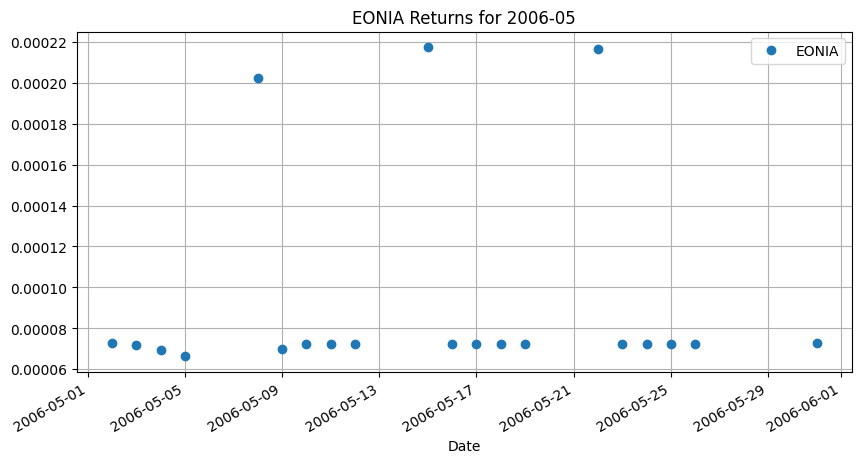

In [4]:
month = '2006-05'  # Change this to the desired year and month (YYYY-MM)
filtered_df = returns_df.loc[month]

# Plot
filtered_df.plot(y='EONIA', marker='o', linestyle='', figsize=(10, 5), grid=True, title=f"EONIA Returns for {month}")



<Axes: xlabel='Date'>

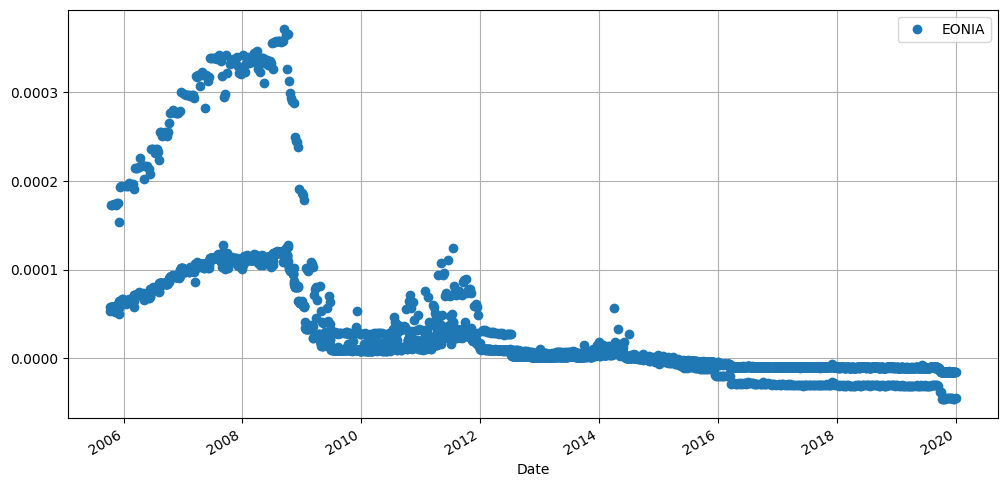

In [5]:
returns_df.plot(y='EONIA', marker='o', linestyle='', figsize=(12,6), grid=True)

In [6]:
from gan7 import GAN7

for asset_name in returns_df.columns:
    print(f"Training WGAN for {asset_name}...")
    asset_returns = returns_df[asset_name]
    
    # Create WGAN instance for the current asset
    gan = GAN7(asset_returns, asset_name)
    
    # Train WGAN for this asset
    gan.train()
    gan.generate_scenarios(num_scenarios=10000)
    
    print(f"Finished training WGAN for {asset_name}.\n")


Training WGAN for EONIA...


[Epoch 0/1000] [Batch 0/16] [D loss: 0.019967541098594666] [G loss: -0.15339672565460205]


[Epoch 0/1000] [Batch 10/16] [D loss: -0.053130000829696655] [G loss: -0.1372383087873459]
[Epoch 1/1000] [Batch 0/16] [D loss: -0.05531647801399231] [G loss: -0.17601856589317322]


[Epoch 1/1000] [Batch 10/16] [D loss: -0.14778637886047363] [G loss: -0.18828018009662628]
[Epoch 2/1000] [Batch 0/16] [D loss: -0.12968936562538147] [G loss: -0.18970522284507751]


[Epoch 2/1000] [Batch 10/16] [D loss: -0.17713549733161926] [G loss: -0.19994866847991943]
[Epoch 3/1000] [Batch 0/16] [D loss: -0.18787206709384918] [G loss: -0.23065035045146942]


[Epoch 3/1000] [Batch 10/16] [D loss: -0.26818418502807617] [G loss: -0.2506093680858612]
[Epoch 4/1000] [Batch 0/16] [D loss: -0.2773071527481079] [G loss: -0.2623341679573059]


[Epoch 4/1000] [Batch 10/16] [D loss: -0.3039684593677521] [G loss: -0.29175829887390137]
[Epoch 5/1000] [Batch 0/16] [D loss: -0.31249508261680603] [G loss: -0.3099052906036377]


[Epoch 5/1000] [Batch 10/16] [D loss: -0.374900221824646] [G loss: -0.3273409903049469]
[Epoch 6/1000] [Batch 0/16] [D loss: -0.45606595277786255] [G loss: -0.36422351002693176]


[Epoch 6/1000] [Batch 10/16] [D loss: -0.49053528904914856] [G loss: -0.39750969409942627]
[Epoch 7/1000] [Batch 0/16] [D loss: -0.4695432782173157] [G loss: -0.4289715588092804]


[Epoch 7/1000] [Batch 10/16] [D loss: -0.5696415901184082] [G loss: -0.4524153172969818]
[Epoch 8/1000] [Batch 0/16] [D loss: -0.5780870318412781] [G loss: -0.5043788552284241]


[Epoch 8/1000] [Batch 10/16] [D loss: -0.5089230537414551] [G loss: -0.4915911853313446]
[Epoch 9/1000] [Batch 0/16] [D loss: -0.5419962406158447] [G loss: -0.5614017248153687]


[Epoch 9/1000] [Batch 10/16] [D loss: -0.7093634009361267] [G loss: -0.5287358164787292]
[Epoch 10/1000] [Batch 0/16] [D loss: -0.6898711919784546] [G loss: -0.6015891432762146]


[Epoch 10/1000] [Batch 10/16] [D loss: -0.763557493686676] [G loss: -0.6444450616836548]
[Epoch 11/1000] [Batch 0/16] [D loss: -0.678524911403656] [G loss: -0.6481977105140686]


[Epoch 11/1000] [Batch 10/16] [D loss: -0.7177886366844177] [G loss: -0.7377957105636597]


[Epoch 12/1000] [Batch 0/16] [D loss: -0.7320145964622498] [G loss: -0.7203972339630127]


[Epoch 12/1000] [Batch 10/16] [D loss: -0.7488889694213867] [G loss: -0.7657576203346252]
[Epoch 13/1000] [Batch 0/16] [D loss: -0.8609808683395386] [G loss: -0.7475093007087708]


[Epoch 13/1000] [Batch 10/16] [D loss: -0.834044873714447] [G loss: -0.8436161875724792]
[Epoch 14/1000] [Batch 0/16] [D loss: -0.9510990381240845] [G loss: -0.8705046772956848]


[Epoch 14/1000] [Batch 10/16] [D loss: -0.8789629936218262] [G loss: -0.8719679117202759]
[Epoch 15/1000] [Batch 0/16] [D loss: -1.0391862392425537] [G loss: -0.8697215914726257]


[Epoch 15/1000] [Batch 10/16] [D loss: -0.8509881496429443] [G loss: -0.9480918049812317]
[Epoch 16/1000] [Batch 0/16] [D loss: -0.8623083829879761] [G loss: -0.934431791305542]


[Epoch 16/1000] [Batch 10/16] [D loss: -1.0808486938476562] [G loss: -0.9775044918060303]
[Epoch 17/1000] [Batch 0/16] [D loss: -1.0369811058044434] [G loss: -1.044058084487915]


[Epoch 17/1000] [Batch 10/16] [D loss: -0.9137835502624512] [G loss: -1.0011059045791626]
[Epoch 18/1000] [Batch 0/16] [D loss: -1.2940372228622437] [G loss: -1.058022141456604]


[Epoch 18/1000] [Batch 10/16] [D loss: -1.174295425415039] [G loss: -1.0575098991394043]
[Epoch 19/1000] [Batch 0/16] [D loss: -1.250817894935608] [G loss: -1.068966269493103]


[Epoch 19/1000] [Batch 10/16] [D loss: -1.3024691343307495] [G loss: -1.0526353120803833]


[Epoch 20/1000] [Batch 0/16] [D loss: -1.229203462600708] [G loss: -1.106513261795044]


[Epoch 20/1000] [Batch 10/16] [D loss: -1.3804188966751099] [G loss: -1.1162848472595215]
[Epoch 21/1000] [Batch 0/16] [D loss: -1.2537895441055298] [G loss: -1.1538130044937134]


[Epoch 21/1000] [Batch 10/16] [D loss: -1.3950458765029907] [G loss: -1.1111819744110107]


[Epoch 22/1000] [Batch 0/16] [D loss: -1.3420263528823853] [G loss: -1.1226661205291748]


[Epoch 22/1000] [Batch 10/16] [D loss: -1.4563932418823242] [G loss: -1.2203774452209473]


[Epoch 23/1000] [Batch 0/16] [D loss: -1.4710220098495483] [G loss: -1.224716305732727]


[Epoch 23/1000] [Batch 10/16] [D loss: -1.5946571826934814] [G loss: -1.2300410270690918]
[Epoch 24/1000] [Batch 0/16] [D loss: -1.4988807439804077] [G loss: -1.2819573879241943]


[Epoch 24/1000] [Batch 10/16] [D loss: -1.6009941101074219] [G loss: -1.1813403367996216]
[Epoch 25/1000] [Batch 0/16] [D loss: -1.5288830995559692] [G loss: -1.187248706817627]


[Epoch 25/1000] [Batch 10/16] [D loss: -1.7596744298934937] [G loss: -1.2652522325515747]


[Epoch 26/1000] [Batch 0/16] [D loss: -1.7656643390655518] [G loss: -1.2317514419555664]


[Epoch 26/1000] [Batch 10/16] [D loss: -1.7195708751678467] [G loss: -1.2448991537094116]


[Epoch 27/1000] [Batch 0/16] [D loss: -1.8284631967544556] [G loss: -1.206039547920227]


[Epoch 27/1000] [Batch 10/16] [D loss: -1.8716875314712524] [G loss: -1.2321275472640991]


[Epoch 28/1000] [Batch 0/16] [D loss: -1.9539471864700317] [G loss: -1.2420642375946045]


[Epoch 28/1000] [Batch 10/16] [D loss: -2.03678560256958] [G loss: -1.2528891563415527]
[Epoch 29/1000] [Batch 0/16] [D loss: -2.009793519973755] [G loss: -1.199069857597351]


[Epoch 29/1000] [Batch 10/16] [D loss: -2.1626081466674805] [G loss: -1.1755136251449585]
[Epoch 30/1000] [Batch 0/16] [D loss: -2.19398832321167] [G loss: -1.180511474609375]


[Epoch 30/1000] [Batch 10/16] [D loss: -2.203070640563965] [G loss: -1.1812385320663452]


[Epoch 31/1000] [Batch 0/16] [D loss: -2.227717638015747] [G loss: -1.171673059463501]


[Epoch 31/1000] [Batch 10/16] [D loss: -2.1621105670928955] [G loss: -1.2514642477035522]
[Epoch 32/1000] [Batch 0/16] [D loss: -2.3853464126586914] [G loss: -1.2037456035614014]


[Epoch 32/1000] [Batch 10/16] [D loss: -2.361039638519287] [G loss: -1.1801962852478027]
[Epoch 33/1000] [Batch 0/16] [D loss: -2.506035804748535] [G loss: -1.2271984815597534]


[Epoch 33/1000] [Batch 10/16] [D loss: -2.5885977745056152] [G loss: -1.1576117277145386]


[Epoch 34/1000] [Batch 0/16] [D loss: -2.554123878479004] [G loss: -1.1392427682876587]


[Epoch 34/1000] [Batch 10/16] [D loss: -2.5552854537963867] [G loss: -1.1642571687698364]


[Epoch 35/1000] [Batch 0/16] [D loss: -2.8016695976257324] [G loss: -1.1561064720153809]


[Epoch 35/1000] [Batch 10/16] [D loss: -2.6329193115234375] [G loss: -1.1030443906784058]
[Epoch 36/1000] [Batch 0/16] [D loss: -2.819262742996216] [G loss: -1.1072262525558472]


[Epoch 36/1000] [Batch 10/16] [D loss: -2.7475037574768066] [G loss: -1.1090097427368164]
[Epoch 37/1000] [Batch 0/16] [D loss: -2.8928818702697754] [G loss: -1.0097440481185913]


[Epoch 37/1000] [Batch 10/16] [D loss: -2.7855358123779297] [G loss: -1.064483642578125]


[Epoch 38/1000] [Batch 0/16] [D loss: -3.112370729446411] [G loss: -1.0282492637634277]


[Epoch 38/1000] [Batch 10/16] [D loss: -2.9682068824768066] [G loss: -1.0913615226745605]


[Epoch 39/1000] [Batch 0/16] [D loss: -3.046990394592285] [G loss: -1.0337120294570923]


[Epoch 39/1000] [Batch 10/16] [D loss: -3.1545262336730957] [G loss: -0.9974706172943115]


[Epoch 40/1000] [Batch 0/16] [D loss: -3.181666135787964] [G loss: -0.989705502986908]


[Epoch 40/1000] [Batch 10/16] [D loss: -3.3351824283599854] [G loss: -1.0215412378311157]
[Epoch 41/1000] [Batch 0/16] [D loss: -3.166944980621338] [G loss: -0.8893208503723145]


[Epoch 41/1000] [Batch 10/16] [D loss: -3.54398512840271] [G loss: -0.882815420627594]
[Epoch 42/1000] [Batch 0/16] [D loss: -3.613447427749634] [G loss: -0.8924328088760376]


[Epoch 42/1000] [Batch 10/16] [D loss: -3.506197214126587] [G loss: -0.8463020324707031]


[Epoch 43/1000] [Batch 0/16] [D loss: -3.712689161300659] [G loss: -0.8721317052841187]


[Epoch 43/1000] [Batch 10/16] [D loss: -3.9286856651306152] [G loss: -0.8608960509300232]
[Epoch 44/1000] [Batch 0/16] [D loss: -3.943804979324341] [G loss: -0.8625105023384094]


[Epoch 44/1000] [Batch 10/16] [D loss: -3.910458564758301] [G loss: -0.8176969289779663]
[Epoch 45/1000] [Batch 0/16] [D loss: -4.005217552185059] [G loss: -0.8247486352920532]


[Epoch 45/1000] [Batch 10/16] [D loss: -3.8983209133148193] [G loss: -0.5814304351806641]
[Epoch 46/1000] [Batch 0/16] [D loss: -4.001070022583008] [G loss: -0.7246013879776001]


[Epoch 46/1000] [Batch 10/16] [D loss: -4.206745147705078] [G loss: -0.6593525409698486]
[Epoch 47/1000] [Batch 0/16] [D loss: -4.200754165649414] [G loss: -0.7490376234054565]


[Epoch 47/1000] [Batch 10/16] [D loss: -4.176558494567871] [G loss: -0.6416059136390686]
[Epoch 48/1000] [Batch 0/16] [D loss: -4.371278285980225] [G loss: -0.5933393836021423]


[Epoch 48/1000] [Batch 10/16] [D loss: -4.357385158538818] [G loss: -0.6224373579025269]


[Epoch 49/1000] [Batch 0/16] [D loss: -4.240908145904541] [G loss: -0.5585398077964783]


[Epoch 49/1000] [Batch 10/16] [D loss: -4.759939670562744] [G loss: -0.6337633728981018]
[Epoch 50/1000] [Batch 0/16] [D loss: -4.8061089515686035] [G loss: -0.6066815853118896]


[Epoch 50/1000] [Batch 10/16] [D loss: -4.480605125427246] [G loss: -0.6458526849746704]
[Epoch 51/1000] [Batch 0/16] [D loss: -4.9535017013549805] [G loss: -0.46040549874305725]


[Epoch 51/1000] [Batch 10/16] [D loss: -4.704721927642822] [G loss: -0.5314688682556152]
[Epoch 52/1000] [Batch 0/16] [D loss: -4.394661903381348] [G loss: -0.5361325740814209]


[Epoch 52/1000] [Batch 10/16] [D loss: -5.130659103393555] [G loss: -0.41084250807762146]


[Epoch 53/1000] [Batch 0/16] [D loss: -4.753450393676758] [G loss: -0.4306001663208008]


[Epoch 53/1000] [Batch 10/16] [D loss: -4.826737403869629] [G loss: -0.5160278677940369]
[Epoch 54/1000] [Batch 0/16] [D loss: -4.723331928253174] [G loss: -0.33599457144737244]


[Epoch 54/1000] [Batch 10/16] [D loss: -5.462104797363281] [G loss: -0.479701966047287]
[Epoch 55/1000] [Batch 0/16] [D loss: -5.189077854156494] [G loss: -0.31268930435180664]


[Epoch 55/1000] [Batch 10/16] [D loss: -5.15126895904541] [G loss: -0.3622848391532898]
[Epoch 56/1000] [Batch 0/16] [D loss: -5.507763862609863] [G loss: -0.24684372544288635]


[Epoch 56/1000] [Batch 10/16] [D loss: -5.467440128326416] [G loss: -0.40777456760406494]


[Epoch 57/1000] [Batch 0/16] [D loss: -5.206037998199463] [G loss: -0.2967683970928192]


[Epoch 57/1000] [Batch 10/16] [D loss: -5.439183235168457] [G loss: -0.3326222598552704]


[Epoch 58/1000] [Batch 0/16] [D loss: -5.3673319816589355] [G loss: -0.2507871985435486]


[Epoch 58/1000] [Batch 10/16] [D loss: -5.602755069732666] [G loss: -0.289559930562973]


[Epoch 59/1000] [Batch 0/16] [D loss: -5.859632968902588] [G loss: -0.08776096999645233]


[Epoch 59/1000] [Batch 10/16] [D loss: -5.742074966430664] [G loss: -0.24419327080249786]


[Epoch 60/1000] [Batch 0/16] [D loss: -5.6676812171936035] [G loss: -0.2237996608018875]


[Epoch 60/1000] [Batch 10/16] [D loss: -6.249175071716309] [G loss: -0.19843153655529022]


[Epoch 61/1000] [Batch 0/16] [D loss: -5.937466621398926] [G loss: -0.1846698522567749]


[Epoch 61/1000] [Batch 10/16] [D loss: -6.046316146850586] [G loss: -0.026095332577824593]


[Epoch 62/1000] [Batch 0/16] [D loss: -6.375729560852051] [G loss: -0.2769421637058258]


[Epoch 62/1000] [Batch 10/16] [D loss: -6.601446628570557] [G loss: -0.3018190860748291]


[Epoch 63/1000] [Batch 0/16] [D loss: -5.895635604858398] [G loss: -0.1563982367515564]


[Epoch 63/1000] [Batch 10/16] [D loss: -6.586652755737305] [G loss: -0.23167984187602997]
[Epoch 64/1000] [Batch 0/16] [D loss: -6.726603984832764] [G loss: -0.1456563025712967]


[Epoch 64/1000] [Batch 10/16] [D loss: -6.339776992797852] [G loss: -0.07975315302610397]


[Epoch 65/1000] [Batch 0/16] [D loss: -6.764573574066162] [G loss: -0.0370674729347229]


[Epoch 65/1000] [Batch 10/16] [D loss: -7.058014869689941] [G loss: -0.154751256108284]


[Epoch 66/1000] [Batch 0/16] [D loss: -6.088959217071533] [G loss: -0.301936537027359]


[Epoch 66/1000] [Batch 10/16] [D loss: -7.29844856262207] [G loss: -0.1414712816476822]


[Epoch 67/1000] [Batch 0/16] [D loss: -6.9298529624938965] [G loss: -0.24785588681697845]


[Epoch 67/1000] [Batch 10/16] [D loss: -6.7340407371521] [G loss: -0.006190802901983261]


[Epoch 68/1000] [Batch 0/16] [D loss: -6.869457244873047] [G loss: 0.12092012166976929]


[Epoch 68/1000] [Batch 10/16] [D loss: -7.5055999755859375] [G loss: -0.23633168637752533]
[Epoch 69/1000] [Batch 0/16] [D loss: -6.766193866729736] [G loss: 0.0573909766972065]


[Epoch 69/1000] [Batch 10/16] [D loss: -7.0327348709106445] [G loss: -0.01712997443974018]


[Epoch 70/1000] [Batch 0/16] [D loss: -7.071441173553467] [G loss: -0.41428717970848083]


[Epoch 70/1000] [Batch 10/16] [D loss: -6.858132839202881] [G loss: -0.46239280700683594]


[Epoch 71/1000] [Batch 0/16] [D loss: -6.935412406921387] [G loss: -0.2081660032272339]


[Epoch 71/1000] [Batch 10/16] [D loss: -6.79065465927124] [G loss: -0.3936305344104767]
[Epoch 72/1000] [Batch 0/16] [D loss: -7.108556270599365] [G loss: -0.1606369912624359]


[Epoch 72/1000] [Batch 10/16] [D loss: -7.7670745849609375] [G loss: -0.4257839322090149]
[Epoch 73/1000] [Batch 0/16] [D loss: -7.393311977386475] [G loss: -0.2564292252063751]


[Epoch 73/1000] [Batch 10/16] [D loss: -7.396383285522461] [G loss: -0.1652904450893402]
[Epoch 74/1000] [Batch 0/16] [D loss: -7.427331924438477] [G loss: 0.11623524874448776]


[Epoch 74/1000] [Batch 10/16] [D loss: -7.396174430847168] [G loss: -0.37616196274757385]


[Epoch 75/1000] [Batch 0/16] [D loss: -7.204235076904297] [G loss: -0.30586081743240356]


[Epoch 75/1000] [Batch 10/16] [D loss: -7.187158584594727] [G loss: -0.4380156993865967]


[Epoch 76/1000] [Batch 0/16] [D loss: -7.349552154541016] [G loss: -0.3913935720920563]


[Epoch 76/1000] [Batch 10/16] [D loss: -7.4907708168029785] [G loss: -0.5644466876983643]


[Epoch 77/1000] [Batch 0/16] [D loss: -7.938311576843262] [G loss: -0.18829040229320526]


[Epoch 77/1000] [Batch 10/16] [D loss: -7.677687644958496] [G loss: -0.6101295948028564]
[Epoch 78/1000] [Batch 0/16] [D loss: -7.663228988647461] [G loss: -0.43913909792900085]


[Epoch 78/1000] [Batch 10/16] [D loss: -8.357670783996582] [G loss: -0.4138573110103607]
[Epoch 79/1000] [Batch 0/16] [D loss: -8.120180130004883] [G loss: -0.4658113121986389]


[Epoch 79/1000] [Batch 10/16] [D loss: -7.738480091094971] [G loss: -0.6428890824317932]
[Epoch 80/1000] [Batch 0/16] [D loss: -8.222898483276367] [G loss: -0.30278992652893066]


[Epoch 80/1000] [Batch 10/16] [D loss: -7.145813941955566] [G loss: -0.5855932831764221]
[Epoch 81/1000] [Batch 0/16] [D loss: -8.38492488861084] [G loss: -0.5492253303527832]


[Epoch 81/1000] [Batch 10/16] [D loss: -8.492105484008789] [G loss: -0.7309422492980957]


[Epoch 82/1000] [Batch 0/16] [D loss: -7.814546585083008] [G loss: -0.9466457962989807]


[Epoch 82/1000] [Batch 10/16] [D loss: -8.832956314086914] [G loss: -0.7795898914337158]


[Epoch 83/1000] [Batch 0/16] [D loss: -7.969910621643066] [G loss: -0.993744969367981]


[Epoch 83/1000] [Batch 10/16] [D loss: -8.649271965026855] [G loss: -0.546420156955719]


[Epoch 84/1000] [Batch 0/16] [D loss: -8.35883617401123] [G loss: -0.6749287247657776]


[Epoch 84/1000] [Batch 10/16] [D loss: -8.842944145202637] [G loss: -0.5691587328910828]


[Epoch 85/1000] [Batch 0/16] [D loss: -8.515419960021973] [G loss: -0.49490994215011597]


[Epoch 85/1000] [Batch 10/16] [D loss: -8.4381103515625] [G loss: -0.7572487592697144]


[Epoch 86/1000] [Batch 0/16] [D loss: -8.908453941345215] [G loss: -1.019004464149475]


[Epoch 86/1000] [Batch 10/16] [D loss: -8.200815200805664] [G loss: -0.771279513835907]


[Epoch 87/1000] [Batch 0/16] [D loss: -8.957773208618164] [G loss: -0.48979654908180237]


[Epoch 87/1000] [Batch 10/16] [D loss: -8.049125671386719] [G loss: -0.9900291562080383]


[Epoch 88/1000] [Batch 0/16] [D loss: -8.774662971496582] [G loss: -0.5447751879692078]


[Epoch 88/1000] [Batch 10/16] [D loss: -9.081859588623047] [G loss: -0.8319382667541504]


[Epoch 89/1000] [Batch 0/16] [D loss: -8.366989135742188] [G loss: -0.8409489393234253]


[Epoch 89/1000] [Batch 10/16] [D loss: -9.375212669372559] [G loss: -0.9194024801254272]


[Epoch 90/1000] [Batch 0/16] [D loss: -7.959442138671875] [G loss: -0.9337640404701233]


[Epoch 90/1000] [Batch 10/16] [D loss: -9.708473205566406] [G loss: -0.9446402788162231]


[Epoch 91/1000] [Batch 0/16] [D loss: -8.84344482421875] [G loss: -1.194709300994873]


[Epoch 91/1000] [Batch 10/16] [D loss: -8.415163040161133] [G loss: -0.9122409224510193]
[Epoch 92/1000] [Batch 0/16] [D loss: -9.369158744812012] [G loss: -0.5357958078384399]


[Epoch 92/1000] [Batch 10/16] [D loss: -8.523347854614258] [G loss: -0.949480414390564]


[Epoch 93/1000] [Batch 0/16] [D loss: -9.017315864562988] [G loss: -1.0123602151870728]


[Epoch 93/1000] [Batch 10/16] [D loss: -9.22506332397461] [G loss: -0.7824996113777161]


[Epoch 94/1000] [Batch 0/16] [D loss: -8.862149238586426] [G loss: -1.2747223377227783]


[Epoch 94/1000] [Batch 10/16] [D loss: -9.016095161437988] [G loss: -1.3555908203125]
[Epoch 95/1000] [Batch 0/16] [D loss: -9.158802032470703] [G loss: -1.1889814138412476]


[Epoch 95/1000] [Batch 10/16] [D loss: -9.956823348999023] [G loss: -1.4501780271530151]
[Epoch 96/1000] [Batch 0/16] [D loss: -10.14373779296875] [G loss: -0.8552036285400391]


[Epoch 96/1000] [Batch 10/16] [D loss: -9.49239444732666] [G loss: -1.085544466972351]
[Epoch 97/1000] [Batch 0/16] [D loss: -9.760695457458496] [G loss: -0.7435569763183594]


[Epoch 97/1000] [Batch 10/16] [D loss: -9.635883331298828] [G loss: -1.308547854423523]


[Epoch 98/1000] [Batch 0/16] [D loss: -8.740362167358398] [G loss: -1.0968480110168457]


[Epoch 98/1000] [Batch 10/16] [D loss: -9.869860649108887] [G loss: -0.8297336101531982]
[Epoch 99/1000] [Batch 0/16] [D loss: -8.895268440246582] [G loss: -0.7659584283828735]


[Epoch 99/1000] [Batch 10/16] [D loss: -9.241096496582031] [G loss: -1.0414077043533325]
[Epoch 100/1000] [Batch 0/16] [D loss: -9.767623901367188] [G loss: -0.9241754412651062]


[Epoch 100/1000] [Batch 10/16] [D loss: -9.232991218566895] [G loss: -1.21470308303833]
[Epoch 101/1000] [Batch 0/16] [D loss: -10.085341453552246] [G loss: -0.3407669961452484]


[Epoch 101/1000] [Batch 10/16] [D loss: -9.596476554870605] [G loss: -1.310123324394226]


[Epoch 102/1000] [Batch 0/16] [D loss: -10.167057037353516] [G loss: -1.0260080099105835]


[Epoch 102/1000] [Batch 10/16] [D loss: -10.795140266418457] [G loss: -1.376816987991333]


[Epoch 103/1000] [Batch 0/16] [D loss: -10.2284574508667] [G loss: -1.041083574295044]


[Epoch 103/1000] [Batch 10/16] [D loss: -10.165544509887695] [G loss: -1.1104059219360352]
[Epoch 104/1000] [Batch 0/16] [D loss: -10.028158187866211] [G loss: -1.169484257698059]


[Epoch 104/1000] [Batch 10/16] [D loss: -9.976165771484375] [G loss: -0.7929725050926208]
[Epoch 105/1000] [Batch 0/16] [D loss: -9.978742599487305] [G loss: -1.115605115890503]


[Epoch 105/1000] [Batch 10/16] [D loss: -9.907605171203613] [G loss: -1.4206337928771973]
[Epoch 106/1000] [Batch 0/16] [D loss: -10.016144752502441] [G loss: -1.3817514181137085]


[Epoch 106/1000] [Batch 10/16] [D loss: -10.479085922241211] [G loss: -1.265131950378418]


[Epoch 107/1000] [Batch 0/16] [D loss: -9.651641845703125] [G loss: -1.2040804624557495]


[Epoch 107/1000] [Batch 10/16] [D loss: -9.644107818603516] [G loss: -0.843442976474762]
[Epoch 108/1000] [Batch 0/16] [D loss: -10.661979675292969] [G loss: -1.2912341356277466]


[Epoch 108/1000] [Batch 10/16] [D loss: -10.146839141845703] [G loss: -1.2281193733215332]
[Epoch 109/1000] [Batch 0/16] [D loss: -9.680752754211426] [G loss: -1.3659205436706543]


[Epoch 109/1000] [Batch 10/16] [D loss: -10.630449295043945] [G loss: -0.5291247963905334]
[Epoch 110/1000] [Batch 0/16] [D loss: -10.466136932373047] [G loss: -1.2992151975631714]


[Epoch 110/1000] [Batch 10/16] [D loss: -10.545309066772461] [G loss: -1.455878496170044]


[Epoch 111/1000] [Batch 0/16] [D loss: -11.056267738342285] [G loss: -1.0205376148223877]


[Epoch 111/1000] [Batch 10/16] [D loss: -10.583993911743164] [G loss: -0.7025718688964844]
[Epoch 112/1000] [Batch 0/16] [D loss: -10.923874855041504] [G loss: -1.0659054517745972]


[Epoch 112/1000] [Batch 10/16] [D loss: -11.18656063079834] [G loss: -0.8199061751365662]
[Epoch 113/1000] [Batch 0/16] [D loss: -10.398787498474121] [G loss: -1.2413239479064941]


[Epoch 113/1000] [Batch 10/16] [D loss: -11.785674095153809] [G loss: -0.7098383903503418]


[Epoch 114/1000] [Batch 0/16] [D loss: -11.504752159118652] [G loss: -1.2207082509994507]


[Epoch 114/1000] [Batch 10/16] [D loss: -11.456239700317383] [G loss: -0.6143277883529663]
[Epoch 115/1000] [Batch 0/16] [D loss: -11.073600769042969] [G loss: -0.6958308219909668]


[Epoch 115/1000] [Batch 10/16] [D loss: -12.024209976196289] [G loss: -0.6487507820129395]
[Epoch 116/1000] [Batch 0/16] [D loss: -11.68774700164795] [G loss: -0.875641942024231]


[Epoch 116/1000] [Batch 10/16] [D loss: -11.679327011108398] [G loss: -0.506243109703064]
[Epoch 117/1000] [Batch 0/16] [D loss: -11.899144172668457] [G loss: -0.3192225396633148]


[Epoch 117/1000] [Batch 10/16] [D loss: -11.270691871643066] [G loss: -0.7091432213783264]
[Epoch 118/1000] [Batch 0/16] [D loss: -11.843130111694336] [G loss: -0.8526216149330139]


[Epoch 118/1000] [Batch 10/16] [D loss: -12.084933280944824] [G loss: -0.9523268938064575]


[Epoch 119/1000] [Batch 0/16] [D loss: -12.22507095336914] [G loss: -0.7389730215072632]


[Epoch 119/1000] [Batch 10/16] [D loss: -11.88231372833252] [G loss: -0.3924580514431]
[Epoch 120/1000] [Batch 0/16] [D loss: -11.64352035522461] [G loss: -0.7675769329071045]


[Epoch 120/1000] [Batch 10/16] [D loss: -12.73370361328125] [G loss: -0.5835675597190857]


[Epoch 121/1000] [Batch 0/16] [D loss: -12.503935813903809] [G loss: -0.7032482624053955]


[Epoch 121/1000] [Batch 10/16] [D loss: -12.602933883666992] [G loss: -0.6531398892402649]


[Epoch 122/1000] [Batch 0/16] [D loss: -11.787725448608398] [G loss: -0.25341901183128357]


[Epoch 122/1000] [Batch 10/16] [D loss: -11.693358421325684] [G loss: -0.6749064922332764]


[Epoch 123/1000] [Batch 0/16] [D loss: -12.317485809326172] [G loss: -0.6013534069061279]


[Epoch 123/1000] [Batch 10/16] [D loss: -12.03612995147705] [G loss: -0.8989021182060242]
[Epoch 124/1000] [Batch 0/16] [D loss: -12.48449420928955] [G loss: -0.7846899628639221]


[Epoch 124/1000] [Batch 10/16] [D loss: -12.720505714416504] [G loss: -0.31667229533195496]
[Epoch 125/1000] [Batch 0/16] [D loss: -12.783998489379883] [G loss: -0.6300188899040222]


[Epoch 125/1000] [Batch 10/16] [D loss: -11.914767265319824] [G loss: -0.8753327131271362]


[Epoch 126/1000] [Batch 0/16] [D loss: -13.060352325439453] [G loss: -0.2196188122034073]


[Epoch 126/1000] [Batch 10/16] [D loss: -12.33327865600586] [G loss: -0.7271053791046143]


[Epoch 127/1000] [Batch 0/16] [D loss: -12.13090705871582] [G loss: -1.0965405702590942]


[Epoch 127/1000] [Batch 10/16] [D loss: -12.3577241897583] [G loss: -1.0479705333709717]


[Epoch 128/1000] [Batch 0/16] [D loss: -12.008938789367676] [G loss: -0.8237699866294861]


[Epoch 128/1000] [Batch 10/16] [D loss: -12.824944496154785] [G loss: -0.742209255695343]


[Epoch 129/1000] [Batch 0/16] [D loss: -13.527859687805176] [G loss: -0.6743983626365662]


[Epoch 129/1000] [Batch 10/16] [D loss: -13.047447204589844] [G loss: -0.5322101712226868]
[Epoch 130/1000] [Batch 0/16] [D loss: -13.331818580627441] [G loss: -1.0251743793487549]


[Epoch 130/1000] [Batch 10/16] [D loss: -13.27100944519043] [G loss: -0.7158491015434265]


[Epoch 131/1000] [Batch 0/16] [D loss: -12.663208961486816] [G loss: -0.7450399994850159]


[Epoch 131/1000] [Batch 10/16] [D loss: -13.671113014221191] [G loss: -0.8617280721664429]


[Epoch 132/1000] [Batch 0/16] [D loss: -13.882219314575195] [G loss: -0.3728382885456085]


[Epoch 132/1000] [Batch 10/16] [D loss: -13.143071174621582] [G loss: 0.10348749160766602]


[Epoch 133/1000] [Batch 0/16] [D loss: -13.776084899902344] [G loss: -0.2931046783924103]


[Epoch 133/1000] [Batch 10/16] [D loss: -13.752229690551758] [G loss: -0.5503618121147156]


[Epoch 134/1000] [Batch 0/16] [D loss: -14.180343627929688] [G loss: -0.19170306622982025]


[Epoch 134/1000] [Batch 10/16] [D loss: -12.867778778076172] [G loss: -0.45535603165626526]
[Epoch 135/1000] [Batch 0/16] [D loss: -13.561518669128418] [G loss: -0.19196315109729767]


[Epoch 135/1000] [Batch 10/16] [D loss: -14.587418556213379] [G loss: -0.13475646078586578]
[Epoch 136/1000] [Batch 0/16] [D loss: -14.545149803161621] [G loss: 0.22249357402324677]


[Epoch 136/1000] [Batch 10/16] [D loss: -14.6015043258667] [G loss: 0.36209797859191895]
[Epoch 137/1000] [Batch 0/16] [D loss: -13.4149808883667] [G loss: 0.39751091599464417]


[Epoch 137/1000] [Batch 10/16] [D loss: -14.147055625915527] [G loss: -0.08128252625465393]


[Epoch 138/1000] [Batch 0/16] [D loss: -14.237410545349121] [G loss: -0.23942551016807556]


[Epoch 138/1000] [Batch 10/16] [D loss: -14.761601448059082] [G loss: 0.08018581569194794]
[Epoch 139/1000] [Batch 0/16] [D loss: -14.023319244384766] [G loss: -0.11492490768432617]


[Epoch 139/1000] [Batch 10/16] [D loss: -15.421497344970703] [G loss: -0.11927792429924011]


[Epoch 140/1000] [Batch 0/16] [D loss: -15.125542640686035] [G loss: 0.37015342712402344]


[Epoch 140/1000] [Batch 10/16] [D loss: -15.105998039245605] [G loss: 0.5391288995742798]
[Epoch 141/1000] [Batch 0/16] [D loss: -15.278629302978516] [G loss: 0.37433096766471863]


[Epoch 141/1000] [Batch 10/16] [D loss: -15.11166000366211] [G loss: -0.016927948221564293]


[Epoch 142/1000] [Batch 0/16] [D loss: -14.780417442321777] [G loss: 0.7067475914955139]


[Epoch 142/1000] [Batch 10/16] [D loss: -15.399474143981934] [G loss: 0.6153386235237122]
[Epoch 143/1000] [Batch 0/16] [D loss: -15.72011947631836] [G loss: 0.6325782537460327]


[Epoch 143/1000] [Batch 10/16] [D loss: -15.077571868896484] [G loss: 1.0557011365890503]


[Epoch 144/1000] [Batch 0/16] [D loss: -16.410322189331055] [G loss: 0.2755807042121887]


[Epoch 144/1000] [Batch 10/16] [D loss: -15.017760276794434] [G loss: 0.4370023310184479]
[Epoch 145/1000] [Batch 0/16] [D loss: -15.050378799438477] [G loss: 0.16685248911380768]


[Epoch 145/1000] [Batch 10/16] [D loss: -15.717723846435547] [G loss: 0.6863252520561218]


[Epoch 146/1000] [Batch 0/16] [D loss: -15.604472160339355] [G loss: 0.5719175934791565]


[Epoch 146/1000] [Batch 10/16] [D loss: -15.519214630126953] [G loss: 0.6599421501159668]


[Epoch 147/1000] [Batch 0/16] [D loss: -15.34324836730957] [G loss: 0.5317118763923645]


[Epoch 147/1000] [Batch 10/16] [D loss: -17.013017654418945] [G loss: 0.7391054034233093]


[Epoch 148/1000] [Batch 0/16] [D loss: -15.77453899383545] [G loss: 0.3805828392505646]


[Epoch 148/1000] [Batch 10/16] [D loss: -17.387575149536133] [G loss: 0.18113161623477936]


[Epoch 149/1000] [Batch 0/16] [D loss: -17.183164596557617] [G loss: 0.8499491214752197]


[Epoch 149/1000] [Batch 10/16] [D loss: -17.215885162353516] [G loss: 0.11902720481157303]


[Epoch 150/1000] [Batch 0/16] [D loss: -15.217787742614746] [G loss: -0.3743341565132141]


[Epoch 150/1000] [Batch 10/16] [D loss: -15.668386459350586] [G loss: 0.20468348264694214]


[Epoch 151/1000] [Batch 0/16] [D loss: -15.912925720214844] [G loss: 0.2279655784368515]


[Epoch 151/1000] [Batch 10/16] [D loss: -17.022306442260742] [G loss: -0.12073308229446411]


[Epoch 152/1000] [Batch 0/16] [D loss: -17.20470428466797] [G loss: 0.5376597046852112]


[Epoch 152/1000] [Batch 10/16] [D loss: -17.369218826293945] [G loss: -0.25784480571746826]


[Epoch 153/1000] [Batch 0/16] [D loss: -16.611143112182617] [G loss: 0.521755039691925]


[Epoch 153/1000] [Batch 10/16] [D loss: -18.196699142456055] [G loss: 0.3842433989048004]


[Epoch 154/1000] [Batch 0/16] [D loss: -17.869403839111328] [G loss: 0.2664683163166046]


[Epoch 154/1000] [Batch 10/16] [D loss: -16.482707977294922] [G loss: 0.515919029712677]


[Epoch 155/1000] [Batch 0/16] [D loss: -17.588159561157227] [G loss: -0.11347456276416779]


[Epoch 155/1000] [Batch 10/16] [D loss: -17.725875854492188] [G loss: 0.3680758774280548]
[Epoch 156/1000] [Batch 0/16] [D loss: -16.99729347229004] [G loss: 0.880776047706604]


[Epoch 156/1000] [Batch 10/16] [D loss: -17.831809997558594] [G loss: 0.6830141544342041]


[Epoch 157/1000] [Batch 0/16] [D loss: -17.87177276611328] [G loss: 0.8832142353057861]


[Epoch 157/1000] [Batch 10/16] [D loss: -18.985750198364258] [G loss: 0.9034426212310791]


[Epoch 158/1000] [Batch 0/16] [D loss: -18.1301326751709] [G loss: 1.099555492401123]


[Epoch 158/1000] [Batch 10/16] [D loss: -17.57868194580078] [G loss: 0.9396049976348877]
[Epoch 159/1000] [Batch 0/16] [D loss: -18.415435791015625] [G loss: 1.2132424116134644]


[Epoch 159/1000] [Batch 10/16] [D loss: -19.384780883789062] [G loss: 1.747247576713562]


[Epoch 160/1000] [Batch 0/16] [D loss: -17.98918914794922] [G loss: 1.3891839981079102]


[Epoch 160/1000] [Batch 10/16] [D loss: -19.469118118286133] [G loss: 1.5686569213867188]
[Epoch 161/1000] [Batch 0/16] [D loss: -19.568513870239258] [G loss: 1.3977041244506836]


[Epoch 161/1000] [Batch 10/16] [D loss: -18.270498275756836] [G loss: 1.3679276704788208]
[Epoch 162/1000] [Batch 0/16] [D loss: -18.772626876831055] [G loss: 1.4722812175750732]


[Epoch 162/1000] [Batch 10/16] [D loss: -19.016672134399414] [G loss: 1.1952000856399536]
[Epoch 163/1000] [Batch 0/16] [D loss: -20.204532623291016] [G loss: 1.7034993171691895]


[Epoch 163/1000] [Batch 10/16] [D loss: -19.12303924560547] [G loss: 0.8279885649681091]


[Epoch 164/1000] [Batch 0/16] [D loss: -20.09744644165039] [G loss: 1.1875617504119873]


[Epoch 164/1000] [Batch 10/16] [D loss: -19.06900405883789] [G loss: 1.4089370965957642]
[Epoch 165/1000] [Batch 0/16] [D loss: -19.732528686523438] [G loss: 1.0933866500854492]


[Epoch 165/1000] [Batch 10/16] [D loss: -20.64409637451172] [G loss: 1.3332948684692383]
[Epoch 166/1000] [Batch 0/16] [D loss: -19.210887908935547] [G loss: 0.9816722273826599]


[Epoch 166/1000] [Batch 10/16] [D loss: -19.922767639160156] [G loss: 1.0775095224380493]
[Epoch 167/1000] [Batch 0/16] [D loss: -18.725955963134766] [G loss: 0.7060917615890503]


[Epoch 167/1000] [Batch 10/16] [D loss: -19.08562660217285] [G loss: 0.9847256541252136]
[Epoch 168/1000] [Batch 0/16] [D loss: -20.02513313293457] [G loss: 1.398645043373108]


[Epoch 168/1000] [Batch 10/16] [D loss: -19.62540054321289] [G loss: 0.6727480292320251]
[Epoch 169/1000] [Batch 0/16] [D loss: -20.438867568969727] [G loss: 1.3138922452926636]


[Epoch 169/1000] [Batch 10/16] [D loss: -19.94078254699707] [G loss: 0.7908778190612793]


[Epoch 170/1000] [Batch 0/16] [D loss: -21.161745071411133] [G loss: 1.6423821449279785]


[Epoch 170/1000] [Batch 10/16] [D loss: -19.435029983520508] [G loss: 0.7664558291435242]
[Epoch 171/1000] [Batch 0/16] [D loss: -20.154870986938477] [G loss: 0.7770043015480042]


[Epoch 171/1000] [Batch 10/16] [D loss: -19.031782150268555] [G loss: 1.22418212890625]
[Epoch 172/1000] [Batch 0/16] [D loss: -19.51865577697754] [G loss: 0.9950630068778992]


[Epoch 172/1000] [Batch 10/16] [D loss: -20.415996551513672] [G loss: 1.201217770576477]


[Epoch 173/1000] [Batch 0/16] [D loss: -19.568498611450195] [G loss: 0.6195183992385864]


[Epoch 173/1000] [Batch 10/16] [D loss: -20.82256507873535] [G loss: 1.4362536668777466]


[Epoch 174/1000] [Batch 0/16] [D loss: -21.55506706237793] [G loss: 1.069383978843689]


[Epoch 174/1000] [Batch 10/16] [D loss: -21.627967834472656] [G loss: 1.059359073638916]
[Epoch 175/1000] [Batch 0/16] [D loss: -21.17683219909668] [G loss: 1.3606648445129395]


[Epoch 175/1000] [Batch 10/16] [D loss: -21.89440155029297] [G loss: 1.428127408027649]
[Epoch 176/1000] [Batch 0/16] [D loss: -21.81575584411621] [G loss: 1.9637302160263062]


[Epoch 176/1000] [Batch 10/16] [D loss: -20.554563522338867] [G loss: 1.5204293727874756]
[Epoch 177/1000] [Batch 0/16] [D loss: -20.53883934020996] [G loss: 1.3909307718276978]


[Epoch 177/1000] [Batch 10/16] [D loss: -21.471826553344727] [G loss: 1.0913883447647095]


[Epoch 178/1000] [Batch 0/16] [D loss: -20.29769515991211] [G loss: 1.267073631286621]


[Epoch 178/1000] [Batch 10/16] [D loss: -21.54160499572754] [G loss: 1.7136460542678833]
[Epoch 179/1000] [Batch 0/16] [D loss: -20.81989860534668] [G loss: 2.3876054286956787]


[Epoch 179/1000] [Batch 10/16] [D loss: -20.363737106323242] [G loss: 1.807624101638794]
[Epoch 180/1000] [Batch 0/16] [D loss: -22.911449432373047] [G loss: 2.1074788570404053]


[Epoch 180/1000] [Batch 10/16] [D loss: -21.553909301757812] [G loss: 2.3060312271118164]
[Epoch 181/1000] [Batch 0/16] [D loss: -22.970369338989258] [G loss: 2.4625885486602783]


[Epoch 181/1000] [Batch 10/16] [D loss: -22.228342056274414] [G loss: 1.1698436737060547]
[Epoch 182/1000] [Batch 0/16] [D loss: -21.484230041503906] [G loss: 1.9769402742385864]


[Epoch 182/1000] [Batch 10/16] [D loss: -22.28860092163086] [G loss: 2.156236410140991]
[Epoch 183/1000] [Batch 0/16] [D loss: -21.211196899414062] [G loss: 1.5447944402694702]


[Epoch 183/1000] [Batch 10/16] [D loss: -21.21976089477539] [G loss: 1.9989917278289795]


[Epoch 184/1000] [Batch 0/16] [D loss: -21.626277923583984] [G loss: 1.8013421297073364]


[Epoch 184/1000] [Batch 10/16] [D loss: -22.8172664642334] [G loss: 2.4780781269073486]
[Epoch 185/1000] [Batch 0/16] [D loss: -22.001190185546875] [G loss: 2.7516281604766846]


[Epoch 185/1000] [Batch 10/16] [D loss: -22.526647567749023] [G loss: 2.4872071743011475]


[Epoch 186/1000] [Batch 0/16] [D loss: -22.642911911010742] [G loss: 2.5268144607543945]


[Epoch 186/1000] [Batch 10/16] [D loss: -23.444969177246094] [G loss: 1.8701276779174805]


[Epoch 187/1000] [Batch 0/16] [D loss: -23.49409294128418] [G loss: 1.3359485864639282]


[Epoch 187/1000] [Batch 10/16] [D loss: -23.881561279296875] [G loss: 1.912714958190918]
[Epoch 188/1000] [Batch 0/16] [D loss: -22.225418090820312] [G loss: 2.1301286220550537]


[Epoch 188/1000] [Batch 10/16] [D loss: -23.339885711669922] [G loss: 2.5249059200286865]


[Epoch 189/1000] [Batch 0/16] [D loss: -23.828474044799805] [G loss: 2.6270699501037598]


[Epoch 189/1000] [Batch 10/16] [D loss: -21.970178604125977] [G loss: 2.7356607913970947]


[Epoch 190/1000] [Batch 0/16] [D loss: -20.804956436157227] [G loss: 2.312143325805664]


[Epoch 190/1000] [Batch 10/16] [D loss: -25.20521354675293] [G loss: 2.2074134349823]


[Epoch 191/1000] [Batch 0/16] [D loss: -24.443632125854492] [G loss: 2.7751684188842773]


[Epoch 191/1000] [Batch 10/16] [D loss: -21.660240173339844] [G loss: 1.7117940187454224]


[Epoch 192/1000] [Batch 0/16] [D loss: -22.191835403442383] [G loss: 1.460077166557312]


[Epoch 192/1000] [Batch 10/16] [D loss: -24.31306266784668] [G loss: 3.177548885345459]


[Epoch 193/1000] [Batch 0/16] [D loss: -22.86808204650879] [G loss: 2.165365695953369]


[Epoch 193/1000] [Batch 10/16] [D loss: -25.394458770751953] [G loss: 1.397653341293335]
[Epoch 194/1000] [Batch 0/16] [D loss: -23.209213256835938] [G loss: 2.0245678424835205]


[Epoch 194/1000] [Batch 10/16] [D loss: -22.680248260498047] [G loss: 2.401956558227539]


[Epoch 195/1000] [Batch 0/16] [D loss: -22.281902313232422] [G loss: 2.4818007946014404]


[Epoch 195/1000] [Batch 10/16] [D loss: -24.976070404052734] [G loss: 1.8220911026000977]


[Epoch 196/1000] [Batch 0/16] [D loss: -22.961627960205078] [G loss: 1.4896786212921143]


[Epoch 196/1000] [Batch 10/16] [D loss: -23.592273712158203] [G loss: 2.719468355178833]


[Epoch 197/1000] [Batch 0/16] [D loss: -23.920198440551758] [G loss: 2.883183240890503]


[Epoch 197/1000] [Batch 10/16] [D loss: -24.891164779663086] [G loss: 1.9971660375595093]
[Epoch 198/1000] [Batch 0/16] [D loss: -24.786128997802734] [G loss: 2.3650782108306885]


[Epoch 198/1000] [Batch 10/16] [D loss: -24.960519790649414] [G loss: 3.669299364089966]


[Epoch 199/1000] [Batch 0/16] [D loss: -24.622468948364258] [G loss: 2.2532858848571777]


[Epoch 199/1000] [Batch 10/16] [D loss: -24.550243377685547] [G loss: 1.9072929620742798]
[Epoch 200/1000] [Batch 0/16] [D loss: -25.10593605041504] [G loss: 1.2898507118225098]


[Epoch 200/1000] [Batch 10/16] [D loss: -24.371301651000977] [G loss: 2.117253303527832]
[Epoch 201/1000] [Batch 0/16] [D loss: -26.52020263671875] [G loss: 3.050449848175049]


[Epoch 201/1000] [Batch 10/16] [D loss: -25.554489135742188] [G loss: 2.709441900253296]


[Epoch 202/1000] [Batch 0/16] [D loss: -25.23615264892578] [G loss: 2.1423745155334473]


[Epoch 202/1000] [Batch 10/16] [D loss: -25.03350830078125] [G loss: 2.151019811630249]
[Epoch 203/1000] [Batch 0/16] [D loss: -27.357444763183594] [G loss: 2.6422927379608154]


[Epoch 203/1000] [Batch 10/16] [D loss: -25.481107711791992] [G loss: 2.1036081314086914]
[Epoch 204/1000] [Batch 0/16] [D loss: -25.02259063720703] [G loss: 1.7452770471572876]


[Epoch 204/1000] [Batch 10/16] [D loss: -26.11426544189453] [G loss: 1.9882996082305908]


[Epoch 205/1000] [Batch 0/16] [D loss: -25.754661560058594] [G loss: 2.171661138534546]


[Epoch 205/1000] [Batch 10/16] [D loss: -26.525253295898438] [G loss: 3.0608818531036377]


[Epoch 206/1000] [Batch 0/16] [D loss: -26.430429458618164] [G loss: 1.962187647819519]


[Epoch 206/1000] [Batch 10/16] [D loss: -26.303735733032227] [G loss: 2.267026901245117]


[Epoch 207/1000] [Batch 0/16] [D loss: -26.68668556213379] [G loss: 2.410418748855591]


[Epoch 207/1000] [Batch 10/16] [D loss: -26.309316635131836] [G loss: 2.188814878463745]


[Epoch 208/1000] [Batch 0/16] [D loss: -27.05379295349121] [G loss: 2.3403148651123047]


[Epoch 208/1000] [Batch 10/16] [D loss: -25.318078994750977] [G loss: 1.977014183998108]
[Epoch 209/1000] [Batch 0/16] [D loss: -26.975421905517578] [G loss: 2.4427576065063477]


[Epoch 209/1000] [Batch 10/16] [D loss: -26.891084671020508] [G loss: 2.790745496749878]
[Epoch 210/1000] [Batch 0/16] [D loss: -25.783000946044922] [G loss: 1.4785345792770386]


[Epoch 210/1000] [Batch 10/16] [D loss: -28.457378387451172] [G loss: 1.716880440711975]


[Epoch 211/1000] [Batch 0/16] [D loss: -26.36651039123535] [G loss: 2.0882041454315186]


[Epoch 211/1000] [Batch 10/16] [D loss: -28.002418518066406] [G loss: 2.087099552154541]
[Epoch 212/1000] [Batch 0/16] [D loss: -27.261083602905273] [G loss: 2.3686296939849854]


[Epoch 212/1000] [Batch 10/16] [D loss: -27.179943084716797] [G loss: 1.9874566793441772]


[Epoch 213/1000] [Batch 0/16] [D loss: -26.790189743041992] [G loss: 1.8412420749664307]


[Epoch 213/1000] [Batch 10/16] [D loss: -28.640262603759766] [G loss: 2.103875160217285]
[Epoch 214/1000] [Batch 0/16] [D loss: -25.158422470092773] [G loss: 1.9639956951141357]


[Epoch 214/1000] [Batch 10/16] [D loss: -27.325944900512695] [G loss: 1.7964215278625488]


[Epoch 215/1000] [Batch 0/16] [D loss: -27.33725357055664] [G loss: 2.842348098754883]


[Epoch 215/1000] [Batch 10/16] [D loss: -26.58411979675293] [G loss: 2.2138922214508057]
[Epoch 216/1000] [Batch 0/16] [D loss: -26.415254592895508] [G loss: 2.2389330863952637]


[Epoch 216/1000] [Batch 10/16] [D loss: -25.760040283203125] [G loss: 2.699751377105713]
[Epoch 217/1000] [Batch 0/16] [D loss: -26.30303192138672] [G loss: 2.1323206424713135]


[Epoch 217/1000] [Batch 10/16] [D loss: -27.407968521118164] [G loss: 2.285830497741699]


[Epoch 218/1000] [Batch 0/16] [D loss: -26.257291793823242] [G loss: 1.7034542560577393]


[Epoch 218/1000] [Batch 10/16] [D loss: -27.871997833251953] [G loss: 1.852927565574646]


[Epoch 219/1000] [Batch 0/16] [D loss: -27.208568572998047] [G loss: 2.732952356338501]


[Epoch 219/1000] [Batch 10/16] [D loss: -28.217744827270508] [G loss: 2.875272512435913]


[Epoch 220/1000] [Batch 0/16] [D loss: -24.694868087768555] [G loss: 1.7734218835830688]


[Epoch 220/1000] [Batch 10/16] [D loss: -26.43079948425293] [G loss: 2.539599895477295]


[Epoch 221/1000] [Batch 0/16] [D loss: -28.937408447265625] [G loss: 2.631925344467163]


[Epoch 221/1000] [Batch 10/16] [D loss: -27.565505981445312] [G loss: 1.6567809581756592]
[Epoch 222/1000] [Batch 0/16] [D loss: -27.470441818237305] [G loss: 1.0094435214996338]


[Epoch 222/1000] [Batch 10/16] [D loss: -29.250574111938477] [G loss: 2.0501694679260254]


[Epoch 223/1000] [Batch 0/16] [D loss: -27.37981605529785] [G loss: 1.7476871013641357]


[Epoch 223/1000] [Batch 10/16] [D loss: -26.6080379486084] [G loss: 2.126189947128296]
[Epoch 224/1000] [Batch 0/16] [D loss: -28.517351150512695] [G loss: 1.6730886697769165]


[Epoch 224/1000] [Batch 10/16] [D loss: -26.477331161499023] [G loss: 2.111520290374756]


[Epoch 225/1000] [Batch 0/16] [D loss: -27.264652252197266] [G loss: 2.3870465755462646]


[Epoch 225/1000] [Batch 10/16] [D loss: -28.783370971679688] [G loss: 1.6455405950546265]
[Epoch 226/1000] [Batch 0/16] [D loss: -29.124557495117188] [G loss: 2.795126438140869]


[Epoch 226/1000] [Batch 10/16] [D loss: -27.021099090576172] [G loss: 1.8003761768341064]
[Epoch 227/1000] [Batch 0/16] [D loss: -27.290956497192383] [G loss: 1.6989903450012207]


[Epoch 227/1000] [Batch 10/16] [D loss: -27.765262603759766] [G loss: 0.8978837728500366]


[Epoch 228/1000] [Batch 0/16] [D loss: -26.586233139038086] [G loss: 1.563279390335083]


[Epoch 228/1000] [Batch 10/16] [D loss: -28.2198429107666] [G loss: 2.104172468185425]


[Epoch 229/1000] [Batch 0/16] [D loss: -27.084125518798828] [G loss: 3.104440927505493]


[Epoch 229/1000] [Batch 10/16] [D loss: -28.24036979675293] [G loss: 3.1454384326934814]
[Epoch 230/1000] [Batch 0/16] [D loss: -28.636423110961914] [G loss: 2.6018335819244385]


[Epoch 230/1000] [Batch 10/16] [D loss: -29.485681533813477] [G loss: 2.327613115310669]
[Epoch 231/1000] [Batch 0/16] [D loss: -30.746295928955078] [G loss: 2.737933874130249]


[Epoch 231/1000] [Batch 10/16] [D loss: -30.346965789794922] [G loss: 3.2463033199310303]


[Epoch 232/1000] [Batch 0/16] [D loss: -28.66702651977539] [G loss: 2.4687230587005615]


[Epoch 232/1000] [Batch 10/16] [D loss: -29.43486976623535] [G loss: 2.3612825870513916]
[Epoch 233/1000] [Batch 0/16] [D loss: -28.788909912109375] [G loss: 3.6959352493286133]


[Epoch 233/1000] [Batch 10/16] [D loss: -28.30634117126465] [G loss: 3.043987989425659]
[Epoch 234/1000] [Batch 0/16] [D loss: -29.14116668701172] [G loss: 3.2130823135375977]


[Epoch 234/1000] [Batch 10/16] [D loss: -29.911006927490234] [G loss: 3.1843161582946777]
[Epoch 235/1000] [Batch 0/16] [D loss: -28.06416130065918] [G loss: 3.0925889015197754]


[Epoch 235/1000] [Batch 10/16] [D loss: -29.141633987426758] [G loss: 2.541227102279663]
[Epoch 236/1000] [Batch 0/16] [D loss: -28.354265213012695] [G loss: 2.8911936283111572]


[Epoch 236/1000] [Batch 10/16] [D loss: -30.17348289489746] [G loss: 2.9324638843536377]
[Epoch 237/1000] [Batch 0/16] [D loss: -30.50473976135254] [G loss: 3.157310724258423]


[Epoch 237/1000] [Batch 10/16] [D loss: -27.407896041870117] [G loss: 2.71805477142334]


[Epoch 238/1000] [Batch 0/16] [D loss: -30.853111267089844] [G loss: 4.235360622406006]


[Epoch 238/1000] [Batch 10/16] [D loss: -30.835281372070312] [G loss: 3.918355703353882]


[Epoch 239/1000] [Batch 0/16] [D loss: -30.52397918701172] [G loss: 3.6650197505950928]


[Epoch 239/1000] [Batch 10/16] [D loss: -30.402183532714844] [G loss: 3.9777297973632812]
[Epoch 240/1000] [Batch 0/16] [D loss: -29.9740047454834] [G loss: 2.6310675144195557]


[Epoch 240/1000] [Batch 10/16] [D loss: -31.073909759521484] [G loss: 3.7940196990966797]


[Epoch 241/1000] [Batch 0/16] [D loss: -28.849355697631836] [G loss: 3.8292343616485596]


[Epoch 241/1000] [Batch 10/16] [D loss: -31.306175231933594] [G loss: 4.619431018829346]


[Epoch 242/1000] [Batch 0/16] [D loss: -33.39322280883789] [G loss: 4.2340803146362305]


[Epoch 242/1000] [Batch 10/16] [D loss: -32.297889709472656] [G loss: 3.29461669921875]
[Epoch 243/1000] [Batch 0/16] [D loss: -30.518489837646484] [G loss: 1.99107027053833]


[Epoch 243/1000] [Batch 10/16] [D loss: -31.117948532104492] [G loss: 3.474740505218506]
[Epoch 244/1000] [Batch 0/16] [D loss: -31.948240280151367] [G loss: 3.4108774662017822]


[Epoch 244/1000] [Batch 10/16] [D loss: -31.259090423583984] [G loss: 2.600543737411499]
[Epoch 245/1000] [Batch 0/16] [D loss: -29.803131103515625] [G loss: 2.7894372940063477]


[Epoch 245/1000] [Batch 10/16] [D loss: -30.37736701965332] [G loss: 2.3340277671813965]
[Epoch 246/1000] [Batch 0/16] [D loss: -31.145038604736328] [G loss: 2.34591007232666]


[Epoch 246/1000] [Batch 10/16] [D loss: -31.00655746459961] [G loss: 1.7192267179489136]
[Epoch 247/1000] [Batch 0/16] [D loss: -30.58161735534668] [G loss: 2.419125556945801]


[Epoch 247/1000] [Batch 10/16] [D loss: -32.65074157714844] [G loss: 2.8895483016967773]


[Epoch 248/1000] [Batch 0/16] [D loss: -32.18629837036133] [G loss: 2.1437740325927734]


[Epoch 248/1000] [Batch 10/16] [D loss: -32.02332305908203] [G loss: 2.3685686588287354]


[Epoch 249/1000] [Batch 0/16] [D loss: -28.563249588012695] [G loss: 2.4557340145111084]


[Epoch 249/1000] [Batch 10/16] [D loss: -30.733003616333008] [G loss: 2.103548288345337]
[Epoch 250/1000] [Batch 0/16] [D loss: -32.54664993286133] [G loss: 1.897830605506897]


[Epoch 250/1000] [Batch 10/16] [D loss: -34.2237548828125] [G loss: 2.8897101879119873]
[Epoch 251/1000] [Batch 0/16] [D loss: -31.999147415161133] [G loss: 1.8745704889297485]


[Epoch 251/1000] [Batch 10/16] [D loss: -31.208988189697266] [G loss: 3.3232977390289307]


[Epoch 252/1000] [Batch 0/16] [D loss: -32.150447845458984] [G loss: 3.1311187744140625]


[Epoch 252/1000] [Batch 10/16] [D loss: -32.967811584472656] [G loss: 2.295706272125244]
[Epoch 253/1000] [Batch 0/16] [D loss: -33.71207046508789] [G loss: 2.501338005065918]


[Epoch 253/1000] [Batch 10/16] [D loss: -34.00437927246094] [G loss: 2.0214157104492188]
[Epoch 254/1000] [Batch 0/16] [D loss: -30.324092864990234] [G loss: 2.3923938274383545]


[Epoch 254/1000] [Batch 10/16] [D loss: -32.91838073730469] [G loss: 2.9559195041656494]


[Epoch 255/1000] [Batch 0/16] [D loss: -30.905120849609375] [G loss: 1.9635909795761108]


[Epoch 255/1000] [Batch 10/16] [D loss: -35.10649108886719] [G loss: 3.506920576095581]


[Epoch 256/1000] [Batch 0/16] [D loss: -35.0730094909668] [G loss: 2.9240527153015137]


[Epoch 256/1000] [Batch 10/16] [D loss: -33.47938537597656] [G loss: 2.639068603515625]
[Epoch 257/1000] [Batch 0/16] [D loss: -34.555660247802734] [G loss: 3.4115614891052246]


[Epoch 257/1000] [Batch 10/16] [D loss: -35.154850006103516] [G loss: 3.8009047508239746]
[Epoch 258/1000] [Batch 0/16] [D loss: -32.56980895996094] [G loss: 2.4954073429107666]


[Epoch 258/1000] [Batch 10/16] [D loss: -33.49927520751953] [G loss: 3.633526086807251]


[Epoch 259/1000] [Batch 0/16] [D loss: -31.91792869567871] [G loss: 3.5730364322662354]


[Epoch 259/1000] [Batch 10/16] [D loss: -34.52141571044922] [G loss: 4.1141276359558105]
[Epoch 260/1000] [Batch 0/16] [D loss: -36.11814880371094] [G loss: 4.296551704406738]


[Epoch 260/1000] [Batch 10/16] [D loss: -34.64247512817383] [G loss: 2.760679244995117]


[Epoch 261/1000] [Batch 0/16] [D loss: -33.835792541503906] [G loss: 2.590360403060913]


[Epoch 261/1000] [Batch 10/16] [D loss: -31.895267486572266] [G loss: 2.0751280784606934]


[Epoch 262/1000] [Batch 0/16] [D loss: -33.74845504760742] [G loss: 2.8389039039611816]


[Epoch 262/1000] [Batch 10/16] [D loss: -33.26599884033203] [G loss: 2.1265103816986084]
[Epoch 263/1000] [Batch 0/16] [D loss: -34.15830612182617] [G loss: 2.8364343643188477]


[Epoch 263/1000] [Batch 10/16] [D loss: -28.468433380126953] [G loss: 2.4074478149414062]
[Epoch 264/1000] [Batch 0/16] [D loss: -33.3934211730957] [G loss: 1.8052918910980225]


[Epoch 264/1000] [Batch 10/16] [D loss: -32.89808654785156] [G loss: 2.3655099868774414]
[Epoch 265/1000] [Batch 0/16] [D loss: -32.572105407714844] [G loss: 0.6469107270240784]


[Epoch 265/1000] [Batch 10/16] [D loss: -32.43893051147461] [G loss: 2.842209815979004]
[Epoch 266/1000] [Batch 0/16] [D loss: -33.36807632446289] [G loss: -0.8938802480697632]


[Epoch 266/1000] [Batch 10/16] [D loss: -34.02664566040039] [G loss: 1.5073045492172241]
[Epoch 267/1000] [Batch 0/16] [D loss: -33.98258590698242] [G loss: 1.856808066368103]


[Epoch 267/1000] [Batch 10/16] [D loss: -33.748409271240234] [G loss: 0.8920921087265015]


[Epoch 268/1000] [Batch 0/16] [D loss: -34.794776916503906] [G loss: 1.9630894660949707]


[Epoch 268/1000] [Batch 10/16] [D loss: -34.76427459716797] [G loss: 1.4108991622924805]
[Epoch 269/1000] [Batch 0/16] [D loss: -33.22608947753906] [G loss: 1.404370903968811]


[Epoch 269/1000] [Batch 10/16] [D loss: -35.42591857910156] [G loss: 1.0043554306030273]


[Epoch 270/1000] [Batch 0/16] [D loss: -31.94202423095703] [G loss: 0.24383938312530518]


[Epoch 270/1000] [Batch 10/16] [D loss: -35.96418762207031] [G loss: 1.2274888753890991]


[Epoch 271/1000] [Batch 0/16] [D loss: -33.840972900390625] [G loss: 1.2347627878189087]


[Epoch 271/1000] [Batch 10/16] [D loss: -33.99686050415039] [G loss: 0.34888359904289246]
[Epoch 272/1000] [Batch 0/16] [D loss: -32.524169921875] [G loss: 0.5363714694976807]


[Epoch 272/1000] [Batch 10/16] [D loss: -33.772796630859375] [G loss: 0.7183870673179626]


[Epoch 273/1000] [Batch 0/16] [D loss: -35.67284393310547] [G loss: 0.7134029865264893]


[Epoch 273/1000] [Batch 10/16] [D loss: -35.11021423339844] [G loss: 1.0502328872680664]


[Epoch 274/1000] [Batch 0/16] [D loss: -35.926292419433594] [G loss: 0.347564160823822]


[Epoch 274/1000] [Batch 10/16] [D loss: -35.16595458984375] [G loss: 1.616811990737915]
[Epoch 275/1000] [Batch 0/16] [D loss: -33.335662841796875] [G loss: 1.190985918045044]


[Epoch 275/1000] [Batch 10/16] [D loss: -32.59468078613281] [G loss: 1.135271430015564]


[Epoch 276/1000] [Batch 0/16] [D loss: -34.47816467285156] [G loss: 0.2582080066204071]


[Epoch 276/1000] [Batch 10/16] [D loss: -29.617137908935547] [G loss: 0.7929995059967041]


[Epoch 277/1000] [Batch 0/16] [D loss: -28.890037536621094] [G loss: 0.13633637130260468]


[Epoch 277/1000] [Batch 10/16] [D loss: -37.16067886352539] [G loss: 0.7275399565696716]
[Epoch 278/1000] [Batch 0/16] [D loss: -36.0401496887207] [G loss: 1.4123023748397827]


[Epoch 278/1000] [Batch 10/16] [D loss: -31.41152572631836] [G loss: 2.186849594116211]


[Epoch 279/1000] [Batch 0/16] [D loss: -33.15108871459961] [G loss: -0.14826661348342896]


[Epoch 279/1000] [Batch 10/16] [D loss: -36.983943939208984] [G loss: 1.1102325916290283]


[Epoch 280/1000] [Batch 0/16] [D loss: -34.912025451660156] [G loss: 1.4174903631210327]


[Epoch 280/1000] [Batch 10/16] [D loss: -31.898456573486328] [G loss: 0.8059457540512085]


[Epoch 281/1000] [Batch 0/16] [D loss: -30.597261428833008] [G loss: 1.118964433670044]


[Epoch 281/1000] [Batch 10/16] [D loss: -35.49270248413086] [G loss: 1.4230139255523682]
[Epoch 282/1000] [Batch 0/16] [D loss: -34.753475189208984] [G loss: 1.1128833293914795]


[Epoch 282/1000] [Batch 10/16] [D loss: -33.17536544799805] [G loss: 1.3235385417938232]
[Epoch 283/1000] [Batch 0/16] [D loss: -33.525848388671875] [G loss: 1.7492910623550415]


[Epoch 283/1000] [Batch 10/16] [D loss: -35.52369689941406] [G loss: 1.9693610668182373]
[Epoch 284/1000] [Batch 0/16] [D loss: -35.250308990478516] [G loss: 1.4446674585342407]


[Epoch 284/1000] [Batch 10/16] [D loss: -38.67442321777344] [G loss: 0.7076635956764221]


[Epoch 285/1000] [Batch 0/16] [D loss: -35.380767822265625] [G loss: 0.5049570202827454]


[Epoch 285/1000] [Batch 10/16] [D loss: -37.502479553222656] [G loss: 1.29744553565979]


[Epoch 286/1000] [Batch 0/16] [D loss: -34.95221710205078] [G loss: 0.3955124616622925]


[Epoch 286/1000] [Batch 10/16] [D loss: -36.07019805908203] [G loss: 1.0572296380996704]


[Epoch 287/1000] [Batch 0/16] [D loss: -35.30660629272461] [G loss: 1.1770908832550049]


[Epoch 287/1000] [Batch 10/16] [D loss: -36.69368362426758] [G loss: 1.0192300081253052]


[Epoch 288/1000] [Batch 0/16] [D loss: -36.868534088134766] [G loss: 1.861572265625]


[Epoch 288/1000] [Batch 10/16] [D loss: -35.078155517578125] [G loss: -0.47584542632102966]
[Epoch 289/1000] [Batch 0/16] [D loss: -37.02085876464844] [G loss: 1.5443263053894043]


[Epoch 289/1000] [Batch 10/16] [D loss: -36.52772521972656] [G loss: 2.026099443435669]


[Epoch 290/1000] [Batch 0/16] [D loss: -34.2752799987793] [G loss: 0.3617437779903412]


[Epoch 290/1000] [Batch 10/16] [D loss: -37.31488800048828] [G loss: 0.3821779489517212]
[Epoch 291/1000] [Batch 0/16] [D loss: -36.188045501708984] [G loss: 0.39141151309013367]


[Epoch 291/1000] [Batch 10/16] [D loss: -36.83155059814453] [G loss: 1.2020405530929565]


[Epoch 292/1000] [Batch 0/16] [D loss: -37.254295349121094] [G loss: 1.6119683980941772]


[Epoch 292/1000] [Batch 10/16] [D loss: -37.0313835144043] [G loss: 2.5633652210235596]
[Epoch 293/1000] [Batch 0/16] [D loss: -38.487796783447266] [G loss: 1.7397838830947876]


[Epoch 293/1000] [Batch 10/16] [D loss: -35.03425979614258] [G loss: 0.7993934750556946]


[Epoch 294/1000] [Batch 0/16] [D loss: -35.27101516723633] [G loss: 0.7515996694564819]


[Epoch 294/1000] [Batch 10/16] [D loss: -39.060508728027344] [G loss: -0.6552739143371582]


[Epoch 295/1000] [Batch 0/16] [D loss: -39.22169494628906] [G loss: 1.198818564414978]


[Epoch 295/1000] [Batch 10/16] [D loss: -38.430198669433594] [G loss: 0.2252073734998703]
[Epoch 296/1000] [Batch 0/16] [D loss: -34.095924377441406] [G loss: 0.7024314999580383]


[Epoch 296/1000] [Batch 10/16] [D loss: -29.525104522705078] [G loss: 2.9195477962493896]


[Epoch 297/1000] [Batch 0/16] [D loss: -40.38256072998047] [G loss: 1.3830183744430542]


[Epoch 297/1000] [Batch 10/16] [D loss: -36.99079895019531] [G loss: 0.6049026250839233]


[Epoch 298/1000] [Batch 0/16] [D loss: -38.234405517578125] [G loss: 1.7181130647659302]


[Epoch 298/1000] [Batch 10/16] [D loss: -38.794349670410156] [G loss: 2.1073391437530518]


[Epoch 299/1000] [Batch 0/16] [D loss: -34.83845520019531] [G loss: 1.0308259725570679]


[Epoch 299/1000] [Batch 10/16] [D loss: -37.23991394042969] [G loss: 1.2056641578674316]


[Epoch 300/1000] [Batch 0/16] [D loss: -40.330772399902344] [G loss: 1.5013941526412964]


[Epoch 300/1000] [Batch 10/16] [D loss: -37.9448356628418] [G loss: 2.148956537246704]


[Epoch 301/1000] [Batch 0/16] [D loss: -36.71879959106445] [G loss: -0.4044803977012634]


[Epoch 301/1000] [Batch 10/16] [D loss: -34.705284118652344] [G loss: 0.5184832811355591]


[Epoch 302/1000] [Batch 0/16] [D loss: -37.813201904296875] [G loss: 1.3383278846740723]


[Epoch 302/1000] [Batch 10/16] [D loss: -38.222801208496094] [G loss: 0.3245788514614105]


[Epoch 303/1000] [Batch 0/16] [D loss: -39.94457244873047] [G loss: 2.2429816722869873]


[Epoch 303/1000] [Batch 10/16] [D loss: -38.64057540893555] [G loss: 1.6360540390014648]


[Epoch 304/1000] [Batch 0/16] [D loss: -36.988319396972656] [G loss: 1.0190587043762207]


[Epoch 304/1000] [Batch 10/16] [D loss: -36.28307342529297] [G loss: 0.6694441437721252]


[Epoch 305/1000] [Batch 0/16] [D loss: -39.265708923339844] [G loss: 0.23007088899612427]


[Epoch 305/1000] [Batch 10/16] [D loss: -39.45524215698242] [G loss: 1.358515739440918]


[Epoch 306/1000] [Batch 0/16] [D loss: -36.2979736328125] [G loss: 0.14456550776958466]


[Epoch 306/1000] [Batch 10/16] [D loss: -40.63157653808594] [G loss: -0.4864760935306549]
[Epoch 307/1000] [Batch 0/16] [D loss: -37.77591323852539] [G loss: 0.9236347079277039]


[Epoch 307/1000] [Batch 10/16] [D loss: -35.581302642822266] [G loss: 0.6754946112632751]
[Epoch 308/1000] [Batch 0/16] [D loss: -38.549129486083984] [G loss: 1.0455849170684814]


[Epoch 308/1000] [Batch 10/16] [D loss: -39.04704666137695] [G loss: 1.1179230213165283]


[Epoch 309/1000] [Batch 0/16] [D loss: -39.198509216308594] [G loss: 0.9184408783912659]


[Epoch 309/1000] [Batch 10/16] [D loss: -40.463836669921875] [G loss: 1.0914883613586426]
[Epoch 310/1000] [Batch 0/16] [D loss: -30.6916446685791] [G loss: -0.6450857520103455]


[Epoch 310/1000] [Batch 10/16] [D loss: -39.61549758911133] [G loss: -0.6330884099006653]
[Epoch 311/1000] [Batch 0/16] [D loss: -36.8040771484375] [G loss: -0.22187362611293793]


[Epoch 311/1000] [Batch 10/16] [D loss: -36.18281936645508] [G loss: 0.8217993378639221]


[Epoch 312/1000] [Batch 0/16] [D loss: -40.616676330566406] [G loss: 0.24160458147525787]


[Epoch 312/1000] [Batch 10/16] [D loss: -38.694522857666016] [G loss: 0.27292805910110474]


[Epoch 313/1000] [Batch 0/16] [D loss: -38.024654388427734] [G loss: -0.5003281235694885]


[Epoch 313/1000] [Batch 10/16] [D loss: -37.75154495239258] [G loss: 1.1903843879699707]


[Epoch 314/1000] [Batch 0/16] [D loss: -41.081851959228516] [G loss: 1.1550472974777222]


[Epoch 314/1000] [Batch 10/16] [D loss: -39.123992919921875] [G loss: 0.05242988467216492]


[Epoch 315/1000] [Batch 0/16] [D loss: -35.50520706176758] [G loss: 0.2572370171546936]


[Epoch 315/1000] [Batch 10/16] [D loss: -40.63566207885742] [G loss: 0.38798391819000244]


[Epoch 316/1000] [Batch 0/16] [D loss: -34.2588996887207] [G loss: -0.49296706914901733]


[Epoch 316/1000] [Batch 10/16] [D loss: -37.82059097290039] [G loss: 0.6955177187919617]


[Epoch 317/1000] [Batch 0/16] [D loss: -37.94684600830078] [G loss: 0.1543339490890503]


[Epoch 317/1000] [Batch 10/16] [D loss: -39.79458999633789] [G loss: -0.016612263396382332]
[Epoch 318/1000] [Batch 0/16] [D loss: -40.61231994628906] [G loss: -0.023865070194005966]


[Epoch 318/1000] [Batch 10/16] [D loss: -39.559539794921875] [G loss: -0.6598215699195862]
[Epoch 319/1000] [Batch 0/16] [D loss: -41.38753890991211] [G loss: 0.6768134832382202]


[Epoch 319/1000] [Batch 10/16] [D loss: -40.48204040527344] [G loss: 0.3577808439731598]


[Epoch 320/1000] [Batch 0/16] [D loss: -43.064937591552734] [G loss: 0.5628860592842102]


[Epoch 320/1000] [Batch 10/16] [D loss: -41.198326110839844] [G loss: 0.1856318712234497]


[Epoch 321/1000] [Batch 0/16] [D loss: -41.37415313720703] [G loss: 0.5134360790252686]


[Epoch 321/1000] [Batch 10/16] [D loss: -39.78279113769531] [G loss: -0.37058940529823303]


[Epoch 322/1000] [Batch 0/16] [D loss: -39.115848541259766] [G loss: -0.06954292207956314]


[Epoch 322/1000] [Batch 10/16] [D loss: -39.42153549194336] [G loss: -0.4273635149002075]
[Epoch 323/1000] [Batch 0/16] [D loss: -41.93101119995117] [G loss: 1.1766189336776733]


[Epoch 323/1000] [Batch 10/16] [D loss: -40.98039245605469] [G loss: 0.5547853112220764]
[Epoch 324/1000] [Batch 0/16] [D loss: -41.74961853027344] [G loss: 0.9456851482391357]


[Epoch 324/1000] [Batch 10/16] [D loss: -39.9187126159668] [G loss: -0.6669943332672119]
[Epoch 325/1000] [Batch 0/16] [D loss: -39.42759323120117] [G loss: 0.24195365607738495]


[Epoch 325/1000] [Batch 10/16] [D loss: -39.071563720703125] [G loss: 0.9037491083145142]
[Epoch 326/1000] [Batch 0/16] [D loss: -39.33004379272461] [G loss: -0.5734992623329163]


[Epoch 326/1000] [Batch 10/16] [D loss: -39.24953079223633] [G loss: 0.3651696741580963]


[Epoch 327/1000] [Batch 0/16] [D loss: -39.4464111328125] [G loss: -1.7211190462112427]


[Epoch 327/1000] [Batch 10/16] [D loss: -42.259796142578125] [G loss: 0.6694477796554565]
[Epoch 328/1000] [Batch 0/16] [D loss: -29.679975509643555] [G loss: -1.2441784143447876]


[Epoch 328/1000] [Batch 10/16] [D loss: -40.33876419067383] [G loss: 1.4168483018875122]


[Epoch 329/1000] [Batch 0/16] [D loss: -40.646034240722656] [G loss: 0.4935418367385864]


[Epoch 329/1000] [Batch 10/16] [D loss: -41.14108657836914] [G loss: -0.06390807777643204]


[Epoch 330/1000] [Batch 0/16] [D loss: -40.830543518066406] [G loss: 0.3215033710002899]


[Epoch 330/1000] [Batch 10/16] [D loss: -41.18870544433594] [G loss: 1.9536739587783813]
[Epoch 331/1000] [Batch 0/16] [D loss: -42.75748062133789] [G loss: 0.7927383184432983]


[Epoch 331/1000] [Batch 10/16] [D loss: -43.43915939331055] [G loss: 0.8063868880271912]


[Epoch 332/1000] [Batch 0/16] [D loss: -42.786529541015625] [G loss: 0.2975115478038788]


[Epoch 332/1000] [Batch 10/16] [D loss: -41.11576843261719] [G loss: -0.1589539349079132]


[Epoch 333/1000] [Batch 0/16] [D loss: -41.26594543457031] [G loss: -1.434686303138733]


[Epoch 333/1000] [Batch 10/16] [D loss: -41.52969741821289] [G loss: 1.8304626941680908]


[Epoch 334/1000] [Batch 0/16] [D loss: -37.9178466796875] [G loss: -1.3832674026489258]


[Epoch 334/1000] [Batch 10/16] [D loss: -44.248138427734375] [G loss: 1.3297837972640991]


[Epoch 335/1000] [Batch 0/16] [D loss: -44.69144058227539] [G loss: -0.29645609855651855]


[Epoch 335/1000] [Batch 10/16] [D loss: -40.678096771240234] [G loss: 0.3274465799331665]


[Epoch 336/1000] [Batch 0/16] [D loss: -39.02408218383789] [G loss: -0.5720700025558472]


[Epoch 336/1000] [Batch 10/16] [D loss: -42.03611373901367] [G loss: 0.9253458380699158]


[Epoch 337/1000] [Batch 0/16] [D loss: -44.91476821899414] [G loss: 2.278918981552124]


[Epoch 337/1000] [Batch 10/16] [D loss: -42.11525344848633] [G loss: 0.5529512763023376]
[Epoch 338/1000] [Batch 0/16] [D loss: -40.33696746826172] [G loss: -0.8788502216339111]


[Epoch 338/1000] [Batch 10/16] [D loss: -41.66940689086914] [G loss: 0.19559194147586823]


[Epoch 339/1000] [Batch 0/16] [D loss: -39.712459564208984] [G loss: 0.6685084700584412]


[Epoch 339/1000] [Batch 10/16] [D loss: -42.85398864746094] [G loss: -0.41186362504959106]
[Epoch 340/1000] [Batch 0/16] [D loss: -42.79826736450195] [G loss: 0.3607752323150635]


[Epoch 340/1000] [Batch 10/16] [D loss: -40.868431091308594] [G loss: 0.6991326808929443]
[Epoch 341/1000] [Batch 0/16] [D loss: -41.45558547973633] [G loss: 0.7407179474830627]


[Epoch 341/1000] [Batch 10/16] [D loss: -40.26676940917969] [G loss: 0.7446808815002441]


[Epoch 342/1000] [Batch 0/16] [D loss: -46.181583404541016] [G loss: 1.5252387523651123]


[Epoch 342/1000] [Batch 10/16] [D loss: -44.75419998168945] [G loss: 1.3839101791381836]
[Epoch 343/1000] [Batch 0/16] [D loss: -44.02398681640625] [G loss: -1.3319904804229736]


[Epoch 343/1000] [Batch 10/16] [D loss: -40.5397834777832] [G loss: -1.201373815536499]


[Epoch 344/1000] [Batch 0/16] [D loss: -34.52769088745117] [G loss: 1.3317275047302246]


[Epoch 344/1000] [Batch 10/16] [D loss: -43.180267333984375] [G loss: 0.43441107869148254]
[Epoch 345/1000] [Batch 0/16] [D loss: -44.8550910949707] [G loss: 1.496640920639038]


[Epoch 345/1000] [Batch 10/16] [D loss: -43.51163101196289] [G loss: 0.24911068379878998]


[Epoch 346/1000] [Batch 0/16] [D loss: -40.980281829833984] [G loss: -0.12264228612184525]


[Epoch 346/1000] [Batch 10/16] [D loss: -46.46564483642578] [G loss: 0.8744690418243408]


[Epoch 347/1000] [Batch 0/16] [D loss: -39.74368667602539] [G loss: 1.1545103788375854]


[Epoch 347/1000] [Batch 10/16] [D loss: -45.27743911743164] [G loss: 1.0166523456573486]
[Epoch 348/1000] [Batch 0/16] [D loss: -41.856590270996094] [G loss: 0.40945136547088623]


[Epoch 348/1000] [Batch 10/16] [D loss: -42.90411376953125] [G loss: -0.4697009027004242]
[Epoch 349/1000] [Batch 0/16] [D loss: -43.35494613647461] [G loss: -0.7006727457046509]


[Epoch 349/1000] [Batch 10/16] [D loss: -42.522281646728516] [G loss: -1.2517504692077637]
[Epoch 350/1000] [Batch 0/16] [D loss: -41.3668098449707] [G loss: 0.8140945434570312]


[Epoch 350/1000] [Batch 10/16] [D loss: -41.95840835571289] [G loss: -0.5754081010818481]
[Epoch 351/1000] [Batch 0/16] [D loss: -43.43741226196289] [G loss: 1.0964702367782593]


[Epoch 351/1000] [Batch 10/16] [D loss: -43.68181610107422] [G loss: 1.1905344724655151]
[Epoch 352/1000] [Batch 0/16] [D loss: -43.859230041503906] [G loss: 0.3531814515590668]


[Epoch 352/1000] [Batch 10/16] [D loss: -41.9141960144043] [G loss: 0.3946932852268219]
[Epoch 353/1000] [Batch 0/16] [D loss: -44.428443908691406] [G loss: 1.7378175258636475]


[Epoch 353/1000] [Batch 10/16] [D loss: -45.70475769042969] [G loss: 1.3320977687835693]


[Epoch 354/1000] [Batch 0/16] [D loss: -44.12593460083008] [G loss: -0.8517001271247864]


[Epoch 354/1000] [Batch 10/16] [D loss: -45.61574935913086] [G loss: 0.11280734837055206]
[Epoch 355/1000] [Batch 0/16] [D loss: -44.954063415527344] [G loss: 0.28647536039352417]


[Epoch 355/1000] [Batch 10/16] [D loss: -48.264198303222656] [G loss: 0.9406304955482483]


[Epoch 356/1000] [Batch 0/16] [D loss: -44.69689178466797] [G loss: 1.0738940238952637]


[Epoch 356/1000] [Batch 10/16] [D loss: -43.50716018676758] [G loss: 1.496446132659912]


[Epoch 357/1000] [Batch 0/16] [D loss: -45.31537628173828] [G loss: -1.80362868309021]


[Epoch 357/1000] [Batch 10/16] [D loss: -42.95254135131836] [G loss: 1.6243458986282349]


[Epoch 358/1000] [Batch 0/16] [D loss: -43.614681243896484] [G loss: 1.0109963417053223]


[Epoch 358/1000] [Batch 10/16] [D loss: -39.07905197143555] [G loss: -0.45068785548210144]
[Epoch 359/1000] [Batch 0/16] [D loss: -44.50189971923828] [G loss: 0.7791609764099121]


[Epoch 359/1000] [Batch 10/16] [D loss: -43.718963623046875] [G loss: 3.211094856262207]


[Epoch 360/1000] [Batch 0/16] [D loss: -44.677677154541016] [G loss: 1.2772690057754517]


[Epoch 360/1000] [Batch 10/16] [D loss: -42.588260650634766] [G loss: 2.0642027854919434]


[Epoch 361/1000] [Batch 0/16] [D loss: -44.774085998535156] [G loss: 1.9224551916122437]


[Epoch 361/1000] [Batch 10/16] [D loss: -44.80364227294922] [G loss: 0.7036865949630737]


[Epoch 362/1000] [Batch 0/16] [D loss: -47.00791931152344] [G loss: 1.4559943675994873]


[Epoch 362/1000] [Batch 10/16] [D loss: -47.86426544189453] [G loss: 0.8831683993339539]
[Epoch 363/1000] [Batch 0/16] [D loss: -42.46928787231445] [G loss: 0.26006805896759033]


[Epoch 363/1000] [Batch 10/16] [D loss: -47.276947021484375] [G loss: 1.4686590433120728]


[Epoch 364/1000] [Batch 0/16] [D loss: -42.38644790649414] [G loss: 0.4672120213508606]


[Epoch 364/1000] [Batch 10/16] [D loss: -43.39059066772461] [G loss: 1.884315013885498]
[Epoch 365/1000] [Batch 0/16] [D loss: -47.24269104003906] [G loss: 0.713958203792572]


[Epoch 365/1000] [Batch 10/16] [D loss: -49.89336013793945] [G loss: 1.2613229751586914]
[Epoch 366/1000] [Batch 0/16] [D loss: -45.55255126953125] [G loss: 1.6902930736541748]


[Epoch 366/1000] [Batch 10/16] [D loss: -48.60731506347656] [G loss: 1.2251591682434082]
[Epoch 367/1000] [Batch 0/16] [D loss: -48.68440628051758] [G loss: 0.577655553817749]


[Epoch 367/1000] [Batch 10/16] [D loss: -44.794212341308594] [G loss: 1.287764549255371]


[Epoch 368/1000] [Batch 0/16] [D loss: -47.01637268066406] [G loss: 0.41286513209342957]


[Epoch 368/1000] [Batch 10/16] [D loss: -43.75197982788086] [G loss: 1.6898311376571655]


[Epoch 369/1000] [Batch 0/16] [D loss: -45.331329345703125] [G loss: 1.0592024326324463]


[Epoch 369/1000] [Batch 10/16] [D loss: -45.61117935180664] [G loss: 0.9481863975524902]


[Epoch 370/1000] [Batch 0/16] [D loss: -50.484840393066406] [G loss: -0.007183113135397434]


[Epoch 370/1000] [Batch 10/16] [D loss: -45.12199783325195] [G loss: -1.518843412399292]


[Epoch 371/1000] [Batch 0/16] [D loss: -47.34811019897461] [G loss: 0.10872717201709747]


[Epoch 371/1000] [Batch 10/16] [D loss: -46.771690368652344] [G loss: -0.6066514253616333]


[Epoch 372/1000] [Batch 0/16] [D loss: -44.49591064453125] [G loss: -0.9716001749038696]


[Epoch 372/1000] [Batch 10/16] [D loss: -47.12092971801758] [G loss: 1.2700793743133545]


[Epoch 373/1000] [Batch 0/16] [D loss: -48.58157730102539] [G loss: 0.6665493845939636]


[Epoch 373/1000] [Batch 10/16] [D loss: -46.49159240722656] [G loss: 2.272770404815674]
[Epoch 374/1000] [Batch 0/16] [D loss: -47.285400390625] [G loss: -1.0719202756881714]


[Epoch 374/1000] [Batch 10/16] [D loss: -47.65624237060547] [G loss: 0.1069771945476532]


[Epoch 375/1000] [Batch 0/16] [D loss: -47.03520584106445] [G loss: -0.4746228754520416]


[Epoch 375/1000] [Batch 10/16] [D loss: -47.842987060546875] [G loss: 0.45404887199401855]
[Epoch 376/1000] [Batch 0/16] [D loss: -46.99359130859375] [G loss: 2.00997257232666]


[Epoch 376/1000] [Batch 10/16] [D loss: -44.89745330810547] [G loss: 0.5474483370780945]
[Epoch 377/1000] [Batch 0/16] [D loss: -48.27510452270508] [G loss: 0.26764342188835144]


[Epoch 377/1000] [Batch 10/16] [D loss: -48.63682556152344] [G loss: 1.5212899446487427]
[Epoch 378/1000] [Batch 0/16] [D loss: -48.8665657043457] [G loss: 0.6600387096405029]


[Epoch 378/1000] [Batch 10/16] [D loss: -47.961612701416016] [G loss: 2.1906049251556396]


[Epoch 379/1000] [Batch 0/16] [D loss: -47.457191467285156] [G loss: 0.6735670566558838]


[Epoch 379/1000] [Batch 10/16] [D loss: -48.28536605834961] [G loss: -1.4965202808380127]


[Epoch 380/1000] [Batch 0/16] [D loss: -49.25707244873047] [G loss: 0.2004176378250122]


[Epoch 380/1000] [Batch 10/16] [D loss: -46.69709396362305] [G loss: 1.8690723180770874]
[Epoch 381/1000] [Batch 0/16] [D loss: -50.23169708251953] [G loss: 2.3568718433380127]


[Epoch 381/1000] [Batch 10/16] [D loss: -49.8228759765625] [G loss: 0.9250210523605347]


[Epoch 382/1000] [Batch 0/16] [D loss: -49.66893005371094] [G loss: 2.0138800144195557]


[Epoch 382/1000] [Batch 10/16] [D loss: -43.25519943237305] [G loss: 1.7706259489059448]


[Epoch 383/1000] [Batch 0/16] [D loss: -46.8607177734375] [G loss: -0.4592796266078949]


[Epoch 383/1000] [Batch 10/16] [D loss: -45.0593147277832] [G loss: 1.43135404586792]


[Epoch 384/1000] [Batch 0/16] [D loss: -45.63458251953125] [G loss: 1.1717222929000854]


[Epoch 384/1000] [Batch 10/16] [D loss: -48.916324615478516] [G loss: 1.4486595392227173]
[Epoch 385/1000] [Batch 0/16] [D loss: -51.273033142089844] [G loss: 0.19405204057693481]


[Epoch 385/1000] [Batch 10/16] [D loss: -50.500152587890625] [G loss: 0.09662842005491257]
[Epoch 386/1000] [Batch 0/16] [D loss: -47.26524353027344] [G loss: -1.2530244588851929]


[Epoch 386/1000] [Batch 10/16] [D loss: -51.65183639526367] [G loss: 2.1925792694091797]


[Epoch 387/1000] [Batch 0/16] [D loss: -47.97372817993164] [G loss: 0.8923326730728149]


[Epoch 387/1000] [Batch 10/16] [D loss: -50.32245635986328] [G loss: 1.6313623189926147]


[Epoch 388/1000] [Batch 0/16] [D loss: -45.66765594482422] [G loss: -0.1659436821937561]


[Epoch 388/1000] [Batch 10/16] [D loss: -50.14948272705078] [G loss: 1.8030943870544434]
[Epoch 389/1000] [Batch 0/16] [D loss: -47.547183990478516] [G loss: -0.3429045081138611]


[Epoch 389/1000] [Batch 10/16] [D loss: -51.9575080871582] [G loss: 1.9023451805114746]


[Epoch 390/1000] [Batch 0/16] [D loss: -46.650115966796875] [G loss: 2.0038654804229736]


[Epoch 390/1000] [Batch 10/16] [D loss: -52.140079498291016] [G loss: 0.5308988094329834]
[Epoch 391/1000] [Batch 0/16] [D loss: -49.77703094482422] [G loss: -0.9166133403778076]


[Epoch 391/1000] [Batch 10/16] [D loss: -48.435516357421875] [G loss: -0.7754086852073669]
[Epoch 392/1000] [Batch 0/16] [D loss: -49.248046875] [G loss: -1.731431484222412]


[Epoch 392/1000] [Batch 10/16] [D loss: -45.11513900756836] [G loss: 0.3579961359500885]


[Epoch 393/1000] [Batch 0/16] [D loss: -48.95348358154297] [G loss: -0.2822960913181305]


[Epoch 393/1000] [Batch 10/16] [D loss: -47.24519729614258] [G loss: 0.038915786892175674]


[Epoch 394/1000] [Batch 0/16] [D loss: -50.224761962890625] [G loss: 1.4740707874298096]


[Epoch 394/1000] [Batch 10/16] [D loss: -51.92538833618164] [G loss: 0.2711872160434723]


[Epoch 395/1000] [Batch 0/16] [D loss: -52.74519729614258] [G loss: 2.717094659805298]


[Epoch 395/1000] [Batch 10/16] [D loss: -54.85093688964844] [G loss: 0.9413005709648132]


[Epoch 396/1000] [Batch 0/16] [D loss: -47.86212158203125] [G loss: 2.6421780586242676]


[Epoch 396/1000] [Batch 10/16] [D loss: -49.47007369995117] [G loss: -0.6543776988983154]


[Epoch 397/1000] [Batch 0/16] [D loss: -49.287811279296875] [G loss: -0.1293001025915146]


[Epoch 397/1000] [Batch 10/16] [D loss: -50.46449279785156] [G loss: 0.554066002368927]
[Epoch 398/1000] [Batch 0/16] [D loss: -49.64946746826172] [G loss: -1.1737765073776245]


[Epoch 398/1000] [Batch 10/16] [D loss: -51.07558059692383] [G loss: 1.713639259338379]
[Epoch 399/1000] [Batch 0/16] [D loss: -52.14247131347656] [G loss: 0.4133121371269226]


[Epoch 399/1000] [Batch 10/16] [D loss: -48.75907516479492] [G loss: -0.2957613468170166]
[Epoch 400/1000] [Batch 0/16] [D loss: -48.75115966796875] [G loss: 0.33497869968414307]


[Epoch 400/1000] [Batch 10/16] [D loss: -51.20963668823242] [G loss: 0.29750701785087585]
[Epoch 401/1000] [Batch 0/16] [D loss: -53.237850189208984] [G loss: 0.4677422344684601]


[Epoch 401/1000] [Batch 10/16] [D loss: -44.639522552490234] [G loss: -1.3983913660049438]
[Epoch 402/1000] [Batch 0/16] [D loss: -51.07679748535156] [G loss: -1.6054922342300415]


[Epoch 402/1000] [Batch 10/16] [D loss: -53.56937026977539] [G loss: -0.2483040690422058]
[Epoch 403/1000] [Batch 0/16] [D loss: -49.7013053894043] [G loss: -0.9795951843261719]


[Epoch 403/1000] [Batch 10/16] [D loss: -47.948909759521484] [G loss: 1.509644627571106]
[Epoch 404/1000] [Batch 0/16] [D loss: -54.833473205566406] [G loss: 1.3377717733383179]


[Epoch 404/1000] [Batch 10/16] [D loss: -54.10934829711914] [G loss: 0.9631675481796265]
[Epoch 405/1000] [Batch 0/16] [D loss: -52.54009246826172] [G loss: -0.9631222486495972]


[Epoch 405/1000] [Batch 10/16] [D loss: -50.484683990478516] [G loss: -1.2495355606079102]
[Epoch 406/1000] [Batch 0/16] [D loss: -55.249290466308594] [G loss: 1.3712091445922852]


[Epoch 406/1000] [Batch 10/16] [D loss: -48.99186706542969] [G loss: 0.16024905443191528]


[Epoch 407/1000] [Batch 0/16] [D loss: -49.86992645263672] [G loss: 0.08238332718610764]


[Epoch 407/1000] [Batch 10/16] [D loss: -52.98654556274414] [G loss: 0.9672003388404846]


[Epoch 408/1000] [Batch 0/16] [D loss: -46.932884216308594] [G loss: -1.3057862520217896]


[Epoch 408/1000] [Batch 10/16] [D loss: -53.873111724853516] [G loss: 0.34331169724464417]


[Epoch 409/1000] [Batch 0/16] [D loss: -40.33834457397461] [G loss: -0.45768555998802185]


[Epoch 409/1000] [Batch 10/16] [D loss: -55.2791748046875] [G loss: 0.10519081354141235]
[Epoch 410/1000] [Batch 0/16] [D loss: -54.17216491699219] [G loss: 1.1927483081817627]


[Epoch 410/1000] [Batch 10/16] [D loss: -55.76791000366211] [G loss: 0.09131073206663132]
[Epoch 411/1000] [Batch 0/16] [D loss: -47.95785903930664] [G loss: -1.2137730121612549]


[Epoch 411/1000] [Batch 10/16] [D loss: -52.431949615478516] [G loss: -1.6911675930023193]


[Epoch 412/1000] [Batch 0/16] [D loss: -49.360565185546875] [G loss: 0.709176778793335]


[Epoch 412/1000] [Batch 10/16] [D loss: -51.16939926147461] [G loss: -0.8356876969337463]


[Epoch 413/1000] [Batch 0/16] [D loss: -56.877159118652344] [G loss: 1.9510234594345093]


[Epoch 413/1000] [Batch 10/16] [D loss: -55.36982345581055] [G loss: 0.31172892451286316]


[Epoch 414/1000] [Batch 0/16] [D loss: -50.98506164550781] [G loss: -0.421601265668869]


[Epoch 414/1000] [Batch 10/16] [D loss: -54.129825592041016] [G loss: 0.8677703738212585]


[Epoch 415/1000] [Batch 0/16] [D loss: -52.55351638793945] [G loss: 1.1310986280441284]


[Epoch 415/1000] [Batch 10/16] [D loss: -52.88723373413086] [G loss: 1.526553988456726]


[Epoch 416/1000] [Batch 0/16] [D loss: -52.85211181640625] [G loss: -1.6196070909500122]


[Epoch 416/1000] [Batch 10/16] [D loss: -51.30352783203125] [G loss: 0.7774837017059326]


[Epoch 417/1000] [Batch 0/16] [D loss: -52.45168685913086] [G loss: -2.865457773208618]


[Epoch 417/1000] [Batch 10/16] [D loss: -53.529476165771484] [G loss: -0.3769197165966034]


[Epoch 418/1000] [Batch 0/16] [D loss: -55.50117874145508] [G loss: -0.7345421314239502]


[Epoch 418/1000] [Batch 10/16] [D loss: -50.608314514160156] [G loss: 0.2716556489467621]


[Epoch 419/1000] [Batch 0/16] [D loss: -55.02562713623047] [G loss: -2.022061347961426]


[Epoch 419/1000] [Batch 10/16] [D loss: -55.07804489135742] [G loss: -0.15171051025390625]


[Epoch 420/1000] [Batch 0/16] [D loss: -50.48240280151367] [G loss: -0.7171274423599243]


[Epoch 420/1000] [Batch 10/16] [D loss: -56.44822311401367] [G loss: -0.46527305245399475]
[Epoch 421/1000] [Batch 0/16] [D loss: -51.58803939819336] [G loss: -2.37038516998291]


[Epoch 421/1000] [Batch 10/16] [D loss: -54.59012985229492] [G loss: -1.221306562423706]


[Epoch 422/1000] [Batch 0/16] [D loss: -54.7476921081543] [G loss: 0.04288551211357117]


[Epoch 422/1000] [Batch 10/16] [D loss: -51.50957489013672] [G loss: -0.7666589617729187]


[Epoch 423/1000] [Batch 0/16] [D loss: -54.83634948730469] [G loss: -0.5941608548164368]


[Epoch 423/1000] [Batch 10/16] [D loss: -53.395851135253906] [G loss: -1.535112738609314]
[Epoch 424/1000] [Batch 0/16] [D loss: -55.04555130004883] [G loss: -0.9583404660224915]


[Epoch 424/1000] [Batch 10/16] [D loss: -53.699642181396484] [G loss: -1.6595672369003296]


[Epoch 425/1000] [Batch 0/16] [D loss: -53.255332946777344] [G loss: 0.7357115149497986]


[Epoch 425/1000] [Batch 10/16] [D loss: -50.36262893676758] [G loss: 1.6421817541122437]
[Epoch 426/1000] [Batch 0/16] [D loss: -51.25925064086914] [G loss: -0.7270722389221191]


[Epoch 426/1000] [Batch 10/16] [D loss: -55.58882522583008] [G loss: 0.02902015671133995]


[Epoch 427/1000] [Batch 0/16] [D loss: -53.24562072753906] [G loss: -1.525130271911621]


[Epoch 427/1000] [Batch 10/16] [D loss: -55.846519470214844] [G loss: 2.1406052112579346]
[Epoch 428/1000] [Batch 0/16] [D loss: -54.763065338134766] [G loss: -0.6034087538719177]


[Epoch 428/1000] [Batch 10/16] [D loss: -57.99707794189453] [G loss: 3.2599878311157227]
[Epoch 429/1000] [Batch 0/16] [D loss: -54.91261672973633] [G loss: -0.41193732619285583]


[Epoch 429/1000] [Batch 10/16] [D loss: -56.37570571899414] [G loss: 0.32883912324905396]


[Epoch 430/1000] [Batch 0/16] [D loss: -54.9434928894043] [G loss: 0.07448246330022812]


[Epoch 430/1000] [Batch 10/16] [D loss: -53.53406524658203] [G loss: 0.7177491784095764]


[Epoch 431/1000] [Batch 0/16] [D loss: -53.39271926879883] [G loss: 2.414546251296997]


[Epoch 431/1000] [Batch 10/16] [D loss: -55.63703536987305] [G loss: 0.7023334503173828]
[Epoch 432/1000] [Batch 0/16] [D loss: -53.38596725463867] [G loss: -1.629626750946045]


[Epoch 432/1000] [Batch 10/16] [D loss: -52.11399841308594] [G loss: -1.6366543769836426]
[Epoch 433/1000] [Batch 0/16] [D loss: -60.633235931396484] [G loss: 1.1413284540176392]


[Epoch 433/1000] [Batch 10/16] [D loss: -56.09202194213867] [G loss: 0.17725837230682373]
[Epoch 434/1000] [Batch 0/16] [D loss: -58.608821868896484] [G loss: 2.1560792922973633]


[Epoch 434/1000] [Batch 10/16] [D loss: -59.17476272583008] [G loss: -0.08081085234880447]


[Epoch 435/1000] [Batch 0/16] [D loss: -57.306175231933594] [G loss: -0.5635194182395935]


[Epoch 435/1000] [Batch 10/16] [D loss: -57.227752685546875] [G loss: -0.14496730268001556]


[Epoch 436/1000] [Batch 0/16] [D loss: -56.153141021728516] [G loss: 0.04417255520820618]


[Epoch 436/1000] [Batch 10/16] [D loss: -59.694679260253906] [G loss: 2.305556297302246]


[Epoch 437/1000] [Batch 0/16] [D loss: -55.864681243896484] [G loss: -0.8298841714859009]


[Epoch 437/1000] [Batch 10/16] [D loss: -57.01744842529297] [G loss: 1.3015249967575073]
[Epoch 438/1000] [Batch 0/16] [D loss: -56.518428802490234] [G loss: 0.0970570370554924]


[Epoch 438/1000] [Batch 10/16] [D loss: -57.63182830810547] [G loss: 0.24661731719970703]


[Epoch 439/1000] [Batch 0/16] [D loss: -60.99550247192383] [G loss: 0.9418892860412598]


[Epoch 439/1000] [Batch 10/16] [D loss: -59.233055114746094] [G loss: 0.36604994535446167]


[Epoch 440/1000] [Batch 0/16] [D loss: -56.266029357910156] [G loss: -1.2677861452102661]


[Epoch 440/1000] [Batch 10/16] [D loss: -52.13024139404297] [G loss: -0.557023286819458]
[Epoch 441/1000] [Batch 0/16] [D loss: -57.42212677001953] [G loss: -0.4344569444656372]


[Epoch 441/1000] [Batch 10/16] [D loss: -61.3906135559082] [G loss: 0.6828660368919373]


[Epoch 442/1000] [Batch 0/16] [D loss: -57.98611068725586] [G loss: -1.5714322328567505]


[Epoch 442/1000] [Batch 10/16] [D loss: -55.55622863769531] [G loss: 0.33184814453125]


[Epoch 443/1000] [Batch 0/16] [D loss: -57.96381378173828] [G loss: 0.608049213886261]


[Epoch 443/1000] [Batch 10/16] [D loss: -58.561561584472656] [G loss: -1.737516164779663]


[Epoch 444/1000] [Batch 0/16] [D loss: -60.2755126953125] [G loss: -0.9614177942276001]


[Epoch 444/1000] [Batch 10/16] [D loss: -59.41278839111328] [G loss: -0.5553480386734009]


[Epoch 445/1000] [Batch 0/16] [D loss: -57.99354934692383] [G loss: 0.4489407241344452]


[Epoch 445/1000] [Batch 10/16] [D loss: -62.30051040649414] [G loss: 1.1568278074264526]


[Epoch 446/1000] [Batch 0/16] [D loss: -58.70431137084961] [G loss: 2.0342912673950195]


[Epoch 446/1000] [Batch 10/16] [D loss: -57.17544174194336] [G loss: -0.11231239140033722]


[Epoch 447/1000] [Batch 0/16] [D loss: -59.39824295043945] [G loss: 0.2063019573688507]


[Epoch 447/1000] [Batch 10/16] [D loss: -60.420894622802734] [G loss: -0.5799478888511658]
[Epoch 448/1000] [Batch 0/16] [D loss: -56.940513610839844] [G loss: 0.37624260783195496]


[Epoch 448/1000] [Batch 10/16] [D loss: -58.784061431884766] [G loss: -1.930985450744629]
[Epoch 449/1000] [Batch 0/16] [D loss: -58.33414840698242] [G loss: -0.42474564909935]


[Epoch 449/1000] [Batch 10/16] [D loss: -56.97172927856445] [G loss: 1.281382441520691]


[Epoch 450/1000] [Batch 0/16] [D loss: -61.062313079833984] [G loss: 1.7102566957473755]


[Epoch 450/1000] [Batch 10/16] [D loss: -56.73794937133789] [G loss: -0.8537822961807251]


[Epoch 451/1000] [Batch 0/16] [D loss: -61.239803314208984] [G loss: -0.4351311922073364]


[Epoch 451/1000] [Batch 10/16] [D loss: -57.63045883178711] [G loss: 1.6434537172317505]
[Epoch 452/1000] [Batch 0/16] [D loss: -61.9747428894043] [G loss: -0.5672526359558105]


[Epoch 452/1000] [Batch 10/16] [D loss: -58.647613525390625] [G loss: -1.9310410022735596]
[Epoch 453/1000] [Batch 0/16] [D loss: -59.17366027832031] [G loss: -2.003552198410034]


[Epoch 453/1000] [Batch 10/16] [D loss: -57.85211944580078] [G loss: 1.5311352014541626]


[Epoch 454/1000] [Batch 0/16] [D loss: -62.06207275390625] [G loss: -2.1645865440368652]


[Epoch 454/1000] [Batch 10/16] [D loss: -59.05708312988281] [G loss: -2.480910539627075]


[Epoch 455/1000] [Batch 0/16] [D loss: -62.35782241821289] [G loss: 0.5815856456756592]


[Epoch 455/1000] [Batch 10/16] [D loss: -59.435054779052734] [G loss: -1.0001342296600342]


[Epoch 456/1000] [Batch 0/16] [D loss: -61.17147445678711] [G loss: 0.8923560976982117]


[Epoch 456/1000] [Batch 10/16] [D loss: -53.334007263183594] [G loss: 0.4911288917064667]
[Epoch 457/1000] [Batch 0/16] [D loss: -60.57050704956055] [G loss: 1.6771492958068848]


[Epoch 457/1000] [Batch 10/16] [D loss: -59.7584228515625] [G loss: 0.8656483292579651]


[Epoch 458/1000] [Batch 0/16] [D loss: -58.84803009033203] [G loss: 0.09937229007482529]


[Epoch 458/1000] [Batch 10/16] [D loss: -60.23615646362305] [G loss: 2.294492244720459]
[Epoch 459/1000] [Batch 0/16] [D loss: -54.57606887817383] [G loss: 0.025167083367705345]


[Epoch 459/1000] [Batch 10/16] [D loss: -60.58601379394531] [G loss: -0.3662305474281311]
[Epoch 460/1000] [Batch 0/16] [D loss: -63.650699615478516] [G loss: 0.7804505228996277]


[Epoch 460/1000] [Batch 10/16] [D loss: -66.05307006835938] [G loss: 0.6800393462181091]


[Epoch 461/1000] [Batch 0/16] [D loss: -61.51831817626953] [G loss: -0.899362325668335]


[Epoch 461/1000] [Batch 10/16] [D loss: -59.56925582885742] [G loss: 0.7359938025474548]
[Epoch 462/1000] [Batch 0/16] [D loss: -57.93015670776367] [G loss: -1.949986219406128]


[Epoch 462/1000] [Batch 10/16] [D loss: -65.86759948730469] [G loss: -0.5721887350082397]


[Epoch 463/1000] [Batch 0/16] [D loss: -60.7046012878418] [G loss: -0.8657968640327454]


[Epoch 463/1000] [Batch 10/16] [D loss: -58.33330535888672] [G loss: -0.05050027742981911]


[Epoch 464/1000] [Batch 0/16] [D loss: -64.43792724609375] [G loss: 1.2469544410705566]


[Epoch 464/1000] [Batch 10/16] [D loss: -62.76657485961914] [G loss: 0.8124192953109741]


[Epoch 465/1000] [Batch 0/16] [D loss: -55.195125579833984] [G loss: -1.8639843463897705]


[Epoch 465/1000] [Batch 10/16] [D loss: -62.39749526977539] [G loss: 0.0003859138523694128]
[Epoch 466/1000] [Batch 0/16] [D loss: -54.90254211425781] [G loss: 0.6918146014213562]


[Epoch 466/1000] [Batch 10/16] [D loss: -56.5142707824707] [G loss: -1.8511931896209717]


[Epoch 467/1000] [Batch 0/16] [D loss: -62.06248092651367] [G loss: -1.4940555095672607]


[Epoch 467/1000] [Batch 10/16] [D loss: -60.83134841918945] [G loss: -0.8365829586982727]


[Epoch 468/1000] [Batch 0/16] [D loss: -58.6303825378418] [G loss: 0.7289367914199829]


[Epoch 468/1000] [Batch 10/16] [D loss: -59.50773239135742] [G loss: -0.4818709194660187]
[Epoch 469/1000] [Batch 0/16] [D loss: -65.03227233886719] [G loss: -0.024222850799560547]


[Epoch 469/1000] [Batch 10/16] [D loss: -61.828834533691406] [G loss: 0.11293456703424454]
[Epoch 470/1000] [Batch 0/16] [D loss: -60.016693115234375] [G loss: -0.47799789905548096]


[Epoch 470/1000] [Batch 10/16] [D loss: -61.3616943359375] [G loss: 0.0885947048664093]


[Epoch 471/1000] [Batch 0/16] [D loss: -62.65856170654297] [G loss: -1.693992257118225]


[Epoch 471/1000] [Batch 10/16] [D loss: -63.16886520385742] [G loss: -0.07859787344932556]


[Epoch 472/1000] [Batch 0/16] [D loss: -64.07371520996094] [G loss: 0.29355645179748535]


[Epoch 472/1000] [Batch 10/16] [D loss: -63.24941635131836] [G loss: -1.3158328533172607]
[Epoch 473/1000] [Batch 0/16] [D loss: -65.2297134399414] [G loss: -0.4323693811893463]


[Epoch 473/1000] [Batch 10/16] [D loss: -61.999900817871094] [G loss: -1.6292637586593628]
[Epoch 474/1000] [Batch 0/16] [D loss: -65.60386657714844] [G loss: 0.9704852104187012]


[Epoch 474/1000] [Batch 10/16] [D loss: -60.219451904296875] [G loss: 2.284935235977173]


[Epoch 475/1000] [Batch 0/16] [D loss: -66.77330017089844] [G loss: 2.2154715061187744]


[Epoch 475/1000] [Batch 10/16] [D loss: -66.88064575195312] [G loss: 0.849174976348877]
[Epoch 476/1000] [Batch 0/16] [D loss: -65.52517700195312] [G loss: 0.36063480377197266]


[Epoch 476/1000] [Batch 10/16] [D loss: -62.880008697509766] [G loss: -0.4865858554840088]


[Epoch 477/1000] [Batch 0/16] [D loss: -67.88606262207031] [G loss: -0.14817313849925995]


[Epoch 477/1000] [Batch 10/16] [D loss: -68.08897399902344] [G loss: 0.08548322319984436]


[Epoch 478/1000] [Batch 0/16] [D loss: -67.18746185302734] [G loss: 0.8424699306488037]


[Epoch 478/1000] [Batch 10/16] [D loss: -66.3565902709961] [G loss: 2.3085951805114746]


[Epoch 479/1000] [Batch 0/16] [D loss: -62.065677642822266] [G loss: -3.010826349258423]


[Epoch 479/1000] [Batch 10/16] [D loss: -66.03033447265625] [G loss: 3.4897186756134033]


[Epoch 480/1000] [Batch 0/16] [D loss: -65.79016876220703] [G loss: 1.564517855644226]


[Epoch 480/1000] [Batch 10/16] [D loss: -64.89220428466797] [G loss: 4.085511684417725]


[Epoch 481/1000] [Batch 0/16] [D loss: -68.04502868652344] [G loss: 0.9635636806488037]


[Epoch 481/1000] [Batch 10/16] [D loss: -62.35911178588867] [G loss: 1.056228756904602]


[Epoch 482/1000] [Batch 0/16] [D loss: -63.60800552368164] [G loss: -1.4611355066299438]


[Epoch 482/1000] [Batch 10/16] [D loss: -58.23806381225586] [G loss: 2.4389562606811523]


[Epoch 483/1000] [Batch 0/16] [D loss: -65.98297119140625] [G loss: 0.9126574993133545]


[Epoch 483/1000] [Batch 10/16] [D loss: -66.87251281738281] [G loss: -2.302258253097534]


[Epoch 484/1000] [Batch 0/16] [D loss: -68.4696273803711] [G loss: 1.7470049858093262]


[Epoch 484/1000] [Batch 10/16] [D loss: -66.63565826416016] [G loss: 3.1252641677856445]
[Epoch 485/1000] [Batch 0/16] [D loss: -68.24520874023438] [G loss: 0.9150338172912598]


[Epoch 485/1000] [Batch 10/16] [D loss: -59.72869873046875] [G loss: -0.45143812894821167]


[Epoch 486/1000] [Batch 0/16] [D loss: -67.35589599609375] [G loss: 1.9267141819000244]


[Epoch 486/1000] [Batch 10/16] [D loss: -68.27729034423828] [G loss: -1.050856351852417]


[Epoch 487/1000] [Batch 0/16] [D loss: -61.01967239379883] [G loss: 0.7091427445411682]


[Epoch 487/1000] [Batch 10/16] [D loss: -65.4481201171875] [G loss: 1.3064082860946655]
[Epoch 488/1000] [Batch 0/16] [D loss: -67.08618927001953] [G loss: 3.926243543624878]


[Epoch 488/1000] [Batch 10/16] [D loss: -61.3137092590332] [G loss: -2.517576217651367]


[Epoch 489/1000] [Batch 0/16] [D loss: -60.46954345703125] [G loss: 0.026879500597715378]


[Epoch 489/1000] [Batch 10/16] [D loss: -65.27023315429688] [G loss: 0.17937667667865753]


[Epoch 490/1000] [Batch 0/16] [D loss: -68.29206848144531] [G loss: 0.593712568283081]


[Epoch 490/1000] [Batch 10/16] [D loss: -67.30908203125] [G loss: 3.0670177936553955]
[Epoch 491/1000] [Batch 0/16] [D loss: -63.4436149597168] [G loss: -1.7068490982055664]


[Epoch 491/1000] [Batch 10/16] [D loss: -67.77197265625] [G loss: 1.0350207090377808]


[Epoch 492/1000] [Batch 0/16] [D loss: -69.49819946289062] [G loss: 3.0981807708740234]


[Epoch 492/1000] [Batch 10/16] [D loss: -63.73635482788086] [G loss: 1.3892337083816528]


[Epoch 493/1000] [Batch 0/16] [D loss: -64.41783905029297] [G loss: 2.2281758785247803]


[Epoch 493/1000] [Batch 10/16] [D loss: -68.26171112060547] [G loss: 0.6988953948020935]


[Epoch 494/1000] [Batch 0/16] [D loss: -70.10369873046875] [G loss: 3.1158716678619385]


[Epoch 494/1000] [Batch 10/16] [D loss: -45.044925689697266] [G loss: 0.4506136178970337]


[Epoch 495/1000] [Batch 0/16] [D loss: -69.79879760742188] [G loss: 2.4549384117126465]


[Epoch 495/1000] [Batch 10/16] [D loss: -64.66287231445312] [G loss: -0.9979164004325867]
[Epoch 496/1000] [Batch 0/16] [D loss: -66.74712371826172] [G loss: 3.2668609619140625]


[Epoch 496/1000] [Batch 10/16] [D loss: -65.13935852050781] [G loss: 2.840414524078369]
[Epoch 497/1000] [Batch 0/16] [D loss: -69.2656478881836] [G loss: -0.5177857875823975]


[Epoch 497/1000] [Batch 10/16] [D loss: -61.117881774902344] [G loss: -0.40889590978622437]
[Epoch 498/1000] [Batch 0/16] [D loss: -62.561729431152344] [G loss: 0.34188491106033325]


[Epoch 498/1000] [Batch 10/16] [D loss: -64.13858032226562] [G loss: 0.8242340087890625]
[Epoch 499/1000] [Batch 0/16] [D loss: -69.37843322753906] [G loss: 3.6126630306243896]


[Epoch 499/1000] [Batch 10/16] [D loss: -64.6806869506836] [G loss: 0.42434799671173096]


[Epoch 500/1000] [Batch 0/16] [D loss: -73.18408966064453] [G loss: 2.7240967750549316]


[Epoch 500/1000] [Batch 10/16] [D loss: -70.25727844238281] [G loss: -0.4327324628829956]


[Epoch 501/1000] [Batch 0/16] [D loss: -66.30223083496094] [G loss: -0.8891922831535339]


[Epoch 501/1000] [Batch 10/16] [D loss: -70.07939910888672] [G loss: 0.9792945981025696]


[Epoch 502/1000] [Batch 0/16] [D loss: -71.73416900634766] [G loss: 2.1800811290740967]


[Epoch 502/1000] [Batch 10/16] [D loss: -68.64051055908203] [G loss: -0.37052035331726074]
[Epoch 503/1000] [Batch 0/16] [D loss: -68.54064178466797] [G loss: -0.7227525115013123]


[Epoch 503/1000] [Batch 10/16] [D loss: -70.81501007080078] [G loss: 3.9424092769622803]


[Epoch 504/1000] [Batch 0/16] [D loss: -69.55433654785156] [G loss: 3.3228628635406494]


[Epoch 504/1000] [Batch 10/16] [D loss: -69.11493682861328] [G loss: 5.02590274810791]


[Epoch 505/1000] [Batch 0/16] [D loss: -72.7216567993164] [G loss: 1.9642757177352905]


[Epoch 505/1000] [Batch 10/16] [D loss: -66.27090454101562] [G loss: 3.1370813846588135]


[Epoch 506/1000] [Batch 0/16] [D loss: -67.19505310058594] [G loss: 0.21163642406463623]


[Epoch 506/1000] [Batch 10/16] [D loss: -69.6796646118164] [G loss: 2.580648899078369]
[Epoch 507/1000] [Batch 0/16] [D loss: -68.19975280761719] [G loss: 1.093590259552002]


[Epoch 507/1000] [Batch 10/16] [D loss: -68.1910171508789] [G loss: 4.345246315002441]
[Epoch 508/1000] [Batch 0/16] [D loss: -63.038490295410156] [G loss: 0.8298364281654358]


[Epoch 508/1000] [Batch 10/16] [D loss: -74.66835021972656] [G loss: 2.1068639755249023]
[Epoch 509/1000] [Batch 0/16] [D loss: -73.4413833618164] [G loss: 1.3862396478652954]


[Epoch 509/1000] [Batch 10/16] [D loss: -67.90248107910156] [G loss: 2.082756757736206]
[Epoch 510/1000] [Batch 0/16] [D loss: -68.890380859375] [G loss: 0.040309906005859375]


[Epoch 510/1000] [Batch 10/16] [D loss: -73.67324829101562] [G loss: -2.38388991355896]


[Epoch 511/1000] [Batch 0/16] [D loss: -71.10665893554688] [G loss: 0.5381220579147339]


[Epoch 511/1000] [Batch 10/16] [D loss: -65.20571899414062] [G loss: 0.7136756777763367]


[Epoch 512/1000] [Batch 0/16] [D loss: -72.67766571044922] [G loss: -0.06998763978481293]


[Epoch 512/1000] [Batch 10/16] [D loss: -68.95460510253906] [G loss: 1.3183783292770386]
[Epoch 513/1000] [Batch 0/16] [D loss: -74.53531646728516] [G loss: 2.292017698287964]


[Epoch 513/1000] [Batch 10/16] [D loss: -71.10102844238281] [G loss: 2.79316782951355]


[Epoch 514/1000] [Batch 0/16] [D loss: -71.40020751953125] [G loss: -1.734755516052246]


[Epoch 514/1000] [Batch 10/16] [D loss: -72.24809265136719] [G loss: -1.1884280443191528]
[Epoch 515/1000] [Batch 0/16] [D loss: -67.94306182861328] [G loss: 4.297628879547119]


[Epoch 515/1000] [Batch 10/16] [D loss: -73.21931457519531] [G loss: 1.2126758098602295]


[Epoch 516/1000] [Batch 0/16] [D loss: -73.23016357421875] [G loss: 0.07081519812345505]


[Epoch 516/1000] [Batch 10/16] [D loss: -70.07674407958984] [G loss: 1.8033115863800049]


[Epoch 517/1000] [Batch 0/16] [D loss: -56.582969665527344] [G loss: 1.4599133729934692]


[Epoch 517/1000] [Batch 10/16] [D loss: -74.99066925048828] [G loss: 4.1109299659729]


[Epoch 518/1000] [Batch 0/16] [D loss: -67.96429443359375] [G loss: -4.389097213745117]


[Epoch 518/1000] [Batch 10/16] [D loss: -70.0709228515625] [G loss: 3.79148530960083]


[Epoch 519/1000] [Batch 0/16] [D loss: -76.1773452758789] [G loss: 1.1549350023269653]


[Epoch 519/1000] [Batch 10/16] [D loss: -74.02607727050781] [G loss: 3.076720952987671]


[Epoch 520/1000] [Batch 0/16] [D loss: -71.07540130615234] [G loss: 0.6273435354232788]


[Epoch 520/1000] [Batch 10/16] [D loss: -72.69966125488281] [G loss: 2.894075870513916]


[Epoch 521/1000] [Batch 0/16] [D loss: -71.6069564819336] [G loss: 1.2084524631500244]


[Epoch 521/1000] [Batch 10/16] [D loss: -77.07963562011719] [G loss: 0.5715234279632568]


[Epoch 522/1000] [Batch 0/16] [D loss: -72.18809509277344] [G loss: -0.6586886048316956]


[Epoch 522/1000] [Batch 10/16] [D loss: -74.90640258789062] [G loss: 0.4052596986293793]


[Epoch 523/1000] [Batch 0/16] [D loss: -71.9056396484375] [G loss: 0.06414161622524261]


[Epoch 523/1000] [Batch 10/16] [D loss: -68.50199890136719] [G loss: 3.0320444107055664]


[Epoch 524/1000] [Batch 0/16] [D loss: -73.99317169189453] [G loss: 0.4442576467990875]


[Epoch 524/1000] [Batch 10/16] [D loss: -67.1468276977539] [G loss: 2.7182390689849854]


[Epoch 525/1000] [Batch 0/16] [D loss: -72.185546875] [G loss: 0.8383946418762207]


[Epoch 525/1000] [Batch 10/16] [D loss: -75.01522064208984] [G loss: 1.8342136144638062]


[Epoch 526/1000] [Batch 0/16] [D loss: -74.98885345458984] [G loss: 1.379908561706543]


[Epoch 526/1000] [Batch 10/16] [D loss: -77.4486312866211] [G loss: 2.242033004760742]


[Epoch 527/1000] [Batch 0/16] [D loss: -72.81394958496094] [G loss: -1.4971240758895874]


[Epoch 527/1000] [Batch 10/16] [D loss: -75.69293212890625] [G loss: -0.12464317679405212]
[Epoch 528/1000] [Batch 0/16] [D loss: -73.77203369140625] [G loss: 2.787736177444458]


[Epoch 528/1000] [Batch 10/16] [D loss: -72.75147247314453] [G loss: 1.07383394241333]


[Epoch 529/1000] [Batch 0/16] [D loss: -78.05494689941406] [G loss: 1.9503118991851807]


[Epoch 529/1000] [Batch 10/16] [D loss: -78.87537384033203] [G loss: 3.694518804550171]
[Epoch 530/1000] [Batch 0/16] [D loss: -71.98664093017578] [G loss: 3.4871582984924316]


[Epoch 530/1000] [Batch 10/16] [D loss: -73.62310028076172] [G loss: 0.981753945350647]


[Epoch 531/1000] [Batch 0/16] [D loss: -73.56410217285156] [G loss: 2.583392381668091]


[Epoch 531/1000] [Batch 10/16] [D loss: -74.59893035888672] [G loss: 5.767981052398682]


[Epoch 532/1000] [Batch 0/16] [D loss: -68.32955932617188] [G loss: 0.9188526272773743]


[Epoch 532/1000] [Batch 10/16] [D loss: -78.44600677490234] [G loss: 4.799932956695557]


[Epoch 533/1000] [Batch 0/16] [D loss: -78.16568756103516] [G loss: 3.7021822929382324]


[Epoch 533/1000] [Batch 10/16] [D loss: -65.38236236572266] [G loss: 2.881404161453247]


[Epoch 534/1000] [Batch 0/16] [D loss: -76.2826919555664] [G loss: 0.9507033824920654]


[Epoch 534/1000] [Batch 10/16] [D loss: -76.44346618652344] [G loss: 2.319532871246338]
[Epoch 535/1000] [Batch 0/16] [D loss: -68.65318298339844] [G loss: -1.980791449546814]


[Epoch 535/1000] [Batch 10/16] [D loss: -71.55183410644531] [G loss: 4.37782096862793]


[Epoch 536/1000] [Batch 0/16] [D loss: -74.94670104980469] [G loss: 2.041126251220703]


[Epoch 536/1000] [Batch 10/16] [D loss: -80.30433654785156] [G loss: 3.322446823120117]
[Epoch 537/1000] [Batch 0/16] [D loss: -74.17584991455078] [G loss: 1.6907213926315308]


[Epoch 537/1000] [Batch 10/16] [D loss: -77.81024169921875] [G loss: 2.166425943374634]


[Epoch 538/1000] [Batch 0/16] [D loss: -73.26676940917969] [G loss: 1.5611594915390015]


[Epoch 538/1000] [Batch 10/16] [D loss: -79.92047119140625] [G loss: 1.4175279140472412]


[Epoch 539/1000] [Batch 0/16] [D loss: -74.1385269165039] [G loss: 0.2537347078323364]


[Epoch 539/1000] [Batch 10/16] [D loss: -75.04097747802734] [G loss: 3.038578510284424]
[Epoch 540/1000] [Batch 0/16] [D loss: -76.77005004882812] [G loss: 6.7725419998168945]


[Epoch 540/1000] [Batch 10/16] [D loss: -77.2477798461914] [G loss: 3.706423044204712]
[Epoch 541/1000] [Batch 0/16] [D loss: -77.67961883544922] [G loss: 1.1265767812728882]


[Epoch 541/1000] [Batch 10/16] [D loss: -76.453369140625] [G loss: 0.5693100094795227]


[Epoch 542/1000] [Batch 0/16] [D loss: -77.4581527709961] [G loss: 3.452421188354492]


[Epoch 542/1000] [Batch 10/16] [D loss: -74.18734741210938] [G loss: 0.9823124408721924]


[Epoch 543/1000] [Batch 0/16] [D loss: -77.64066314697266] [G loss: 2.60205078125]


[Epoch 543/1000] [Batch 10/16] [D loss: -76.74942779541016] [G loss: 2.214548349380493]


[Epoch 544/1000] [Batch 0/16] [D loss: -72.82766723632812] [G loss: 0.5738078951835632]


[Epoch 544/1000] [Batch 10/16] [D loss: -77.859130859375] [G loss: 1.4778310060501099]


[Epoch 545/1000] [Batch 0/16] [D loss: -73.89413452148438] [G loss: 2.5032601356506348]


[Epoch 545/1000] [Batch 10/16] [D loss: -69.50929260253906] [G loss: 3.656381130218506]


[Epoch 546/1000] [Batch 0/16] [D loss: -80.91194152832031] [G loss: 4.037815093994141]


[Epoch 546/1000] [Batch 10/16] [D loss: -75.92927551269531] [G loss: 2.8037359714508057]
[Epoch 547/1000] [Batch 0/16] [D loss: -72.23918914794922] [G loss: 1.2261126041412354]


[Epoch 547/1000] [Batch 10/16] [D loss: -77.95348358154297] [G loss: 4.492037773132324]
[Epoch 548/1000] [Batch 0/16] [D loss: -79.30377197265625] [G loss: 2.712289810180664]


[Epoch 548/1000] [Batch 10/16] [D loss: -75.26870727539062] [G loss: 4.246868133544922]
[Epoch 549/1000] [Batch 0/16] [D loss: -76.75305938720703] [G loss: 1.4918209314346313]


[Epoch 549/1000] [Batch 10/16] [D loss: -79.62781524658203] [G loss: 2.138192653656006]


[Epoch 550/1000] [Batch 0/16] [D loss: -79.36430358886719] [G loss: 4.199413299560547]


[Epoch 550/1000] [Batch 10/16] [D loss: -73.87469482421875] [G loss: 4.437272548675537]


[Epoch 551/1000] [Batch 0/16] [D loss: -79.94877624511719] [G loss: 4.092000961303711]


[Epoch 551/1000] [Batch 10/16] [D loss: -74.14678955078125] [G loss: 1.630568265914917]


[Epoch 552/1000] [Batch 0/16] [D loss: -80.95148468017578] [G loss: 5.1833648681640625]


[Epoch 552/1000] [Batch 10/16] [D loss: -78.58924865722656] [G loss: 2.0981316566467285]


[Epoch 553/1000] [Batch 0/16] [D loss: -77.41481018066406] [G loss: 3.9724478721618652]


[Epoch 553/1000] [Batch 10/16] [D loss: -80.5164566040039] [G loss: 4.018099784851074]


[Epoch 554/1000] [Batch 0/16] [D loss: -77.36729431152344] [G loss: 1.6295346021652222]


[Epoch 554/1000] [Batch 10/16] [D loss: -80.06647491455078] [G loss: -0.6258260011672974]


[Epoch 555/1000] [Batch 0/16] [D loss: -75.47250366210938] [G loss: 2.8801534175872803]


[Epoch 555/1000] [Batch 10/16] [D loss: -78.7051010131836] [G loss: 2.2547760009765625]
[Epoch 556/1000] [Batch 0/16] [D loss: -76.61495971679688] [G loss: 5.120849132537842]


[Epoch 556/1000] [Batch 10/16] [D loss: -74.6182861328125] [G loss: 3.5735836029052734]


[Epoch 557/1000] [Batch 0/16] [D loss: -85.7293472290039] [G loss: 5.76899528503418]


[Epoch 557/1000] [Batch 10/16] [D loss: -74.33114624023438] [G loss: 1.936883807182312]
[Epoch 558/1000] [Batch 0/16] [D loss: -77.5346908569336] [G loss: 3.0518932342529297]


[Epoch 558/1000] [Batch 10/16] [D loss: -79.2028579711914] [G loss: 5.219750881195068]


[Epoch 559/1000] [Batch 0/16] [D loss: -81.40573120117188] [G loss: 1.6011003255844116]


[Epoch 559/1000] [Batch 10/16] [D loss: -84.31114196777344] [G loss: 1.4888863563537598]
[Epoch 560/1000] [Batch 0/16] [D loss: -80.97494506835938] [G loss: 1.5973972082138062]


[Epoch 560/1000] [Batch 10/16] [D loss: -82.42704010009766] [G loss: 4.007121562957764]
[Epoch 561/1000] [Batch 0/16] [D loss: -74.44888305664062] [G loss: 3.8067095279693604]


[Epoch 561/1000] [Batch 10/16] [D loss: -73.5844955444336] [G loss: 3.1288046836853027]


[Epoch 562/1000] [Batch 0/16] [D loss: -81.70857238769531] [G loss: 5.00348424911499]


[Epoch 562/1000] [Batch 10/16] [D loss: -84.95545959472656] [G loss: 1.0943472385406494]


[Epoch 563/1000] [Batch 0/16] [D loss: -81.40949249267578] [G loss: 4.063938140869141]


[Epoch 563/1000] [Batch 10/16] [D loss: -80.8896255493164] [G loss: 2.0076727867126465]
[Epoch 564/1000] [Batch 0/16] [D loss: -77.33695983886719] [G loss: 2.1663641929626465]


[Epoch 564/1000] [Batch 10/16] [D loss: -77.76422882080078] [G loss: 1.6439340114593506]
[Epoch 565/1000] [Batch 0/16] [D loss: -82.37551879882812] [G loss: 4.078588962554932]


[Epoch 565/1000] [Batch 10/16] [D loss: -81.72425842285156] [G loss: 2.6722867488861084]
[Epoch 566/1000] [Batch 0/16] [D loss: -78.05319213867188] [G loss: 2.189093828201294]


[Epoch 566/1000] [Batch 10/16] [D loss: -80.53099060058594] [G loss: 5.102425575256348]


[Epoch 567/1000] [Batch 0/16] [D loss: -81.47256469726562] [G loss: 2.5888867378234863]


[Epoch 567/1000] [Batch 10/16] [D loss: -80.4599609375] [G loss: 3.213698148727417]
[Epoch 568/1000] [Batch 0/16] [D loss: -81.35735321044922] [G loss: 4.4943695068359375]


[Epoch 568/1000] [Batch 10/16] [D loss: -81.97736358642578] [G loss: 4.004110813140869]


[Epoch 569/1000] [Batch 0/16] [D loss: -78.98619842529297] [G loss: 1.4494901895523071]


[Epoch 569/1000] [Batch 10/16] [D loss: -82.3680191040039] [G loss: 6.859493255615234]
[Epoch 570/1000] [Batch 0/16] [D loss: -80.373779296875] [G loss: 2.2320396900177]


[Epoch 570/1000] [Batch 10/16] [D loss: -80.85350799560547] [G loss: 7.916067123413086]
[Epoch 571/1000] [Batch 0/16] [D loss: -78.57536315917969] [G loss: 5.723170757293701]


[Epoch 571/1000] [Batch 10/16] [D loss: -81.59310913085938] [G loss: 7.6831374168396]


[Epoch 572/1000] [Batch 0/16] [D loss: -86.16864013671875] [G loss: 2.472548484802246]


[Epoch 572/1000] [Batch 10/16] [D loss: -83.99616241455078] [G loss: 3.394073486328125]


[Epoch 573/1000] [Batch 0/16] [D loss: -80.31969451904297] [G loss: 0.08426818996667862]


[Epoch 573/1000] [Batch 10/16] [D loss: -79.95355224609375] [G loss: 3.0133910179138184]


[Epoch 574/1000] [Batch 0/16] [D loss: -86.59595489501953] [G loss: 5.204383373260498]


[Epoch 574/1000] [Batch 10/16] [D loss: -78.62118530273438] [G loss: 4.528299331665039]


[Epoch 575/1000] [Batch 0/16] [D loss: -82.8871078491211] [G loss: 4.279583930969238]


[Epoch 575/1000] [Batch 10/16] [D loss: -85.63802337646484] [G loss: 2.4057304859161377]
[Epoch 576/1000] [Batch 0/16] [D loss: -78.66901397705078] [G loss: 4.332455635070801]


[Epoch 576/1000] [Batch 10/16] [D loss: -81.2701416015625] [G loss: 3.3897595405578613]


[Epoch 577/1000] [Batch 0/16] [D loss: -86.08306884765625] [G loss: 6.598273754119873]


[Epoch 577/1000] [Batch 10/16] [D loss: -83.23851013183594] [G loss: 3.644970655441284]


[Epoch 578/1000] [Batch 0/16] [D loss: -86.19792175292969] [G loss: 6.644449234008789]


[Epoch 578/1000] [Batch 10/16] [D loss: -83.42586517333984] [G loss: 2.7885773181915283]


[Epoch 579/1000] [Batch 0/16] [D loss: -84.55298614501953] [G loss: 1.6857428550720215]


[Epoch 579/1000] [Batch 10/16] [D loss: -84.1528091430664] [G loss: 2.241422653198242]
[Epoch 580/1000] [Batch 0/16] [D loss: -86.7303466796875] [G loss: 5.231570243835449]


[Epoch 580/1000] [Batch 10/16] [D loss: -83.20890808105469] [G loss: 3.110266923904419]
[Epoch 581/1000] [Batch 0/16] [D loss: -84.4910659790039] [G loss: 0.12280204892158508]


[Epoch 581/1000] [Batch 10/16] [D loss: -83.18879699707031] [G loss: 3.5473132133483887]


[Epoch 582/1000] [Batch 0/16] [D loss: -69.47315216064453] [G loss: 5.388922214508057]


[Epoch 582/1000] [Batch 10/16] [D loss: -85.00785827636719] [G loss: 2.452333927154541]
[Epoch 583/1000] [Batch 0/16] [D loss: -83.01668548583984] [G loss: 2.554912805557251]


[Epoch 583/1000] [Batch 10/16] [D loss: -91.43709564208984] [G loss: 3.959115505218506]


[Epoch 584/1000] [Batch 0/16] [D loss: -83.66508483886719] [G loss: 2.3121094703674316]


[Epoch 584/1000] [Batch 10/16] [D loss: -76.4561996459961] [G loss: 3.984039068222046]
[Epoch 585/1000] [Batch 0/16] [D loss: -85.05582427978516] [G loss: 4.899628162384033]


[Epoch 585/1000] [Batch 10/16] [D loss: -87.27117919921875] [G loss: 4.969609260559082]
[Epoch 586/1000] [Batch 0/16] [D loss: -81.52923583984375] [G loss: 1.870747685432434]


[Epoch 586/1000] [Batch 10/16] [D loss: -82.72269439697266] [G loss: 0.775054395198822]


[Epoch 587/1000] [Batch 0/16] [D loss: -84.84015655517578] [G loss: 2.832634210586548]


[Epoch 587/1000] [Batch 10/16] [D loss: -80.9538803100586] [G loss: 4.115914344787598]


[Epoch 588/1000] [Batch 0/16] [D loss: -85.2529067993164] [G loss: 3.7232553958892822]


[Epoch 588/1000] [Batch 10/16] [D loss: -79.59298706054688] [G loss: 3.509411096572876]
[Epoch 589/1000] [Batch 0/16] [D loss: -83.7106704711914] [G loss: 0.5398673415184021]


[Epoch 589/1000] [Batch 10/16] [D loss: -86.30226135253906] [G loss: 4.340253829956055]


[Epoch 590/1000] [Batch 0/16] [D loss: -89.92021942138672] [G loss: 0.496176153421402]


[Epoch 590/1000] [Batch 10/16] [D loss: -81.462890625] [G loss: 1.9741021394729614]


[Epoch 591/1000] [Batch 0/16] [D loss: -86.32479095458984] [G loss: 1.1031086444854736]


[Epoch 591/1000] [Batch 10/16] [D loss: -87.81382751464844] [G loss: 4.872891902923584]


[Epoch 592/1000] [Batch 0/16] [D loss: -77.64016723632812] [G loss: -1.3824435472488403]


[Epoch 592/1000] [Batch 10/16] [D loss: -85.18682861328125] [G loss: 3.5751845836639404]


[Epoch 593/1000] [Batch 0/16] [D loss: -85.26305389404297] [G loss: 4.142578601837158]


[Epoch 593/1000] [Batch 10/16] [D loss: -90.07613372802734] [G loss: 4.719688892364502]
[Epoch 594/1000] [Batch 0/16] [D loss: -82.62299346923828] [G loss: -0.6251586675643921]


[Epoch 594/1000] [Batch 10/16] [D loss: -85.11304473876953] [G loss: 6.486330032348633]


[Epoch 595/1000] [Batch 0/16] [D loss: -85.50853729248047] [G loss: 5.382713794708252]


[Epoch 595/1000] [Batch 10/16] [D loss: -83.56195068359375] [G loss: 6.915853977203369]


[Epoch 596/1000] [Batch 0/16] [D loss: -90.65669250488281] [G loss: 5.5814008712768555]


[Epoch 596/1000] [Batch 10/16] [D loss: -78.97181701660156] [G loss: 4.6009063720703125]
[Epoch 597/1000] [Batch 0/16] [D loss: -85.37174224853516] [G loss: 3.4747281074523926]


[Epoch 597/1000] [Batch 10/16] [D loss: -88.73540496826172] [G loss: 3.1514017581939697]


[Epoch 598/1000] [Batch 0/16] [D loss: -78.82801818847656] [G loss: 4.029121398925781]


[Epoch 598/1000] [Batch 10/16] [D loss: -85.35185241699219] [G loss: 6.679746627807617]


[Epoch 599/1000] [Batch 0/16] [D loss: -86.3832778930664] [G loss: -1.4534111022949219]


[Epoch 599/1000] [Batch 10/16] [D loss: -90.39329528808594] [G loss: 6.396981239318848]


[Epoch 600/1000] [Batch 0/16] [D loss: -81.94364166259766] [G loss: 2.382432699203491]


[Epoch 600/1000] [Batch 10/16] [D loss: -91.26600646972656] [G loss: 3.0183472633361816]


[Epoch 601/1000] [Batch 0/16] [D loss: -84.92901611328125] [G loss: 4.402282238006592]


[Epoch 601/1000] [Batch 10/16] [D loss: -79.03631591796875] [G loss: 0.8352271914482117]


[Epoch 602/1000] [Batch 0/16] [D loss: -88.0199203491211] [G loss: 4.672891616821289]


[Epoch 602/1000] [Batch 10/16] [D loss: -85.95915985107422] [G loss: 1.5448732376098633]
[Epoch 603/1000] [Batch 0/16] [D loss: -88.96780395507812] [G loss: 4.755182266235352]


[Epoch 603/1000] [Batch 10/16] [D loss: -87.765380859375] [G loss: 0.6436524987220764]
[Epoch 604/1000] [Batch 0/16] [D loss: -80.96391296386719] [G loss: 3.581162214279175]


[Epoch 604/1000] [Batch 10/16] [D loss: -87.87513732910156] [G loss: 2.768510103225708]
[Epoch 605/1000] [Batch 0/16] [D loss: -91.13286590576172] [G loss: 6.629959583282471]


[Epoch 605/1000] [Batch 10/16] [D loss: -90.80123138427734] [G loss: 4.990612030029297]


[Epoch 606/1000] [Batch 0/16] [D loss: -85.9571304321289] [G loss: 3.332228183746338]


[Epoch 606/1000] [Batch 10/16] [D loss: -88.68959045410156] [G loss: 4.035321235656738]
[Epoch 607/1000] [Batch 0/16] [D loss: -85.65912628173828] [G loss: 4.09888219833374]


[Epoch 607/1000] [Batch 10/16] [D loss: -87.23480224609375] [G loss: 7.312722682952881]
[Epoch 608/1000] [Batch 0/16] [D loss: -90.70111846923828] [G loss: 4.880051612854004]


[Epoch 608/1000] [Batch 10/16] [D loss: -88.6589126586914] [G loss: -1.5487936735153198]
[Epoch 609/1000] [Batch 0/16] [D loss: -86.57806396484375] [G loss: 7.807855129241943]


[Epoch 609/1000] [Batch 10/16] [D loss: -90.23159790039062] [G loss: 3.7426674365997314]


[Epoch 610/1000] [Batch 0/16] [D loss: -84.79251861572266] [G loss: 4.338925361633301]


[Epoch 610/1000] [Batch 10/16] [D loss: -85.50204467773438] [G loss: 4.273304462432861]


[Epoch 611/1000] [Batch 0/16] [D loss: -85.8984146118164] [G loss: 1.0930801630020142]


[Epoch 611/1000] [Batch 10/16] [D loss: -90.25878143310547] [G loss: 7.267900466918945]


[Epoch 612/1000] [Batch 0/16] [D loss: -90.50811004638672] [G loss: 2.7090704441070557]


[Epoch 612/1000] [Batch 10/16] [D loss: -89.32270050048828] [G loss: 3.541109561920166]
[Epoch 613/1000] [Batch 0/16] [D loss: -89.86293029785156] [G loss: 5.830889701843262]


[Epoch 613/1000] [Batch 10/16] [D loss: -86.66539001464844] [G loss: 4.415254592895508]
[Epoch 614/1000] [Batch 0/16] [D loss: -90.48985290527344] [G loss: 2.0059964656829834]


[Epoch 614/1000] [Batch 10/16] [D loss: -91.2947006225586] [G loss: 4.510773181915283]


[Epoch 615/1000] [Batch 0/16] [D loss: -83.6742935180664] [G loss: 1.0002970695495605]


[Epoch 615/1000] [Batch 10/16] [D loss: -91.35670471191406] [G loss: 1.6406537294387817]
[Epoch 616/1000] [Batch 0/16] [D loss: -86.26197814941406] [G loss: 5.548948764801025]


[Epoch 616/1000] [Batch 10/16] [D loss: -88.02570343017578] [G loss: 2.4613089561462402]


[Epoch 617/1000] [Batch 0/16] [D loss: -95.87964630126953] [G loss: 7.511682510375977]


[Epoch 617/1000] [Batch 10/16] [D loss: -87.00736236572266] [G loss: 4.4879045486450195]


[Epoch 618/1000] [Batch 0/16] [D loss: -85.35823059082031] [G loss: 6.195915699005127]


[Epoch 618/1000] [Batch 10/16] [D loss: -90.27912902832031] [G loss: 5.547024726867676]
[Epoch 619/1000] [Batch 0/16] [D loss: -86.538330078125] [G loss: 2.397674322128296]


[Epoch 619/1000] [Batch 10/16] [D loss: -92.33570861816406] [G loss: 6.940476894378662]
[Epoch 620/1000] [Batch 0/16] [D loss: -86.97026062011719] [G loss: 1.585935115814209]


[Epoch 620/1000] [Batch 10/16] [D loss: -86.40851593017578] [G loss: 6.475141525268555]
[Epoch 621/1000] [Batch 0/16] [D loss: -88.76190185546875] [G loss: 5.484649658203125]


[Epoch 621/1000] [Batch 10/16] [D loss: -91.39766693115234] [G loss: 2.1254658699035645]
[Epoch 622/1000] [Batch 0/16] [D loss: -93.453125] [G loss: 6.832801342010498]


[Epoch 622/1000] [Batch 10/16] [D loss: -89.47368621826172] [G loss: 6.135807991027832]
[Epoch 623/1000] [Batch 0/16] [D loss: -91.04022216796875] [G loss: 6.496136665344238]


[Epoch 623/1000] [Batch 10/16] [D loss: -97.5893325805664] [G loss: 0.9047802090644836]
[Epoch 624/1000] [Batch 0/16] [D loss: -92.59928894042969] [G loss: 3.2904348373413086]


[Epoch 624/1000] [Batch 10/16] [D loss: -93.4126205444336] [G loss: 2.391430377960205]
[Epoch 625/1000] [Batch 0/16] [D loss: -95.88264465332031] [G loss: 4.758513927459717]


[Epoch 625/1000] [Batch 10/16] [D loss: -89.7179946899414] [G loss: 5.361248016357422]
[Epoch 626/1000] [Batch 0/16] [D loss: -95.42383575439453] [G loss: 4.489293098449707]


[Epoch 626/1000] [Batch 10/16] [D loss: -91.65298461914062] [G loss: 6.261490345001221]
[Epoch 627/1000] [Batch 0/16] [D loss: -91.01273345947266] [G loss: 3.0438225269317627]


[Epoch 627/1000] [Batch 10/16] [D loss: -91.37848663330078] [G loss: 5.305618762969971]
[Epoch 628/1000] [Batch 0/16] [D loss: -87.39048767089844] [G loss: 3.2444469928741455]


[Epoch 628/1000] [Batch 10/16] [D loss: -91.8668212890625] [G loss: 7.04636287689209]
[Epoch 629/1000] [Batch 0/16] [D loss: -92.83428955078125] [G loss: 3.6120996475219727]


[Epoch 629/1000] [Batch 10/16] [D loss: -91.0296401977539] [G loss: 7.452692985534668]
[Epoch 630/1000] [Batch 0/16] [D loss: -96.63240051269531] [G loss: 4.529247760772705]


[Epoch 630/1000] [Batch 10/16] [D loss: -92.48567199707031] [G loss: 6.332500457763672]


[Epoch 631/1000] [Batch 0/16] [D loss: -91.23898315429688] [G loss: -0.7652255892753601]


[Epoch 631/1000] [Batch 10/16] [D loss: -92.40607452392578] [G loss: 3.573613166809082]


[Epoch 632/1000] [Batch 0/16] [D loss: -91.95538330078125] [G loss: 3.744500160217285]


[Epoch 632/1000] [Batch 10/16] [D loss: -84.28325653076172] [G loss: 2.954157829284668]


[Epoch 633/1000] [Batch 0/16] [D loss: -97.65091705322266] [G loss: 4.119284629821777]


[Epoch 633/1000] [Batch 10/16] [D loss: -96.3264389038086] [G loss: 4.277493476867676]
[Epoch 634/1000] [Batch 0/16] [D loss: -95.64177703857422] [G loss: 3.0129904747009277]


[Epoch 634/1000] [Batch 10/16] [D loss: -101.2657241821289] [G loss: 3.3399786949157715]


[Epoch 635/1000] [Batch 0/16] [D loss: -99.48452758789062] [G loss: 6.004749298095703]


[Epoch 635/1000] [Batch 10/16] [D loss: -96.88004302978516] [G loss: 4.5183844566345215]


[Epoch 636/1000] [Batch 0/16] [D loss: -99.8153305053711] [G loss: 8.539743423461914]


[Epoch 636/1000] [Batch 10/16] [D loss: -72.26948547363281] [G loss: 5.7583208084106445]


[Epoch 637/1000] [Batch 0/16] [D loss: -91.86138916015625] [G loss: 6.59213924407959]


[Epoch 637/1000] [Batch 10/16] [D loss: -93.67125701904297] [G loss: 5.746605396270752]
[Epoch 638/1000] [Batch 0/16] [D loss: -92.30265045166016] [G loss: 4.655086994171143]


[Epoch 638/1000] [Batch 10/16] [D loss: -92.54559326171875] [G loss: 5.934856414794922]
[Epoch 639/1000] [Batch 0/16] [D loss: -88.0848388671875] [G loss: 0.8421094417572021]


[Epoch 639/1000] [Batch 10/16] [D loss: -92.1475830078125] [G loss: 3.684281826019287]


[Epoch 640/1000] [Batch 0/16] [D loss: -92.994140625] [G loss: 1.1955610513687134]


[Epoch 640/1000] [Batch 10/16] [D loss: -100.6378173828125] [G loss: 5.553866386413574]


[Epoch 641/1000] [Batch 0/16] [D loss: -92.21137237548828] [G loss: 5.198916435241699]


[Epoch 641/1000] [Batch 10/16] [D loss: -91.90744018554688] [G loss: 8.77710247039795]


[Epoch 642/1000] [Batch 0/16] [D loss: -97.42945098876953] [G loss: 8.403641700744629]


[Epoch 642/1000] [Batch 10/16] [D loss: -94.28470611572266] [G loss: 5.3274312019348145]


[Epoch 643/1000] [Batch 0/16] [D loss: -97.4583740234375] [G loss: 7.037668228149414]


[Epoch 643/1000] [Batch 10/16] [D loss: -97.30844116210938] [G loss: -0.5809977650642395]


[Epoch 644/1000] [Batch 0/16] [D loss: -92.65132141113281] [G loss: 1.0601712465286255]


[Epoch 644/1000] [Batch 10/16] [D loss: -94.77117919921875] [G loss: 4.716192722320557]


[Epoch 645/1000] [Batch 0/16] [D loss: -94.1279525756836] [G loss: 8.77306079864502]


[Epoch 645/1000] [Batch 10/16] [D loss: -95.57688903808594] [G loss: 4.799249649047852]


[Epoch 646/1000] [Batch 0/16] [D loss: -90.17269134521484] [G loss: 1.2287299633026123]


[Epoch 646/1000] [Batch 10/16] [D loss: -96.84496307373047] [G loss: 5.176267147064209]


[Epoch 647/1000] [Batch 0/16] [D loss: -89.00418853759766] [G loss: 4.3707804679870605]


[Epoch 647/1000] [Batch 10/16] [D loss: -93.63152313232422] [G loss: 3.9869279861450195]
[Epoch 648/1000] [Batch 0/16] [D loss: -94.72710418701172] [G loss: 3.717905282974243]


[Epoch 648/1000] [Batch 10/16] [D loss: -94.00860595703125] [G loss: 7.5225396156311035]


[Epoch 649/1000] [Batch 0/16] [D loss: -100.4239501953125] [G loss: 9.915279388427734]


[Epoch 649/1000] [Batch 10/16] [D loss: -95.8609390258789] [G loss: 4.90172004699707]


[Epoch 650/1000] [Batch 0/16] [D loss: -90.2092056274414] [G loss: 4.540701866149902]


[Epoch 650/1000] [Batch 10/16] [D loss: -94.82115936279297] [G loss: 4.157110691070557]
[Epoch 651/1000] [Batch 0/16] [D loss: -94.46793365478516] [G loss: 4.959168434143066]


[Epoch 651/1000] [Batch 10/16] [D loss: -96.13186645507812] [G loss: 7.235745906829834]
[Epoch 652/1000] [Batch 0/16] [D loss: -97.11256408691406] [G loss: 5.151975154876709]


[Epoch 652/1000] [Batch 10/16] [D loss: -94.53404235839844] [G loss: 1.4149807691574097]


[Epoch 653/1000] [Batch 0/16] [D loss: -95.60105895996094] [G loss: 5.054566860198975]


[Epoch 653/1000] [Batch 10/16] [D loss: -94.52035522460938] [G loss: 4.75074577331543]


[Epoch 654/1000] [Batch 0/16] [D loss: -90.3837890625] [G loss: 2.8530728816986084]


[Epoch 654/1000] [Batch 10/16] [D loss: -89.29651641845703] [G loss: 8.135885238647461]


[Epoch 655/1000] [Batch 0/16] [D loss: -95.86708068847656] [G loss: 5.8215651512146]


[Epoch 655/1000] [Batch 10/16] [D loss: -97.40943908691406] [G loss: 4.881393909454346]


[Epoch 656/1000] [Batch 0/16] [D loss: -99.77745819091797] [G loss: 6.083861827850342]


[Epoch 656/1000] [Batch 10/16] [D loss: -97.45806121826172] [G loss: -1.0896703004837036]


[Epoch 657/1000] [Batch 0/16] [D loss: -94.4693603515625] [G loss: 3.899808406829834]


[Epoch 657/1000] [Batch 10/16] [D loss: -96.0780258178711] [G loss: 6.835486888885498]


[Epoch 658/1000] [Batch 0/16] [D loss: -93.0069351196289] [G loss: 4.601385116577148]


[Epoch 658/1000] [Batch 10/16] [D loss: -107.18409729003906] [G loss: 6.882744312286377]
[Epoch 659/1000] [Batch 0/16] [D loss: -93.47716522216797] [G loss: 7.457681655883789]


[Epoch 659/1000] [Batch 10/16] [D loss: -98.70394134521484] [G loss: 7.550663948059082]


[Epoch 660/1000] [Batch 0/16] [D loss: -95.61358642578125] [G loss: -0.546201765537262]


[Epoch 660/1000] [Batch 10/16] [D loss: -96.8102035522461] [G loss: 3.5454413890838623]
[Epoch 661/1000] [Batch 0/16] [D loss: -101.94747161865234] [G loss: 3.369065523147583]


[Epoch 661/1000] [Batch 10/16] [D loss: -100.7967300415039] [G loss: 4.558984279632568]
[Epoch 662/1000] [Batch 0/16] [D loss: -101.8502426147461] [G loss: 3.786322593688965]


[Epoch 662/1000] [Batch 10/16] [D loss: -94.60269165039062] [G loss: 3.883908271789551]
[Epoch 663/1000] [Batch 0/16] [D loss: -95.67533874511719] [G loss: 6.101629257202148]


[Epoch 663/1000] [Batch 10/16] [D loss: -103.5384521484375] [G loss: 8.10656452178955]


[Epoch 664/1000] [Batch 0/16] [D loss: -99.30038452148438] [G loss: 2.829803466796875]


[Epoch 664/1000] [Batch 10/16] [D loss: -99.1534194946289] [G loss: 2.296079158782959]


[Epoch 665/1000] [Batch 0/16] [D loss: -69.31703186035156] [G loss: 6.744511127471924]


[Epoch 665/1000] [Batch 10/16] [D loss: -99.30360412597656] [G loss: 6.99787712097168]


[Epoch 666/1000] [Batch 0/16] [D loss: -97.03055572509766] [G loss: 4.734859466552734]


[Epoch 666/1000] [Batch 10/16] [D loss: -96.53359985351562] [G loss: 8.067456245422363]


[Epoch 667/1000] [Batch 0/16] [D loss: -97.90132141113281] [G loss: 5.145586013793945]


[Epoch 667/1000] [Batch 10/16] [D loss: -102.39207458496094] [G loss: 4.968389511108398]
[Epoch 668/1000] [Batch 0/16] [D loss: -99.34872436523438] [G loss: 3.0643739700317383]


[Epoch 668/1000] [Batch 10/16] [D loss: -102.00012969970703] [G loss: 7.600536346435547]


[Epoch 669/1000] [Batch 0/16] [D loss: -95.11357879638672] [G loss: 4.781546115875244]


[Epoch 669/1000] [Batch 10/16] [D loss: -99.20809173583984] [G loss: 4.5179762840271]


[Epoch 670/1000] [Batch 0/16] [D loss: -102.62648010253906] [G loss: 7.607701301574707]


[Epoch 670/1000] [Batch 10/16] [D loss: -99.43962860107422] [G loss: 7.093742847442627]


[Epoch 671/1000] [Batch 0/16] [D loss: -97.6815185546875] [G loss: 5.082287788391113]


[Epoch 671/1000] [Batch 10/16] [D loss: -100.5186538696289] [G loss: 7.6285400390625]


[Epoch 672/1000] [Batch 0/16] [D loss: -103.90156555175781] [G loss: 2.917742967605591]


[Epoch 672/1000] [Batch 10/16] [D loss: -97.83240509033203] [G loss: 4.177301406860352]


[Epoch 673/1000] [Batch 0/16] [D loss: -101.30482482910156] [G loss: 5.601547718048096]


[Epoch 673/1000] [Batch 10/16] [D loss: -99.4710464477539] [G loss: 6.173581600189209]


[Epoch 674/1000] [Batch 0/16] [D loss: -97.1695556640625] [G loss: 2.109489917755127]


[Epoch 674/1000] [Batch 10/16] [D loss: -94.22197723388672] [G loss: 7.37507438659668]
[Epoch 675/1000] [Batch 0/16] [D loss: -92.77140808105469] [G loss: 7.36160945892334]


[Epoch 675/1000] [Batch 10/16] [D loss: -104.64720916748047] [G loss: 4.508801460266113]
[Epoch 676/1000] [Batch 0/16] [D loss: -105.30693054199219] [G loss: 10.053633689880371]


[Epoch 676/1000] [Batch 10/16] [D loss: -101.97602081298828] [G loss: 4.226346015930176]
[Epoch 677/1000] [Batch 0/16] [D loss: -108.19625854492188] [G loss: 6.511879920959473]


[Epoch 677/1000] [Batch 10/16] [D loss: -99.07691955566406] [G loss: 7.0372233390808105]
[Epoch 678/1000] [Batch 0/16] [D loss: -100.84959411621094] [G loss: 9.271369934082031]


[Epoch 678/1000] [Batch 10/16] [D loss: -100.8667984008789] [G loss: 6.747942924499512]


[Epoch 679/1000] [Batch 0/16] [D loss: -102.01458740234375] [G loss: 3.4195337295532227]


[Epoch 679/1000] [Batch 10/16] [D loss: -98.94053649902344] [G loss: 3.879443883895874]
[Epoch 680/1000] [Batch 0/16] [D loss: -102.31614685058594] [G loss: 2.637099504470825]


[Epoch 680/1000] [Batch 10/16] [D loss: -103.17205810546875] [G loss: 4.798829555511475]


[Epoch 681/1000] [Batch 0/16] [D loss: -103.73888397216797] [G loss: 6.218194961547852]


[Epoch 681/1000] [Batch 10/16] [D loss: -97.18878173828125] [G loss: 0.11829101294279099]


[Epoch 682/1000] [Batch 0/16] [D loss: -99.4198989868164] [G loss: 4.04929256439209]


[Epoch 682/1000] [Batch 10/16] [D loss: -108.2096939086914] [G loss: 4.955388069152832]
[Epoch 683/1000] [Batch 0/16] [D loss: -101.3197250366211] [G loss: 8.7293062210083]


[Epoch 683/1000] [Batch 10/16] [D loss: -107.99742889404297] [G loss: -0.18848739564418793]


[Epoch 684/1000] [Batch 0/16] [D loss: -109.4195327758789] [G loss: 7.676787853240967]


[Epoch 684/1000] [Batch 10/16] [D loss: -103.17254638671875] [G loss: 6.512855052947998]


[Epoch 685/1000] [Batch 0/16] [D loss: -98.98119354248047] [G loss: 6.9489641189575195]


[Epoch 685/1000] [Batch 10/16] [D loss: -104.28526306152344] [G loss: 4.655297756195068]
[Epoch 686/1000] [Batch 0/16] [D loss: -108.40325927734375] [G loss: 7.28095817565918]


[Epoch 686/1000] [Batch 10/16] [D loss: -102.13777160644531] [G loss: 6.041940689086914]
[Epoch 687/1000] [Batch 0/16] [D loss: -102.27889251708984] [G loss: 5.6484832763671875]


[Epoch 687/1000] [Batch 10/16] [D loss: -102.20169067382812] [G loss: 1.5018261671066284]


[Epoch 688/1000] [Batch 0/16] [D loss: -104.43940734863281] [G loss: 4.488802909851074]


[Epoch 688/1000] [Batch 10/16] [D loss: -107.99540710449219] [G loss: 0.8585301041603088]
[Epoch 689/1000] [Batch 0/16] [D loss: -102.194091796875] [G loss: 4.599188327789307]


[Epoch 689/1000] [Batch 10/16] [D loss: -102.53717803955078] [G loss: 2.081397771835327]
[Epoch 690/1000] [Batch 0/16] [D loss: -103.54589080810547] [G loss: 7.08140754699707]


[Epoch 690/1000] [Batch 10/16] [D loss: -107.5167007446289] [G loss: 9.626822471618652]
[Epoch 691/1000] [Batch 0/16] [D loss: -111.53375244140625] [G loss: 2.868729829788208]


[Epoch 691/1000] [Batch 10/16] [D loss: -109.13089752197266] [G loss: 9.077336311340332]
[Epoch 692/1000] [Batch 0/16] [D loss: -107.60606384277344] [G loss: 8.785712242126465]


[Epoch 692/1000] [Batch 10/16] [D loss: -109.40839385986328] [G loss: 3.639575719833374]
[Epoch 693/1000] [Batch 0/16] [D loss: -105.44924926757812] [G loss: 9.346244812011719]


[Epoch 693/1000] [Batch 10/16] [D loss: -109.10286712646484] [G loss: 8.106610298156738]


[Epoch 694/1000] [Batch 0/16] [D loss: -106.00315856933594] [G loss: 8.6757230758667]


[Epoch 694/1000] [Batch 10/16] [D loss: -101.99881744384766] [G loss: 5.373886585235596]
[Epoch 695/1000] [Batch 0/16] [D loss: -102.02326965332031] [G loss: 2.2018020153045654]


[Epoch 695/1000] [Batch 10/16] [D loss: -102.20941162109375] [G loss: 7.108428478240967]


[Epoch 696/1000] [Batch 0/16] [D loss: -108.06182861328125] [G loss: 6.910203456878662]


[Epoch 696/1000] [Batch 10/16] [D loss: -107.6856460571289] [G loss: 5.451278209686279]


[Epoch 697/1000] [Batch 0/16] [D loss: -107.52156066894531] [G loss: 5.611340522766113]


[Epoch 697/1000] [Batch 10/16] [D loss: -107.15006256103516] [G loss: 8.63487434387207]


[Epoch 698/1000] [Batch 0/16] [D loss: -102.70893096923828] [G loss: 3.346295118331909]


[Epoch 698/1000] [Batch 10/16] [D loss: -104.73812103271484] [G loss: 7.900655746459961]
[Epoch 699/1000] [Batch 0/16] [D loss: -99.4249496459961] [G loss: 4.869138240814209]


[Epoch 699/1000] [Batch 10/16] [D loss: -109.54060363769531] [G loss: 7.188794136047363]
[Epoch 700/1000] [Batch 0/16] [D loss: -110.12372589111328] [G loss: 9.119595527648926]


[Epoch 700/1000] [Batch 10/16] [D loss: -108.96871948242188] [G loss: 6.638721466064453]
[Epoch 701/1000] [Batch 0/16] [D loss: -108.4659423828125] [G loss: 6.892471790313721]


[Epoch 701/1000] [Batch 10/16] [D loss: -109.35496520996094] [G loss: 6.541208267211914]
[Epoch 702/1000] [Batch 0/16] [D loss: -105.44522857666016] [G loss: 10.539002418518066]


[Epoch 702/1000] [Batch 10/16] [D loss: -110.56107330322266] [G loss: 4.036344051361084]


[Epoch 703/1000] [Batch 0/16] [D loss: -106.30143737792969] [G loss: 0.6347151398658752]


[Epoch 703/1000] [Batch 10/16] [D loss: -114.18216705322266] [G loss: 5.060453414916992]
[Epoch 704/1000] [Batch 0/16] [D loss: -97.00782775878906] [G loss: 5.256264686584473]


[Epoch 704/1000] [Batch 10/16] [D loss: -105.46127319335938] [G loss: 4.590425491333008]
[Epoch 705/1000] [Batch 0/16] [D loss: -91.9395751953125] [G loss: 2.218808650970459]


[Epoch 705/1000] [Batch 10/16] [D loss: -112.44743347167969] [G loss: 6.673496723175049]
[Epoch 706/1000] [Batch 0/16] [D loss: -104.1634521484375] [G loss: 6.280148506164551]


[Epoch 706/1000] [Batch 10/16] [D loss: -107.271484375] [G loss: 6.895730972290039]
[Epoch 707/1000] [Batch 0/16] [D loss: -110.48538970947266] [G loss: 7.399583339691162]


[Epoch 707/1000] [Batch 10/16] [D loss: -108.64373779296875] [G loss: 6.121148586273193]


[Epoch 708/1000] [Batch 0/16] [D loss: -116.60601806640625] [G loss: 6.247876167297363]


[Epoch 708/1000] [Batch 10/16] [D loss: -107.36039733886719] [G loss: 6.6416096687316895]


[Epoch 709/1000] [Batch 0/16] [D loss: -108.21141052246094] [G loss: 10.700234413146973]


[Epoch 709/1000] [Batch 10/16] [D loss: -113.04517364501953] [G loss: 7.6453680992126465]


[Epoch 710/1000] [Batch 0/16] [D loss: -110.2031021118164] [G loss: 4.388828277587891]


[Epoch 710/1000] [Batch 10/16] [D loss: -100.70341491699219] [G loss: 7.640618324279785]


[Epoch 711/1000] [Batch 0/16] [D loss: -105.38209533691406] [G loss: 2.881516456604004]


[Epoch 711/1000] [Batch 10/16] [D loss: -110.1271743774414] [G loss: 5.4922261238098145]


[Epoch 712/1000] [Batch 0/16] [D loss: -116.32030487060547] [G loss: 8.332975387573242]


[Epoch 712/1000] [Batch 10/16] [D loss: -107.39228057861328] [G loss: 7.248439311981201]


[Epoch 713/1000] [Batch 0/16] [D loss: -110.65119171142578] [G loss: 9.182151794433594]


[Epoch 713/1000] [Batch 10/16] [D loss: -106.88583374023438] [G loss: 4.881503105163574]


[Epoch 714/1000] [Batch 0/16] [D loss: -108.42779541015625] [G loss: 3.6487221717834473]


[Epoch 714/1000] [Batch 10/16] [D loss: -110.30570220947266] [G loss: 3.1607229709625244]


[Epoch 715/1000] [Batch 0/16] [D loss: -115.39479064941406] [G loss: 6.571566581726074]


[Epoch 715/1000] [Batch 10/16] [D loss: -106.79386901855469] [G loss: 5.786006450653076]
[Epoch 716/1000] [Batch 0/16] [D loss: -107.13634490966797] [G loss: 7.95628547668457]


[Epoch 716/1000] [Batch 10/16] [D loss: -104.74205780029297] [G loss: 2.9297935962677]
[Epoch 717/1000] [Batch 0/16] [D loss: -116.75668334960938] [G loss: 4.552308559417725]


[Epoch 717/1000] [Batch 10/16] [D loss: -110.68861389160156] [G loss: 2.979896306991577]


[Epoch 718/1000] [Batch 0/16] [D loss: -111.38743591308594] [G loss: 9.498492240905762]


[Epoch 718/1000] [Batch 10/16] [D loss: -111.52008819580078] [G loss: 2.7334978580474854]
[Epoch 719/1000] [Batch 0/16] [D loss: -110.26734924316406] [G loss: 4.657697677612305]


[Epoch 719/1000] [Batch 10/16] [D loss: -112.69395446777344] [G loss: 2.3953633308410645]


[Epoch 720/1000] [Batch 0/16] [D loss: -115.59162902832031] [G loss: 3.0655994415283203]


[Epoch 720/1000] [Batch 10/16] [D loss: -110.72161865234375] [G loss: 7.808423042297363]
[Epoch 721/1000] [Batch 0/16] [D loss: -107.7854995727539] [G loss: 2.783268690109253]


[Epoch 721/1000] [Batch 10/16] [D loss: -112.64759063720703] [G loss: 4.516389846801758]
[Epoch 722/1000] [Batch 0/16] [D loss: -109.95124816894531] [G loss: 4.747496128082275]


[Epoch 722/1000] [Batch 10/16] [D loss: -110.70301055908203] [G loss: 2.661067008972168]


[Epoch 723/1000] [Batch 0/16] [D loss: -100.41858673095703] [G loss: 3.337122917175293]


[Epoch 723/1000] [Batch 10/16] [D loss: -106.32452392578125] [G loss: -0.8606626391410828]
[Epoch 724/1000] [Batch 0/16] [D loss: -110.24613189697266] [G loss: 4.889296531677246]


[Epoch 724/1000] [Batch 10/16] [D loss: -116.60296630859375] [G loss: 3.790945053100586]


[Epoch 725/1000] [Batch 0/16] [D loss: -109.79742431640625] [G loss: 2.9637482166290283]


[Epoch 725/1000] [Batch 10/16] [D loss: -111.9649887084961] [G loss: 5.93747615814209]


[Epoch 726/1000] [Batch 0/16] [D loss: -111.59725189208984] [G loss: 9.389638900756836]


[Epoch 726/1000] [Batch 10/16] [D loss: -116.85456848144531] [G loss: 8.780137062072754]


[Epoch 727/1000] [Batch 0/16] [D loss: -112.6735610961914] [G loss: 4.912280082702637]


[Epoch 727/1000] [Batch 10/16] [D loss: -107.31434631347656] [G loss: 8.464755058288574]


[Epoch 728/1000] [Batch 0/16] [D loss: -107.93880462646484] [G loss: 4.811807632446289]


[Epoch 728/1000] [Batch 10/16] [D loss: -109.40333557128906] [G loss: 8.445659637451172]


[Epoch 729/1000] [Batch 0/16] [D loss: -106.60450744628906] [G loss: 2.6039578914642334]


[Epoch 729/1000] [Batch 10/16] [D loss: -88.45328521728516] [G loss: 7.740808486938477]
[Epoch 730/1000] [Batch 0/16] [D loss: -120.8029556274414] [G loss: 7.280523777008057]


[Epoch 730/1000] [Batch 10/16] [D loss: -117.7515869140625] [G loss: 5.717138767242432]
[Epoch 731/1000] [Batch 0/16] [D loss: -114.26049041748047] [G loss: 3.977479934692383]


[Epoch 731/1000] [Batch 10/16] [D loss: -115.8687744140625] [G loss: 4.282750129699707]
[Epoch 732/1000] [Batch 0/16] [D loss: -121.85839080810547] [G loss: 10.2584228515625]


[Epoch 732/1000] [Batch 10/16] [D loss: -119.21820068359375] [G loss: 12.443707466125488]
[Epoch 733/1000] [Batch 0/16] [D loss: -114.17029571533203] [G loss: 5.9033379554748535]


[Epoch 733/1000] [Batch 10/16] [D loss: -103.23878479003906] [G loss: 10.851449012756348]


[Epoch 734/1000] [Batch 0/16] [D loss: -116.19661712646484] [G loss: 5.325427055358887]


[Epoch 734/1000] [Batch 10/16] [D loss: -109.67007446289062] [G loss: 9.101662635803223]


[Epoch 735/1000] [Batch 0/16] [D loss: -79.0870361328125] [G loss: 8.749445915222168]


[Epoch 735/1000] [Batch 10/16] [D loss: -113.90326690673828] [G loss: 10.100290298461914]
[Epoch 736/1000] [Batch 0/16] [D loss: -110.1067886352539] [G loss: 6.498272895812988]


[Epoch 736/1000] [Batch 10/16] [D loss: -114.85321044921875] [G loss: 8.362789154052734]
[Epoch 737/1000] [Batch 0/16] [D loss: -107.90713500976562] [G loss: 4.986714839935303]


[Epoch 737/1000] [Batch 10/16] [D loss: -117.08467102050781] [G loss: 7.312689781188965]
[Epoch 738/1000] [Batch 0/16] [D loss: -116.98472595214844] [G loss: 8.481568336486816]


[Epoch 738/1000] [Batch 10/16] [D loss: -123.74331665039062] [G loss: 3.226212739944458]


[Epoch 739/1000] [Batch 0/16] [D loss: -104.30731964111328] [G loss: 6.943493843078613]


[Epoch 739/1000] [Batch 10/16] [D loss: -118.40895080566406] [G loss: 9.71127986907959]


[Epoch 740/1000] [Batch 0/16] [D loss: -103.20755767822266] [G loss: 8.485230445861816]


[Epoch 740/1000] [Batch 10/16] [D loss: -110.39894104003906] [G loss: 4.863012313842773]


[Epoch 741/1000] [Batch 0/16] [D loss: -113.84890747070312] [G loss: 7.013714790344238]


[Epoch 741/1000] [Batch 10/16] [D loss: -113.41160583496094] [G loss: 13.572196960449219]


[Epoch 742/1000] [Batch 0/16] [D loss: -117.3187026977539] [G loss: 3.586000442504883]


[Epoch 742/1000] [Batch 10/16] [D loss: -122.29014587402344] [G loss: 5.912142753601074]


[Epoch 743/1000] [Batch 0/16] [D loss: -111.77297973632812] [G loss: 3.4425172805786133]


[Epoch 743/1000] [Batch 10/16] [D loss: -113.24777221679688] [G loss: 2.492600440979004]


[Epoch 744/1000] [Batch 0/16] [D loss: -109.43916320800781] [G loss: 2.6959714889526367]


[Epoch 744/1000] [Batch 10/16] [D loss: -117.54959869384766] [G loss: 5.882189750671387]


[Epoch 745/1000] [Batch 0/16] [D loss: -123.8873062133789] [G loss: 4.441499710083008]


[Epoch 745/1000] [Batch 10/16] [D loss: -114.63654327392578] [G loss: 4.230522155761719]


[Epoch 746/1000] [Batch 0/16] [D loss: -116.21379089355469] [G loss: 4.823726654052734]


[Epoch 746/1000] [Batch 10/16] [D loss: -115.04840087890625] [G loss: 2.4509501457214355]


[Epoch 747/1000] [Batch 0/16] [D loss: -109.39739990234375] [G loss: 2.788623094558716]


[Epoch 747/1000] [Batch 10/16] [D loss: -115.75877380371094] [G loss: 7.150815486907959]


[Epoch 748/1000] [Batch 0/16] [D loss: -120.56684112548828] [G loss: 6.116755485534668]


[Epoch 748/1000] [Batch 10/16] [D loss: -123.12025451660156] [G loss: 10.65859603881836]


[Epoch 749/1000] [Batch 0/16] [D loss: -124.72267150878906] [G loss: 8.339977264404297]


[Epoch 749/1000] [Batch 10/16] [D loss: -114.28495788574219] [G loss: 1.578782081604004]
[Epoch 750/1000] [Batch 0/16] [D loss: -108.98799896240234] [G loss: 4.319895267486572]


[Epoch 750/1000] [Batch 10/16] [D loss: -123.23707580566406] [G loss: 0.9806482195854187]


[Epoch 751/1000] [Batch 0/16] [D loss: -103.85038757324219] [G loss: 8.743878364562988]


[Epoch 751/1000] [Batch 10/16] [D loss: -126.28752136230469] [G loss: 8.331992149353027]


[Epoch 752/1000] [Batch 0/16] [D loss: -110.73426055908203] [G loss: 3.4760541915893555]


[Epoch 752/1000] [Batch 10/16] [D loss: -116.05447387695312] [G loss: 8.51968002319336]


[Epoch 753/1000] [Batch 0/16] [D loss: -113.95906066894531] [G loss: 6.530155658721924]


[Epoch 753/1000] [Batch 10/16] [D loss: -119.805419921875] [G loss: 9.05923080444336]
[Epoch 754/1000] [Batch 0/16] [D loss: -116.30467224121094] [G loss: 5.964024543762207]


[Epoch 754/1000] [Batch 10/16] [D loss: -112.91228485107422] [G loss: 7.108696937561035]


[Epoch 755/1000] [Batch 0/16] [D loss: -117.87227630615234] [G loss: 5.20065975189209]


[Epoch 755/1000] [Batch 10/16] [D loss: -125.06529235839844] [G loss: 6.149883270263672]


[Epoch 756/1000] [Batch 0/16] [D loss: -121.34767150878906] [G loss: 6.708832263946533]


[Epoch 756/1000] [Batch 10/16] [D loss: -120.8895034790039] [G loss: 5.829644680023193]
[Epoch 757/1000] [Batch 0/16] [D loss: -112.830078125] [G loss: 6.645097255706787]


[Epoch 757/1000] [Batch 10/16] [D loss: -108.96110534667969] [G loss: 7.543600559234619]
[Epoch 758/1000] [Batch 0/16] [D loss: -123.1060562133789] [G loss: 5.990521430969238]


[Epoch 758/1000] [Batch 10/16] [D loss: -117.41096496582031] [G loss: 6.956023693084717]
[Epoch 759/1000] [Batch 0/16] [D loss: -119.3760757446289] [G loss: 4.627397060394287]


[Epoch 759/1000] [Batch 10/16] [D loss: -118.20286560058594] [G loss: 7.127264499664307]
[Epoch 760/1000] [Batch 0/16] [D loss: -117.29199981689453] [G loss: 3.5821688175201416]


[Epoch 760/1000] [Batch 10/16] [D loss: -82.30113220214844] [G loss: 7.594311714172363]
[Epoch 761/1000] [Batch 0/16] [D loss: -124.0562744140625] [G loss: 10.88654899597168]


[Epoch 761/1000] [Batch 10/16] [D loss: -115.23963165283203] [G loss: 4.164076328277588]


[Epoch 762/1000] [Batch 0/16] [D loss: -120.83766174316406] [G loss: 3.7210886478424072]


[Epoch 762/1000] [Batch 10/16] [D loss: -120.10850524902344] [G loss: 9.13360595703125]
[Epoch 763/1000] [Batch 0/16] [D loss: -121.70332336425781] [G loss: 6.70166015625]


[Epoch 763/1000] [Batch 10/16] [D loss: -121.297607421875] [G loss: 7.683919906616211]
[Epoch 764/1000] [Batch 0/16] [D loss: -124.13534545898438] [G loss: 11.50400161743164]


[Epoch 764/1000] [Batch 10/16] [D loss: -120.8187026977539] [G loss: 10.413190841674805]


[Epoch 765/1000] [Batch 0/16] [D loss: -121.80743408203125] [G loss: 7.905765533447266]


[Epoch 765/1000] [Batch 10/16] [D loss: -126.5732421875] [G loss: 6.684855937957764]


[Epoch 766/1000] [Batch 0/16] [D loss: -117.49482727050781] [G loss: 2.3619987964630127]


[Epoch 766/1000] [Batch 10/16] [D loss: -125.25115203857422] [G loss: 10.7324800491333]


[Epoch 767/1000] [Batch 0/16] [D loss: -116.31086730957031] [G loss: 2.7133841514587402]


[Epoch 767/1000] [Batch 10/16] [D loss: -122.61030578613281] [G loss: 8.72476577758789]


[Epoch 768/1000] [Batch 0/16] [D loss: -123.75267791748047] [G loss: 6.686988353729248]


[Epoch 768/1000] [Batch 10/16] [D loss: -125.79536437988281] [G loss: 7.465424060821533]
[Epoch 769/1000] [Batch 0/16] [D loss: -122.18534851074219] [G loss: 4.259549140930176]


[Epoch 769/1000] [Batch 10/16] [D loss: -125.91442108154297] [G loss: 3.567194938659668]
[Epoch 770/1000] [Batch 0/16] [D loss: -117.9370346069336] [G loss: 5.384697437286377]


[Epoch 770/1000] [Batch 10/16] [D loss: -114.37910461425781] [G loss: 6.39931583404541]


[Epoch 771/1000] [Batch 0/16] [D loss: -126.21477508544922] [G loss: 3.352421283721924]


[Epoch 771/1000] [Batch 10/16] [D loss: -125.30801391601562] [G loss: 11.310691833496094]


[Epoch 772/1000] [Batch 0/16] [D loss: -127.22480773925781] [G loss: 6.892889022827148]


[Epoch 772/1000] [Batch 10/16] [D loss: -133.30517578125] [G loss: 5.299009323120117]


[Epoch 773/1000] [Batch 0/16] [D loss: -119.74424743652344] [G loss: 9.63347339630127]


[Epoch 773/1000] [Batch 10/16] [D loss: -126.85140228271484] [G loss: 8.728900909423828]
[Epoch 774/1000] [Batch 0/16] [D loss: -123.24785614013672] [G loss: 6.490872859954834]


[Epoch 774/1000] [Batch 10/16] [D loss: -118.408203125] [G loss: 5.439976692199707]


[Epoch 775/1000] [Batch 0/16] [D loss: -122.82982635498047] [G loss: 7.542935848236084]


[Epoch 775/1000] [Batch 10/16] [D loss: -127.16712951660156] [G loss: 8.233800888061523]
[Epoch 776/1000] [Batch 0/16] [D loss: -113.66178894042969] [G loss: 10.17572021484375]


[Epoch 776/1000] [Batch 10/16] [D loss: -119.74794006347656] [G loss: 11.266461372375488]
[Epoch 777/1000] [Batch 0/16] [D loss: -124.29988861083984] [G loss: 7.670329570770264]


[Epoch 777/1000] [Batch 10/16] [D loss: -121.0624771118164] [G loss: 8.86303997039795]


[Epoch 778/1000] [Batch 0/16] [D loss: -127.40325927734375] [G loss: 8.892242431640625]


[Epoch 778/1000] [Batch 10/16] [D loss: -121.96137237548828] [G loss: 8.108365058898926]


[Epoch 779/1000] [Batch 0/16] [D loss: -123.56585693359375] [G loss: 8.085463523864746]


[Epoch 779/1000] [Batch 10/16] [D loss: -122.60136413574219] [G loss: 3.6887009143829346]


[Epoch 780/1000] [Batch 0/16] [D loss: -125.21851348876953] [G loss: 10.783843040466309]


[Epoch 780/1000] [Batch 10/16] [D loss: -118.03993225097656] [G loss: 4.490037441253662]


[Epoch 781/1000] [Batch 0/16] [D loss: -117.46693420410156] [G loss: 4.569188117980957]


[Epoch 781/1000] [Batch 10/16] [D loss: -126.96929168701172] [G loss: 9.6377534866333]
[Epoch 782/1000] [Batch 0/16] [D loss: -126.99526977539062] [G loss: 12.48564338684082]


[Epoch 782/1000] [Batch 10/16] [D loss: -121.65206909179688] [G loss: 5.0164008140563965]


[Epoch 783/1000] [Batch 0/16] [D loss: -115.95745086669922] [G loss: 3.357356548309326]


[Epoch 783/1000] [Batch 10/16] [D loss: -131.1086883544922] [G loss: 8.071075439453125]
[Epoch 784/1000] [Batch 0/16] [D loss: -124.41658782958984] [G loss: 9.289878845214844]


[Epoch 784/1000] [Batch 10/16] [D loss: -100.1536636352539] [G loss: 8.348285675048828]


[Epoch 785/1000] [Batch 0/16] [D loss: -132.78689575195312] [G loss: 11.669373512268066]


[Epoch 785/1000] [Batch 10/16] [D loss: -124.01946258544922] [G loss: 13.287605285644531]
[Epoch 786/1000] [Batch 0/16] [D loss: -128.92767333984375] [G loss: 8.968096733093262]


[Epoch 786/1000] [Batch 10/16] [D loss: -129.621337890625] [G loss: 11.762887001037598]


[Epoch 787/1000] [Batch 0/16] [D loss: -135.0289306640625] [G loss: 10.0098237991333]


[Epoch 787/1000] [Batch 10/16] [D loss: -133.15980529785156] [G loss: 13.018830299377441]


[Epoch 788/1000] [Batch 0/16] [D loss: -124.94938659667969] [G loss: 7.52910041809082]


[Epoch 788/1000] [Batch 10/16] [D loss: -128.66554260253906] [G loss: 12.841458320617676]


[Epoch 789/1000] [Batch 0/16] [D loss: -119.16625213623047] [G loss: 7.5474443435668945]


[Epoch 789/1000] [Batch 10/16] [D loss: -126.20726776123047] [G loss: 9.809493064880371]


[Epoch 790/1000] [Batch 0/16] [D loss: -132.2862548828125] [G loss: 10.960712432861328]


[Epoch 790/1000] [Batch 10/16] [D loss: -129.71388244628906] [G loss: 10.487138748168945]
[Epoch 791/1000] [Batch 0/16] [D loss: -120.55424499511719] [G loss: 6.946208953857422]


[Epoch 791/1000] [Batch 10/16] [D loss: -132.91542053222656] [G loss: 13.988661766052246]
[Epoch 792/1000] [Batch 0/16] [D loss: -122.3880615234375] [G loss: 9.392457962036133]


[Epoch 792/1000] [Batch 10/16] [D loss: -131.01844787597656] [G loss: 7.6699604988098145]


[Epoch 793/1000] [Batch 0/16] [D loss: -118.8946533203125] [G loss: 9.822869300842285]


[Epoch 793/1000] [Batch 10/16] [D loss: -133.88327026367188] [G loss: 12.495488166809082]
[Epoch 794/1000] [Batch 0/16] [D loss: -127.4565658569336] [G loss: 11.316259384155273]


[Epoch 794/1000] [Batch 10/16] [D loss: -131.68600463867188] [G loss: 9.75857162475586]


[Epoch 795/1000] [Batch 0/16] [D loss: -125.71563720703125] [G loss: 8.225561141967773]


[Epoch 795/1000] [Batch 10/16] [D loss: -135.43942260742188] [G loss: 12.2096529006958]
[Epoch 796/1000] [Batch 0/16] [D loss: -126.30538177490234] [G loss: 9.511292457580566]


[Epoch 796/1000] [Batch 10/16] [D loss: -137.61195373535156] [G loss: 10.243045806884766]
[Epoch 797/1000] [Batch 0/16] [D loss: -133.66415405273438] [G loss: 9.020670890808105]


[Epoch 797/1000] [Batch 10/16] [D loss: -127.08881378173828] [G loss: 8.383337020874023]
[Epoch 798/1000] [Batch 0/16] [D loss: -127.02259063720703] [G loss: 8.30428695678711]


[Epoch 798/1000] [Batch 10/16] [D loss: -90.8056869506836] [G loss: 2.9164748191833496]
[Epoch 799/1000] [Batch 0/16] [D loss: -125.73701477050781] [G loss: 12.242663383483887]


[Epoch 799/1000] [Batch 10/16] [D loss: -124.494140625] [G loss: 7.5900654792785645]
[Epoch 800/1000] [Batch 0/16] [D loss: -127.19398498535156] [G loss: 7.01972770690918]


[Epoch 800/1000] [Batch 10/16] [D loss: -125.12772369384766] [G loss: 5.066889762878418]
[Epoch 801/1000] [Batch 0/16] [D loss: -125.62699890136719] [G loss: 4.542160511016846]


[Epoch 801/1000] [Batch 10/16] [D loss: -128.9091339111328] [G loss: 9.009199142456055]
[Epoch 802/1000] [Batch 0/16] [D loss: -123.5184326171875] [G loss: 5.832754135131836]


[Epoch 802/1000] [Batch 10/16] [D loss: -125.2147216796875] [G loss: 6.670896053314209]
[Epoch 803/1000] [Batch 0/16] [D loss: -132.87579345703125] [G loss: 9.807450294494629]


[Epoch 803/1000] [Batch 10/16] [D loss: -125.18144989013672] [G loss: 5.025386810302734]


[Epoch 804/1000] [Batch 0/16] [D loss: -135.30686950683594] [G loss: 10.159642219543457]


[Epoch 804/1000] [Batch 10/16] [D loss: -127.38127899169922] [G loss: 8.310168266296387]
[Epoch 805/1000] [Batch 0/16] [D loss: -124.64510345458984] [G loss: 5.631360054016113]


[Epoch 805/1000] [Batch 10/16] [D loss: -112.90277099609375] [G loss: 10.36796760559082]
[Epoch 806/1000] [Batch 0/16] [D loss: -124.55323791503906] [G loss: 9.424288749694824]


[Epoch 806/1000] [Batch 10/16] [D loss: -126.16888427734375] [G loss: 8.423762321472168]
[Epoch 807/1000] [Batch 0/16] [D loss: -123.1895980834961] [G loss: 0.4675738513469696]


[Epoch 807/1000] [Batch 10/16] [D loss: -134.18804931640625] [G loss: 1.6407567262649536]


[Epoch 808/1000] [Batch 0/16] [D loss: -130.107177734375] [G loss: 5.443066596984863]


[Epoch 808/1000] [Batch 10/16] [D loss: -127.84302520751953] [G loss: 8.245157241821289]


[Epoch 809/1000] [Batch 0/16] [D loss: -131.21336364746094] [G loss: 8.004780769348145]


[Epoch 809/1000] [Batch 10/16] [D loss: -129.44619750976562] [G loss: 4.039851665496826]
[Epoch 810/1000] [Batch 0/16] [D loss: -129.91448974609375] [G loss: 3.9558722972869873]


[Epoch 810/1000] [Batch 10/16] [D loss: -128.9293670654297] [G loss: 8.96078872680664]
[Epoch 811/1000] [Batch 0/16] [D loss: -130.25286865234375] [G loss: 5.157474994659424]


[Epoch 811/1000] [Batch 10/16] [D loss: -128.125732421875] [G loss: 4.063882350921631]
[Epoch 812/1000] [Batch 0/16] [D loss: -125.66658020019531] [G loss: 7.456639289855957]


[Epoch 812/1000] [Batch 10/16] [D loss: -133.77671813964844] [G loss: 7.402551174163818]
[Epoch 813/1000] [Batch 0/16] [D loss: -126.0548324584961] [G loss: 5.9425458908081055]


[Epoch 813/1000] [Batch 10/16] [D loss: -129.8095245361328] [G loss: 7.330389022827148]
[Epoch 814/1000] [Batch 0/16] [D loss: -130.07447814941406] [G loss: 6.177250862121582]


[Epoch 814/1000] [Batch 10/16] [D loss: -140.242919921875] [G loss: 15.790623664855957]
[Epoch 815/1000] [Batch 0/16] [D loss: -131.3191375732422] [G loss: 9.263069152832031]


[Epoch 815/1000] [Batch 10/16] [D loss: -135.84796142578125] [G loss: 8.405754089355469]
[Epoch 816/1000] [Batch 0/16] [D loss: -131.94024658203125] [G loss: 7.001355171203613]


[Epoch 816/1000] [Batch 10/16] [D loss: -130.36805725097656] [G loss: 12.04742431640625]
[Epoch 817/1000] [Batch 0/16] [D loss: -127.2177505493164] [G loss: 5.2963385581970215]


[Epoch 817/1000] [Batch 10/16] [D loss: -133.28550720214844] [G loss: 7.948460102081299]


[Epoch 818/1000] [Batch 0/16] [D loss: -131.88951110839844] [G loss: 7.9164509773254395]


[Epoch 818/1000] [Batch 10/16] [D loss: -126.35614776611328] [G loss: 12.57887077331543]
[Epoch 819/1000] [Batch 0/16] [D loss: -128.94161987304688] [G loss: 9.658905982971191]


[Epoch 819/1000] [Batch 10/16] [D loss: -135.06809997558594] [G loss: 8.20152473449707]


[Epoch 820/1000] [Batch 0/16] [D loss: -140.94837951660156] [G loss: 18.52992057800293]


[Epoch 820/1000] [Batch 10/16] [D loss: -139.81800842285156] [G loss: 12.871387481689453]


[Epoch 821/1000] [Batch 0/16] [D loss: -138.09133911132812] [G loss: 14.381982803344727]


[Epoch 821/1000] [Batch 10/16] [D loss: -124.81543731689453] [G loss: 9.020110130310059]


[Epoch 822/1000] [Batch 0/16] [D loss: -140.19174194335938] [G loss: 12.162724494934082]


[Epoch 822/1000] [Batch 10/16] [D loss: -133.18695068359375] [G loss: 11.94588851928711]


[Epoch 823/1000] [Batch 0/16] [D loss: -137.2465057373047] [G loss: 10.263903617858887]


[Epoch 823/1000] [Batch 10/16] [D loss: -139.92333984375] [G loss: 9.629746437072754]
[Epoch 824/1000] [Batch 0/16] [D loss: -131.78759765625] [G loss: 11.936562538146973]


[Epoch 824/1000] [Batch 10/16] [D loss: -129.58616638183594] [G loss: 12.165597915649414]


[Epoch 825/1000] [Batch 0/16] [D loss: -130.97340393066406] [G loss: 9.39905071258545]


[Epoch 825/1000] [Batch 10/16] [D loss: -124.05899047851562] [G loss: 11.562912940979004]


[Epoch 826/1000] [Batch 0/16] [D loss: -135.56439208984375] [G loss: 8.532510757446289]


[Epoch 826/1000] [Batch 10/16] [D loss: -136.9544219970703] [G loss: 9.205316543579102]


[Epoch 827/1000] [Batch 0/16] [D loss: -137.3808135986328] [G loss: 5.490714073181152]


[Epoch 827/1000] [Batch 10/16] [D loss: -125.85818481445312] [G loss: 5.9959635734558105]
[Epoch 828/1000] [Batch 0/16] [D loss: -132.64144897460938] [G loss: 8.04941177368164]


[Epoch 828/1000] [Batch 10/16] [D loss: -134.61268615722656] [G loss: 12.733227729797363]


[Epoch 829/1000] [Batch 0/16] [D loss: -132.33987426757812] [G loss: 9.756000518798828]


[Epoch 829/1000] [Batch 10/16] [D loss: -138.8477783203125] [G loss: 4.852564811706543]


[Epoch 830/1000] [Batch 0/16] [D loss: -139.3461151123047] [G loss: 9.166145324707031]


[Epoch 830/1000] [Batch 10/16] [D loss: -140.33543395996094] [G loss: 8.864688873291016]


[Epoch 831/1000] [Batch 0/16] [D loss: -133.97337341308594] [G loss: 5.723167896270752]


[Epoch 831/1000] [Batch 10/16] [D loss: -141.3892059326172] [G loss: 7.188638687133789]


[Epoch 832/1000] [Batch 0/16] [D loss: -129.63189697265625] [G loss: 10.143621444702148]


[Epoch 832/1000] [Batch 10/16] [D loss: -135.3139190673828] [G loss: 7.7806396484375]
[Epoch 833/1000] [Batch 0/16] [D loss: -141.91665649414062] [G loss: 10.383984565734863]


[Epoch 833/1000] [Batch 10/16] [D loss: -140.65565490722656] [G loss: 12.771269798278809]
[Epoch 834/1000] [Batch 0/16] [D loss: -142.47689819335938] [G loss: 11.960453033447266]


[Epoch 834/1000] [Batch 10/16] [D loss: -140.4395294189453] [G loss: 13.80300521850586]
[Epoch 835/1000] [Batch 0/16] [D loss: -134.16836547851562] [G loss: 8.349140167236328]


[Epoch 835/1000] [Batch 10/16] [D loss: -144.96539306640625] [G loss: 8.843095779418945]


[Epoch 836/1000] [Batch 0/16] [D loss: -137.83419799804688] [G loss: 4.239559173583984]


[Epoch 836/1000] [Batch 10/16] [D loss: -127.43987274169922] [G loss: 10.29246711730957]
[Epoch 837/1000] [Batch 0/16] [D loss: -136.3055877685547] [G loss: 10.590455055236816]


[Epoch 837/1000] [Batch 10/16] [D loss: -129.8517303466797] [G loss: 8.482562065124512]
[Epoch 838/1000] [Batch 0/16] [D loss: -144.01629638671875] [G loss: 14.666831016540527]


[Epoch 838/1000] [Batch 10/16] [D loss: -120.54621124267578] [G loss: 14.714630126953125]


[Epoch 839/1000] [Batch 0/16] [D loss: -138.47056579589844] [G loss: 9.121402740478516]


[Epoch 839/1000] [Batch 10/16] [D loss: -140.3355712890625] [G loss: 10.378836631774902]
[Epoch 840/1000] [Batch 0/16] [D loss: -129.55361938476562] [G loss: 7.557132720947266]


[Epoch 840/1000] [Batch 10/16] [D loss: -137.07000732421875] [G loss: 8.239986419677734]
[Epoch 841/1000] [Batch 0/16] [D loss: -135.87469482421875] [G loss: 11.392149925231934]


[Epoch 841/1000] [Batch 10/16] [D loss: -120.0136489868164] [G loss: 7.147132396697998]


[Epoch 842/1000] [Batch 0/16] [D loss: -137.5572052001953] [G loss: 10.551580429077148]


[Epoch 842/1000] [Batch 10/16] [D loss: -143.93515014648438] [G loss: 11.658747673034668]
[Epoch 843/1000] [Batch 0/16] [D loss: -146.4961700439453] [G loss: 12.872875213623047]


[Epoch 843/1000] [Batch 10/16] [D loss: -140.36349487304688] [G loss: 11.411144256591797]


[Epoch 844/1000] [Batch 0/16] [D loss: -137.19061279296875] [G loss: 15.536031723022461]


[Epoch 844/1000] [Batch 10/16] [D loss: -117.59220886230469] [G loss: 11.601449966430664]


[Epoch 845/1000] [Batch 0/16] [D loss: -137.12342834472656] [G loss: 5.060379505157471]


[Epoch 845/1000] [Batch 10/16] [D loss: -141.0860137939453] [G loss: 9.552827835083008]
[Epoch 846/1000] [Batch 0/16] [D loss: -137.7259979248047] [G loss: 6.866827487945557]


[Epoch 846/1000] [Batch 10/16] [D loss: -136.67623901367188] [G loss: 10.564579010009766]


[Epoch 847/1000] [Batch 0/16] [D loss: -143.10662841796875] [G loss: 12.21491813659668]


[Epoch 847/1000] [Batch 10/16] [D loss: -144.91737365722656] [G loss: 15.798696517944336]


[Epoch 848/1000] [Batch 0/16] [D loss: -140.70050048828125] [G loss: 8.229360580444336]


[Epoch 848/1000] [Batch 10/16] [D loss: -148.47906494140625] [G loss: 9.985313415527344]


[Epoch 849/1000] [Batch 0/16] [D loss: -145.00912475585938] [G loss: 12.991613388061523]


[Epoch 849/1000] [Batch 10/16] [D loss: -137.688720703125] [G loss: 13.209789276123047]


[Epoch 850/1000] [Batch 0/16] [D loss: -135.89117431640625] [G loss: 9.679169654846191]


[Epoch 850/1000] [Batch 10/16] [D loss: -142.46481323242188] [G loss: 11.670493125915527]


[Epoch 851/1000] [Batch 0/16] [D loss: -144.67440795898438] [G loss: 10.901450157165527]


[Epoch 851/1000] [Batch 10/16] [D loss: -132.82054138183594] [G loss: 10.814030647277832]


[Epoch 852/1000] [Batch 0/16] [D loss: -145.47581481933594] [G loss: 9.634073257446289]


[Epoch 852/1000] [Batch 10/16] [D loss: -143.72213745117188] [G loss: 8.328617095947266]


[Epoch 853/1000] [Batch 0/16] [D loss: -142.76583862304688] [G loss: 11.4046630859375]


[Epoch 853/1000] [Batch 10/16] [D loss: -135.39019775390625] [G loss: 9.785533905029297]
[Epoch 854/1000] [Batch 0/16] [D loss: -141.04759216308594] [G loss: 10.661245346069336]


[Epoch 854/1000] [Batch 10/16] [D loss: -146.00836181640625] [G loss: 11.879781723022461]


[Epoch 855/1000] [Batch 0/16] [D loss: -140.85232543945312] [G loss: 5.913544178009033]


[Epoch 855/1000] [Batch 10/16] [D loss: -139.98458862304688] [G loss: 9.486532211303711]
[Epoch 856/1000] [Batch 0/16] [D loss: -145.2386474609375] [G loss: 8.404104232788086]


[Epoch 856/1000] [Batch 10/16] [D loss: -148.07601928710938] [G loss: 16.174013137817383]


[Epoch 857/1000] [Batch 0/16] [D loss: -148.98036193847656] [G loss: 12.982403755187988]


[Epoch 857/1000] [Batch 10/16] [D loss: -148.30567932128906] [G loss: 8.822040557861328]


[Epoch 858/1000] [Batch 0/16] [D loss: -148.77288818359375] [G loss: 11.162878036499023]


[Epoch 858/1000] [Batch 10/16] [D loss: -135.7407684326172] [G loss: 14.802626609802246]


[Epoch 859/1000] [Batch 0/16] [D loss: -150.2163543701172] [G loss: 13.077388763427734]


[Epoch 859/1000] [Batch 10/16] [D loss: -146.50442504882812] [G loss: 10.026778221130371]


[Epoch 860/1000] [Batch 0/16] [D loss: -135.39239501953125] [G loss: 3.9716196060180664]


[Epoch 860/1000] [Batch 10/16] [D loss: -143.8901824951172] [G loss: 11.180136680603027]
[Epoch 861/1000] [Batch 0/16] [D loss: -144.4265594482422] [G loss: 12.268248558044434]


[Epoch 861/1000] [Batch 10/16] [D loss: -139.3387451171875] [G loss: 10.710480690002441]
[Epoch 862/1000] [Batch 0/16] [D loss: -146.34486389160156] [G loss: 7.896566390991211]


[Epoch 862/1000] [Batch 10/16] [D loss: -148.28964233398438] [G loss: 10.78822135925293]
[Epoch 863/1000] [Batch 0/16] [D loss: -146.7544708251953] [G loss: 11.30309772491455]


[Epoch 863/1000] [Batch 10/16] [D loss: -146.8994903564453] [G loss: 7.516064643859863]


[Epoch 864/1000] [Batch 0/16] [D loss: -140.1553955078125] [G loss: 9.015633583068848]


[Epoch 864/1000] [Batch 10/16] [D loss: -148.1993865966797] [G loss: 8.007224082946777]


[Epoch 865/1000] [Batch 0/16] [D loss: -148.2213134765625] [G loss: 9.25001335144043]


[Epoch 865/1000] [Batch 10/16] [D loss: -144.0583953857422] [G loss: 1.21470046043396]
[Epoch 866/1000] [Batch 0/16] [D loss: -142.08633422851562] [G loss: 12.089397430419922]


[Epoch 866/1000] [Batch 10/16] [D loss: -139.38735961914062] [G loss: 9.974756240844727]


[Epoch 867/1000] [Batch 0/16] [D loss: -142.66348266601562] [G loss: 8.927879333496094]


[Epoch 867/1000] [Batch 10/16] [D loss: -141.93814086914062] [G loss: 9.968952178955078]


[Epoch 868/1000] [Batch 0/16] [D loss: -148.00628662109375] [G loss: 9.722487449645996]


[Epoch 868/1000] [Batch 10/16] [D loss: -144.2034454345703] [G loss: 11.058720588684082]


[Epoch 869/1000] [Batch 0/16] [D loss: -149.47207641601562] [G loss: 12.699021339416504]


[Epoch 869/1000] [Batch 10/16] [D loss: -141.14503479003906] [G loss: 7.334444522857666]
[Epoch 870/1000] [Batch 0/16] [D loss: -146.84642028808594] [G loss: 5.5132670402526855]


[Epoch 870/1000] [Batch 10/16] [D loss: -154.3948974609375] [G loss: 11.726496696472168]
[Epoch 871/1000] [Batch 0/16] [D loss: -147.1077423095703] [G loss: 4.624811172485352]


[Epoch 871/1000] [Batch 10/16] [D loss: -152.48497009277344] [G loss: 10.416818618774414]
[Epoch 872/1000] [Batch 0/16] [D loss: -146.4472198486328] [G loss: -0.3504580557346344]


[Epoch 872/1000] [Batch 10/16] [D loss: -147.00515747070312] [G loss: 4.864081382751465]


[Epoch 873/1000] [Batch 0/16] [D loss: -149.68545532226562] [G loss: 2.118809223175049]


[Epoch 873/1000] [Batch 10/16] [D loss: -142.29150390625] [G loss: 9.353196144104004]


[Epoch 874/1000] [Batch 0/16] [D loss: -141.14105224609375] [G loss: 5.269716739654541]


[Epoch 874/1000] [Batch 10/16] [D loss: -138.53343200683594] [G loss: 9.735113143920898]


[Epoch 875/1000] [Batch 0/16] [D loss: -149.00765991210938] [G loss: 5.775267124176025]


[Epoch 875/1000] [Batch 10/16] [D loss: -155.15325927734375] [G loss: 2.4963200092315674]


[Epoch 876/1000] [Batch 0/16] [D loss: -146.91598510742188] [G loss: 16.30841827392578]


[Epoch 876/1000] [Batch 10/16] [D loss: -143.5191650390625] [G loss: 5.201163291931152]


[Epoch 877/1000] [Batch 0/16] [D loss: -112.83993530273438] [G loss: 10.805188179016113]


[Epoch 877/1000] [Batch 10/16] [D loss: -151.4716033935547] [G loss: 8.38208293914795]


[Epoch 878/1000] [Batch 0/16] [D loss: -145.04530334472656] [G loss: 3.509096622467041]


[Epoch 878/1000] [Batch 10/16] [D loss: -152.84371948242188] [G loss: 9.368926048278809]
[Epoch 879/1000] [Batch 0/16] [D loss: -143.83795166015625] [G loss: 6.914442539215088]


[Epoch 879/1000] [Batch 10/16] [D loss: -135.02780151367188] [G loss: 8.545059204101562]


[Epoch 880/1000] [Batch 0/16] [D loss: -155.6676788330078] [G loss: 9.358624458312988]


[Epoch 880/1000] [Batch 10/16] [D loss: -156.186767578125] [G loss: 8.492380142211914]


[Epoch 881/1000] [Batch 0/16] [D loss: -144.321044921875] [G loss: 11.319230079650879]


[Epoch 881/1000] [Batch 10/16] [D loss: -145.86886596679688] [G loss: 7.582637786865234]


[Epoch 882/1000] [Batch 0/16] [D loss: -149.31971740722656] [G loss: 12.705286026000977]


[Epoch 882/1000] [Batch 10/16] [D loss: -155.14157104492188] [G loss: 6.754849433898926]


[Epoch 883/1000] [Batch 0/16] [D loss: -152.57257080078125] [G loss: 9.976641654968262]


[Epoch 883/1000] [Batch 10/16] [D loss: -151.98452758789062] [G loss: 16.496891021728516]
[Epoch 884/1000] [Batch 0/16] [D loss: -149.60955810546875] [G loss: 7.118285655975342]


[Epoch 884/1000] [Batch 10/16] [D loss: -145.5790252685547] [G loss: 10.12258529663086]


[Epoch 885/1000] [Batch 0/16] [D loss: -155.24526977539062] [G loss: 7.995603561401367]


[Epoch 885/1000] [Batch 10/16] [D loss: -155.66403198242188] [G loss: 7.9513840675354]


[Epoch 886/1000] [Batch 0/16] [D loss: -148.58755493164062] [G loss: 9.479107856750488]


[Epoch 886/1000] [Batch 10/16] [D loss: -144.95880126953125] [G loss: 4.948224067687988]
[Epoch 887/1000] [Batch 0/16] [D loss: -151.5008544921875] [G loss: 12.292096138000488]


[Epoch 887/1000] [Batch 10/16] [D loss: -155.09054565429688] [G loss: 11.328072547912598]


[Epoch 888/1000] [Batch 0/16] [D loss: -162.4114990234375] [G loss: 14.113729476928711]


[Epoch 888/1000] [Batch 10/16] [D loss: -144.22315979003906] [G loss: 5.580289363861084]
[Epoch 889/1000] [Batch 0/16] [D loss: -150.73736572265625] [G loss: 6.26910400390625]


[Epoch 889/1000] [Batch 10/16] [D loss: -145.31735229492188] [G loss: 10.742413520812988]


[Epoch 890/1000] [Batch 0/16] [D loss: -151.23788452148438] [G loss: 12.830111503601074]


[Epoch 890/1000] [Batch 10/16] [D loss: -146.57473754882812] [G loss: 7.194282054901123]


[Epoch 891/1000] [Batch 0/16] [D loss: -154.4665069580078] [G loss: 8.918100357055664]


[Epoch 891/1000] [Batch 10/16] [D loss: -149.1707763671875] [G loss: 10.95992660522461]


[Epoch 892/1000] [Batch 0/16] [D loss: -152.7769317626953] [G loss: 7.464222431182861]


[Epoch 892/1000] [Batch 10/16] [D loss: -153.0120391845703] [G loss: 13.538954734802246]


[Epoch 893/1000] [Batch 0/16] [D loss: -146.96478271484375] [G loss: 6.9566121101379395]


[Epoch 893/1000] [Batch 10/16] [D loss: -150.8649444580078] [G loss: 10.274513244628906]


[Epoch 894/1000] [Batch 0/16] [D loss: -152.57952880859375] [G loss: 10.871070861816406]


[Epoch 894/1000] [Batch 10/16] [D loss: -151.6581268310547] [G loss: 11.237421989440918]


[Epoch 895/1000] [Batch 0/16] [D loss: -123.52079772949219] [G loss: 9.952106475830078]


[Epoch 895/1000] [Batch 10/16] [D loss: -149.0123748779297] [G loss: 9.848994255065918]


[Epoch 896/1000] [Batch 0/16] [D loss: -139.46401977539062] [G loss: 1.3243436813354492]


[Epoch 896/1000] [Batch 10/16] [D loss: -152.4313507080078] [G loss: 7.558349132537842]


[Epoch 897/1000] [Batch 0/16] [D loss: -152.15777587890625] [G loss: 12.938653945922852]


[Epoch 897/1000] [Batch 10/16] [D loss: -144.6236114501953] [G loss: 10.433672904968262]


[Epoch 898/1000] [Batch 0/16] [D loss: -149.46495056152344] [G loss: 13.436110496520996]


[Epoch 898/1000] [Batch 10/16] [D loss: -141.6072540283203] [G loss: 9.278011322021484]
[Epoch 899/1000] [Batch 0/16] [D loss: -153.25631713867188] [G loss: 11.753753662109375]


[Epoch 899/1000] [Batch 10/16] [D loss: -155.65126037597656] [G loss: 12.502838134765625]


[Epoch 900/1000] [Batch 0/16] [D loss: -152.072998046875] [G loss: 9.325284004211426]


[Epoch 900/1000] [Batch 10/16] [D loss: -152.72157287597656] [G loss: 3.708073139190674]


[Epoch 901/1000] [Batch 0/16] [D loss: -153.19696044921875] [G loss: 10.822113037109375]


[Epoch 901/1000] [Batch 10/16] [D loss: -155.6129608154297] [G loss: 16.069931030273438]
[Epoch 902/1000] [Batch 0/16] [D loss: -160.27732849121094] [G loss: 12.600176811218262]


[Epoch 902/1000] [Batch 10/16] [D loss: -156.64816284179688] [G loss: 3.6919329166412354]


[Epoch 903/1000] [Batch 0/16] [D loss: -155.63304138183594] [G loss: 8.131924629211426]


[Epoch 903/1000] [Batch 10/16] [D loss: -149.95401000976562] [G loss: 9.195261001586914]


[Epoch 904/1000] [Batch 0/16] [D loss: -156.45620727539062] [G loss: 12.136894226074219]


[Epoch 904/1000] [Batch 10/16] [D loss: -158.43617248535156] [G loss: 12.443875312805176]
[Epoch 905/1000] [Batch 0/16] [D loss: -161.02459716796875] [G loss: 12.386859893798828]


[Epoch 905/1000] [Batch 10/16] [D loss: -159.6512908935547] [G loss: 14.914798736572266]


[Epoch 906/1000] [Batch 0/16] [D loss: -147.77142333984375] [G loss: 11.425261497497559]


[Epoch 906/1000] [Batch 10/16] [D loss: -159.86968994140625] [G loss: 12.177607536315918]
[Epoch 907/1000] [Batch 0/16] [D loss: -161.04144287109375] [G loss: 10.004434585571289]


[Epoch 907/1000] [Batch 10/16] [D loss: -156.58526611328125] [G loss: 11.18571662902832]
[Epoch 908/1000] [Batch 0/16] [D loss: -146.91061401367188] [G loss: 13.760223388671875]


[Epoch 908/1000] [Batch 10/16] [D loss: -151.33287048339844] [G loss: 14.62240982055664]


[Epoch 909/1000] [Batch 0/16] [D loss: -152.21034240722656] [G loss: 13.680296897888184]


[Epoch 909/1000] [Batch 10/16] [D loss: -150.52027893066406] [G loss: 16.860288619995117]
[Epoch 910/1000] [Batch 0/16] [D loss: -157.2622528076172] [G loss: 16.55034828186035]


[Epoch 910/1000] [Batch 10/16] [D loss: -158.74147033691406] [G loss: 14.801319122314453]
[Epoch 911/1000] [Batch 0/16] [D loss: -153.5765838623047] [G loss: 5.627703666687012]


[Epoch 911/1000] [Batch 10/16] [D loss: -156.26266479492188] [G loss: 16.34136199951172]


[Epoch 912/1000] [Batch 0/16] [D loss: -154.49264526367188] [G loss: 17.919673919677734]


[Epoch 912/1000] [Batch 10/16] [D loss: -152.7078399658203] [G loss: 12.447916030883789]


[Epoch 913/1000] [Batch 0/16] [D loss: -164.966552734375] [G loss: 8.613358497619629]


[Epoch 913/1000] [Batch 10/16] [D loss: -159.2311248779297] [G loss: 15.5319242477417]


[Epoch 914/1000] [Batch 0/16] [D loss: -148.56642150878906] [G loss: 9.227109909057617]


[Epoch 914/1000] [Batch 10/16] [D loss: -160.8687286376953] [G loss: 11.7315673828125]


[Epoch 915/1000] [Batch 0/16] [D loss: -144.89134216308594] [G loss: 1.6283832788467407]


[Epoch 915/1000] [Batch 10/16] [D loss: -160.51438903808594] [G loss: 10.859809875488281]
[Epoch 916/1000] [Batch 0/16] [D loss: -152.68055725097656] [G loss: 13.1430082321167]


[Epoch 916/1000] [Batch 10/16] [D loss: -158.09539794921875] [G loss: 8.470632553100586]


[Epoch 917/1000] [Batch 0/16] [D loss: -152.18714904785156] [G loss: 15.390368461608887]


[Epoch 917/1000] [Batch 10/16] [D loss: -160.8832550048828] [G loss: 8.380895614624023]
[Epoch 918/1000] [Batch 0/16] [D loss: -155.40553283691406] [G loss: 12.189022064208984]


[Epoch 918/1000] [Batch 10/16] [D loss: -153.2011260986328] [G loss: 11.177966117858887]


[Epoch 919/1000] [Batch 0/16] [D loss: -158.37747192382812] [G loss: 11.576441764831543]


[Epoch 919/1000] [Batch 10/16] [D loss: -162.9225616455078] [G loss: 5.652594566345215]


[Epoch 920/1000] [Batch 0/16] [D loss: -162.2469940185547] [G loss: 7.347712516784668]


[Epoch 920/1000] [Batch 10/16] [D loss: -149.750244140625] [G loss: 9.895116806030273]


[Epoch 921/1000] [Batch 0/16] [D loss: -161.66928100585938] [G loss: 7.934756278991699]


[Epoch 921/1000] [Batch 10/16] [D loss: -154.82254028320312] [G loss: 4.985317230224609]


[Epoch 922/1000] [Batch 0/16] [D loss: -160.54669189453125] [G loss: 12.690855979919434]


[Epoch 922/1000] [Batch 10/16] [D loss: -162.73072814941406] [G loss: 13.863089561462402]


[Epoch 923/1000] [Batch 0/16] [D loss: -161.8980712890625] [G loss: 8.827417373657227]


[Epoch 923/1000] [Batch 10/16] [D loss: -167.43312072753906] [G loss: 15.981934547424316]
[Epoch 924/1000] [Batch 0/16] [D loss: -156.67916870117188] [G loss: 11.04065227508545]


[Epoch 924/1000] [Batch 10/16] [D loss: -165.10423278808594] [G loss: 9.109077453613281]


[Epoch 925/1000] [Batch 0/16] [D loss: -159.0546112060547] [G loss: 7.941376209259033]


[Epoch 925/1000] [Batch 10/16] [D loss: -154.39877319335938] [G loss: 18.458681106567383]
[Epoch 926/1000] [Batch 0/16] [D loss: -161.13519287109375] [G loss: 14.847923278808594]


[Epoch 926/1000] [Batch 10/16] [D loss: -157.5642547607422] [G loss: 20.536598205566406]
[Epoch 927/1000] [Batch 0/16] [D loss: -161.45689392089844] [G loss: 12.026707649230957]


[Epoch 927/1000] [Batch 10/16] [D loss: -150.69349670410156] [G loss: 10.102612495422363]


[Epoch 928/1000] [Batch 0/16] [D loss: -154.93287658691406] [G loss: 2.426952600479126]


[Epoch 928/1000] [Batch 10/16] [D loss: -167.33636474609375] [G loss: 7.956080913543701]
[Epoch 929/1000] [Batch 0/16] [D loss: -162.09532165527344] [G loss: 10.884496688842773]


[Epoch 929/1000] [Batch 10/16] [D loss: -160.9575958251953] [G loss: 21.899755477905273]


[Epoch 930/1000] [Batch 0/16] [D loss: -168.98158264160156] [G loss: 6.747251987457275]


[Epoch 930/1000] [Batch 10/16] [D loss: -159.1899871826172] [G loss: 14.471434593200684]


[Epoch 931/1000] [Batch 0/16] [D loss: -165.1826934814453] [G loss: 10.47473430633545]


[Epoch 931/1000] [Batch 10/16] [D loss: -157.72364807128906] [G loss: 11.636116027832031]
[Epoch 932/1000] [Batch 0/16] [D loss: -160.6909637451172] [G loss: 13.699031829833984]


[Epoch 932/1000] [Batch 10/16] [D loss: -159.11541748046875] [G loss: 13.51869010925293]
[Epoch 933/1000] [Batch 0/16] [D loss: -157.94412231445312] [G loss: 12.775778770446777]


[Epoch 933/1000] [Batch 10/16] [D loss: -173.2188720703125] [G loss: 19.26883888244629]


[Epoch 934/1000] [Batch 0/16] [D loss: -162.89195251464844] [G loss: 17.21272850036621]


[Epoch 934/1000] [Batch 10/16] [D loss: -174.18638610839844] [G loss: 16.62622833251953]


[Epoch 935/1000] [Batch 0/16] [D loss: -168.1761474609375] [G loss: 10.897253036499023]


[Epoch 935/1000] [Batch 10/16] [D loss: -165.1299285888672] [G loss: 12.183662414550781]
[Epoch 936/1000] [Batch 0/16] [D loss: -167.34103393554688] [G loss: 18.003232955932617]


[Epoch 936/1000] [Batch 10/16] [D loss: -155.64393615722656] [G loss: 14.303004264831543]
[Epoch 937/1000] [Batch 0/16] [D loss: -164.98524475097656] [G loss: 14.623703956604004]


[Epoch 937/1000] [Batch 10/16] [D loss: -164.97996520996094] [G loss: 16.63986587524414]
[Epoch 938/1000] [Batch 0/16] [D loss: -167.38961791992188] [G loss: 10.80501937866211]


[Epoch 938/1000] [Batch 10/16] [D loss: -174.33485412597656] [G loss: 12.816976547241211]
[Epoch 939/1000] [Batch 0/16] [D loss: -168.09619140625] [G loss: 13.602032661437988]


[Epoch 939/1000] [Batch 10/16] [D loss: -165.26504516601562] [G loss: 27.450838088989258]


[Epoch 940/1000] [Batch 0/16] [D loss: -163.75360107421875] [G loss: 13.274035453796387]


[Epoch 940/1000] [Batch 10/16] [D loss: -164.4827880859375] [G loss: 12.668682098388672]
[Epoch 941/1000] [Batch 0/16] [D loss: -161.92759704589844] [G loss: 12.341711044311523]


[Epoch 941/1000] [Batch 10/16] [D loss: -161.5308074951172] [G loss: 15.839914321899414]


[Epoch 942/1000] [Batch 0/16] [D loss: -159.671875] [G loss: 8.226775169372559]


[Epoch 942/1000] [Batch 10/16] [D loss: -156.62144470214844] [G loss: 11.641034126281738]
[Epoch 943/1000] [Batch 0/16] [D loss: -150.00079345703125] [G loss: 11.647176742553711]


[Epoch 943/1000] [Batch 10/16] [D loss: -148.20689392089844] [G loss: 13.455448150634766]


[Epoch 944/1000] [Batch 0/16] [D loss: -164.28298950195312] [G loss: 14.583473205566406]


[Epoch 944/1000] [Batch 10/16] [D loss: -150.5316925048828] [G loss: 11.389792442321777]
[Epoch 945/1000] [Batch 0/16] [D loss: -165.03782653808594] [G loss: 7.603918552398682]


[Epoch 945/1000] [Batch 10/16] [D loss: -163.2195587158203] [G loss: 17.988985061645508]


[Epoch 946/1000] [Batch 0/16] [D loss: -160.60374450683594] [G loss: 9.712557792663574]


[Epoch 946/1000] [Batch 10/16] [D loss: -163.24307250976562] [G loss: -0.6830939650535583]
[Epoch 947/1000] [Batch 0/16] [D loss: -161.80136108398438] [G loss: 4.437081336975098]


[Epoch 947/1000] [Batch 10/16] [D loss: -161.1376495361328] [G loss: 10.744651794433594]
[Epoch 948/1000] [Batch 0/16] [D loss: -171.56295776367188] [G loss: 8.118456840515137]


[Epoch 948/1000] [Batch 10/16] [D loss: -166.61349487304688] [G loss: 13.771689414978027]


[Epoch 949/1000] [Batch 0/16] [D loss: -163.0643768310547] [G loss: 5.517119884490967]


[Epoch 949/1000] [Batch 10/16] [D loss: -163.61859130859375] [G loss: 8.198819160461426]


[Epoch 950/1000] [Batch 0/16] [D loss: -141.1115264892578] [G loss: -2.9137325286865234]


[Epoch 950/1000] [Batch 10/16] [D loss: -158.7218475341797] [G loss: 7.252668380737305]


[Epoch 951/1000] [Batch 0/16] [D loss: -162.6587677001953] [G loss: 2.861865282058716]


[Epoch 951/1000] [Batch 10/16] [D loss: -157.71322631835938] [G loss: 5.661200046539307]


[Epoch 952/1000] [Batch 0/16] [D loss: -165.4359588623047] [G loss: 8.5742826461792]


[Epoch 952/1000] [Batch 10/16] [D loss: -161.8882293701172] [G loss: 12.511112213134766]


[Epoch 953/1000] [Batch 0/16] [D loss: -170.97189331054688] [G loss: 12.144355773925781]


[Epoch 953/1000] [Batch 10/16] [D loss: -168.0150604248047] [G loss: 5.676834583282471]
[Epoch 954/1000] [Batch 0/16] [D loss: -172.294189453125] [G loss: 11.309408187866211]


[Epoch 954/1000] [Batch 10/16] [D loss: -159.856201171875] [G loss: 11.735428810119629]


[Epoch 955/1000] [Batch 0/16] [D loss: -158.8209991455078] [G loss: 11.652122497558594]


[Epoch 955/1000] [Batch 10/16] [D loss: -165.74977111816406] [G loss: 18.216073989868164]
[Epoch 956/1000] [Batch 0/16] [D loss: -173.22901916503906] [G loss: 9.718694686889648]


[Epoch 956/1000] [Batch 10/16] [D loss: -159.37890625] [G loss: 5.023115634918213]
[Epoch 957/1000] [Batch 0/16] [D loss: -164.00970458984375] [G loss: 8.814973831176758]


[Epoch 957/1000] [Batch 10/16] [D loss: -134.89178466796875] [G loss: 12.628717422485352]


[Epoch 958/1000] [Batch 0/16] [D loss: -146.6170654296875] [G loss: 7.504067897796631]


[Epoch 958/1000] [Batch 10/16] [D loss: -166.777587890625] [G loss: 14.637263298034668]


[Epoch 959/1000] [Batch 0/16] [D loss: -165.66104125976562] [G loss: 15.23205280303955]


[Epoch 959/1000] [Batch 10/16] [D loss: -170.9560546875] [G loss: 11.839600563049316]
[Epoch 960/1000] [Batch 0/16] [D loss: -171.29376220703125] [G loss: 15.197278022766113]


[Epoch 960/1000] [Batch 10/16] [D loss: -119.70565795898438] [G loss: 15.666537284851074]


[Epoch 961/1000] [Batch 0/16] [D loss: -170.46731567382812] [G loss: 10.291770935058594]


[Epoch 961/1000] [Batch 10/16] [D loss: -171.20907592773438] [G loss: 15.383940696716309]
[Epoch 962/1000] [Batch 0/16] [D loss: -166.1305389404297] [G loss: 11.391314506530762]


[Epoch 962/1000] [Batch 10/16] [D loss: -170.24354553222656] [G loss: 16.135244369506836]
[Epoch 963/1000] [Batch 0/16] [D loss: -167.0051727294922] [G loss: 15.460338592529297]


[Epoch 963/1000] [Batch 10/16] [D loss: -156.51988220214844] [G loss: 6.180655479431152]


[Epoch 964/1000] [Batch 0/16] [D loss: -161.69949340820312] [G loss: 11.692621231079102]


[Epoch 964/1000] [Batch 10/16] [D loss: -158.66407775878906] [G loss: 11.662932395935059]


[Epoch 965/1000] [Batch 0/16] [D loss: -161.95262145996094] [G loss: 5.7011308670043945]


[Epoch 965/1000] [Batch 10/16] [D loss: -169.4658966064453] [G loss: 5.345963001251221]
[Epoch 966/1000] [Batch 0/16] [D loss: -165.1180419921875] [G loss: 12.973638534545898]


[Epoch 966/1000] [Batch 10/16] [D loss: -161.31484985351562] [G loss: 8.950512886047363]


[Epoch 967/1000] [Batch 0/16] [D loss: -149.16812133789062] [G loss: 4.6121602058410645]


[Epoch 967/1000] [Batch 10/16] [D loss: -163.87393188476562] [G loss: 8.04731273651123]


[Epoch 968/1000] [Batch 0/16] [D loss: -157.3585205078125] [G loss: 13.775707244873047]


[Epoch 968/1000] [Batch 10/16] [D loss: -161.36172485351562] [G loss: 9.036725044250488]
[Epoch 969/1000] [Batch 0/16] [D loss: -171.04519653320312] [G loss: 11.448681831359863]


[Epoch 969/1000] [Batch 10/16] [D loss: -165.56744384765625] [G loss: 4.3827714920043945]


[Epoch 970/1000] [Batch 0/16] [D loss: -171.8564910888672] [G loss: 6.096252918243408]


[Epoch 970/1000] [Batch 10/16] [D loss: -161.01226806640625] [G loss: 4.320041656494141]


[Epoch 971/1000] [Batch 0/16] [D loss: -123.86388397216797] [G loss: 4.384342193603516]


[Epoch 971/1000] [Batch 10/16] [D loss: -164.80381774902344] [G loss: 3.6926190853118896]


[Epoch 972/1000] [Batch 0/16] [D loss: -172.1070556640625] [G loss: 8.57217025756836]


[Epoch 972/1000] [Batch 10/16] [D loss: -166.25961303710938] [G loss: 12.027375221252441]
[Epoch 973/1000] [Batch 0/16] [D loss: -157.78504943847656] [G loss: 12.157774925231934]


[Epoch 973/1000] [Batch 10/16] [D loss: -170.58367919921875] [G loss: 5.256242752075195]


[Epoch 974/1000] [Batch 0/16] [D loss: -164.22215270996094] [G loss: 9.745349884033203]


[Epoch 974/1000] [Batch 10/16] [D loss: -166.822021484375] [G loss: 14.00655746459961]


[Epoch 975/1000] [Batch 0/16] [D loss: -153.03616333007812] [G loss: 14.111258506774902]


[Epoch 975/1000] [Batch 10/16] [D loss: -173.93113708496094] [G loss: 6.965518951416016]


[Epoch 976/1000] [Batch 0/16] [D loss: -171.33863830566406] [G loss: 12.6542387008667]


[Epoch 976/1000] [Batch 10/16] [D loss: -169.5943603515625] [G loss: 13.050271034240723]


[Epoch 977/1000] [Batch 0/16] [D loss: -172.01515197753906] [G loss: 7.909589767456055]


[Epoch 977/1000] [Batch 10/16] [D loss: -167.4092254638672] [G loss: 12.294506072998047]
[Epoch 978/1000] [Batch 0/16] [D loss: -158.4320831298828] [G loss: 12.816534042358398]


[Epoch 978/1000] [Batch 10/16] [D loss: -169.0100860595703] [G loss: 0.2611382305622101]


[Epoch 979/1000] [Batch 0/16] [D loss: -175.9327392578125] [G loss: 13.637923240661621]


[Epoch 979/1000] [Batch 10/16] [D loss: -165.98634338378906] [G loss: 6.492501735687256]
[Epoch 980/1000] [Batch 0/16] [D loss: -178.09970092773438] [G loss: 16.771156311035156]


[Epoch 980/1000] [Batch 10/16] [D loss: -169.7478485107422] [G loss: 10.885272979736328]


[Epoch 981/1000] [Batch 0/16] [D loss: -159.06268310546875] [G loss: 8.4849214553833]


[Epoch 981/1000] [Batch 10/16] [D loss: -172.2593536376953] [G loss: 7.100286960601807]


[Epoch 982/1000] [Batch 0/16] [D loss: -169.22047424316406] [G loss: 16.23503875732422]


[Epoch 982/1000] [Batch 10/16] [D loss: -171.71487426757812] [G loss: 14.0228853225708]
[Epoch 983/1000] [Batch 0/16] [D loss: -174.7722625732422] [G loss: 14.2365083694458]


[Epoch 983/1000] [Batch 10/16] [D loss: -167.31715393066406] [G loss: 19.086854934692383]
[Epoch 984/1000] [Batch 0/16] [D loss: -176.17007446289062] [G loss: 9.666067123413086]


[Epoch 984/1000] [Batch 10/16] [D loss: -178.15750122070312] [G loss: 17.095577239990234]
[Epoch 985/1000] [Batch 0/16] [D loss: -177.78121948242188] [G loss: 11.445836067199707]


[Epoch 985/1000] [Batch 10/16] [D loss: -168.13002014160156] [G loss: 20.314367294311523]


[Epoch 986/1000] [Batch 0/16] [D loss: -169.96450805664062] [G loss: 11.310052871704102]


[Epoch 986/1000] [Batch 10/16] [D loss: -170.0804443359375] [G loss: 19.19828224182129]


[Epoch 987/1000] [Batch 0/16] [D loss: -167.41412353515625] [G loss: 9.896617889404297]


[Epoch 987/1000] [Batch 10/16] [D loss: -180.1938018798828] [G loss: 15.627346992492676]
[Epoch 988/1000] [Batch 0/16] [D loss: -168.52671813964844] [G loss: 10.282880783081055]


[Epoch 988/1000] [Batch 10/16] [D loss: -177.69346618652344] [G loss: 13.149822235107422]
[Epoch 989/1000] [Batch 0/16] [D loss: -167.110107421875] [G loss: 12.48042106628418]


[Epoch 989/1000] [Batch 10/16] [D loss: -160.99984741210938] [G loss: 14.645691871643066]
[Epoch 990/1000] [Batch 0/16] [D loss: -167.70950317382812] [G loss: 11.50048828125]


[Epoch 990/1000] [Batch 10/16] [D loss: -173.38980102539062] [G loss: 13.186911582946777]
[Epoch 991/1000] [Batch 0/16] [D loss: -164.23773193359375] [G loss: 15.299921989440918]


[Epoch 991/1000] [Batch 10/16] [D loss: -173.65757751464844] [G loss: 14.498706817626953]


[Epoch 992/1000] [Batch 0/16] [D loss: -175.34901428222656] [G loss: 8.432297706604004]


[Epoch 992/1000] [Batch 10/16] [D loss: -158.52340698242188] [G loss: 14.459345817565918]
[Epoch 993/1000] [Batch 0/16] [D loss: -170.85089111328125] [G loss: 10.259228706359863]


[Epoch 993/1000] [Batch 10/16] [D loss: -164.2793426513672] [G loss: 10.979118347167969]


[Epoch 994/1000] [Batch 0/16] [D loss: -162.89767456054688] [G loss: 12.876524925231934]


[Epoch 994/1000] [Batch 10/16] [D loss: -169.72340393066406] [G loss: 15.808266639709473]


[Epoch 995/1000] [Batch 0/16] [D loss: -168.59075927734375] [G loss: 6.953212261199951]


[Epoch 995/1000] [Batch 10/16] [D loss: -171.63414001464844] [G loss: 12.08673095703125]


[Epoch 996/1000] [Batch 0/16] [D loss: -174.30615234375] [G loss: 19.039281845092773]


[Epoch 996/1000] [Batch 10/16] [D loss: -166.56842041015625] [G loss: 10.959238052368164]


[Epoch 997/1000] [Batch 0/16] [D loss: -178.95657348632812] [G loss: 11.944476127624512]


[Epoch 997/1000] [Batch 10/16] [D loss: -174.90652465820312] [G loss: 12.614027976989746]
[Epoch 998/1000] [Batch 0/16] [D loss: -172.9318084716797] [G loss: 12.787784576416016]


[Epoch 998/1000] [Batch 10/16] [D loss: -161.1367950439453] [G loss: 9.88040542602539]


[Epoch 999/1000] [Batch 0/16] [D loss: -170.70999145507812] [G loss: 9.894720077514648]


[Epoch 999/1000] [Batch 10/16] [D loss: -167.09889221191406] [G loss: 10.96574592590332]


Finished training WGAN for EONIA.



In [7]:
def create_rolling_empirical(returns_df, window_size=252):
    """Creates rolling 1-year (252-day) sequences from empirical data"""
    rolling_data = []
    for i in range(len(returns_df) - window_size):
        window = returns_df[i : i + window_size]
        rolling_data.append(window)
    return np.array(rolling_data)

def check_mode_collapse(real_returns, generated_returns):
    """
    Checks for mode collapse using:
    1. Variance comparison.
    2. Sample diversity (pairwise distance).
    3. PCA visualization.
    """

    real_var = np.var(real_returns, axis=0).mean()  # Average variance across time steps
    gen_var = np.var(generated_returns, axis=0).mean()

    print(f"Variance of Real Data: {real_var:.6f}")
    print(f"Variance of Generated Data: {gen_var:.6f}")

    if gen_var < 0.5 * real_var:
        print("⚠️ Warning: Possible Mode Collapse - Low Variance in Generated Data")
    else:
        print("✅ Generated Data Shows Reasonable Variance")

    # Check for diversity using pairwise distances
    real_distances = pdist(real_returns, metric="euclidean")
    gen_distances = pdist(generated_returns, metric="euclidean")

    real_mean_dist = np.mean(real_distances)
    gen_mean_dist = np.mean(gen_distances)

    print(f"Mean Pairwise Distance (Real): {real_mean_dist:.6f}")
    print(f"Mean Pairwise Distance (Generated): {gen_mean_dist:.6f}")

    if gen_mean_dist < 0.5 * real_mean_dist:
        print("⚠️ Warning: Potential Mode Collapse - Samples are too similar")
    else:
        print("✅ Generated samples are reasonably diverse")

    # PCA Projection for real vs generated data
    pca = PCA(n_components=2)
    real_pca = pca.fit_transform(real_returns)
    gen_pca = pca.transform(generated_returns)

    plt.figure(figsize=(8, 6))
    plt.scatter(real_pca[:, 0], real_pca[:, 1], color="blue", label="Real Returns", alpha=0.5)
    plt.scatter(gen_pca[:, 0], gen_pca[:, 1], color="red", label="Generated Returns", alpha=0.5)
    plt.legend()
    plt.title("PCA Projection of Real vs Generated Returns")
    plt.show()

# ---------- PLOTTING FUNCTION ---------- #
def plot_distributions_with_mode_collapse_check(returns_df):
    asset_names = returns_df.columns

    plt.figure(figsize=(12, 6))

    for asset_name in asset_names:
        # Load the generated returns for each asset
        gen_returns = torch.load(f'generated_returns_{asset_name}/final_scenarios.pt')

        # Reshape if needed (batch_size, 252 days)
        gen_returns = gen_returns.view(gen_returns.size(0), 252).cpu().detach().numpy()
        
        # Take rolling 252-day sequences instead of trying to reshape
        empirical_returns = create_rolling_empirical(returns_df[asset_name].values, window_size=252)

        # KDE Plot
        sns.kdeplot(empirical_returns.flatten(), label=f"{asset_name} - Empirical", linestyle="dashed", linewidth=2)
        sns.kdeplot(gen_returns.flatten(), label=f"{asset_name} - Generated", linewidth=2)

        # Check for mode collapse using **252-day sequences**
        check_mode_collapse(empirical_returns, gen_returns)

    plt.title('Distribution of Returns for All Assets', fontsize=16)
    plt.xlabel('Return', fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.legend(title='Assets', fontsize=12)
    plt.grid(True)
    plt.show()

# HISTOGRAM PLOT
def plot_histogram_distributions(returns_df, bins=500):
    asset_names = returns_df.columns

    plt.figure(figsize=(10, 6))

    for asset_name in asset_names:
        # Load the generated returns
        gen_returns = torch.load(f'generated_returns_{asset_name}/final_scenarios.pt').cpu().detach().numpy()

        # Take rolling 252-day sequences instead of trying to reshape
        empirical_returns = create_rolling_empirical(returns_df[asset_name].values, window_size=252)

        # Ensure both have the same length by truncating
        min_length = min(len(empirical_returns.flatten()), len(gen_returns.flatten()))

        real_data = empirical_returns.flatten()[:min_length]
        generated_data = gen_returns.flatten()[:min_length]

        # Compute statistics for real and generated data
        stats_real = {
            "Mean": np.mean(real_data),
            "Std Dev": np.std(real_data),
            "Skewness": stats.skew(real_data),
            "Kurtosis": stats.kurtosis(real_data)
        }

        stats_generated = {
            "Mean": np.mean(generated_data),
            "Std Dev": np.std(generated_data),
            "Skewness": stats.skew(generated_data),
            "Kurtosis": stats.kurtosis(generated_data)
        }

        # Print statistical properties
        print(f"\nStatistical Summary for {asset_name} - Real Data:")
        for k, v in stats_real.items():
            print(f"{k}: {v:.6f}")

        print(f"\nStatistical Summary for {asset_name} - Generated Data:")
        for k, v in stats_generated.items():
            print(f"{k}: {v:.6f}")

        # Create Histogram instead of KDE
        plt.hist(real_data, bins=bins, alpha=0.6, color='blue', label=f"{asset_name} - Real", density=True)
        plt.hist(generated_data, bins=bins, alpha=0.6, color='red', label=f"{asset_name} - Generated", density=True)

        plt.title(f'Distribution of Returns for {asset_name}', fontsize=14)
        plt.xlabel('Return', fontsize=12)
        plt.ylabel('Density', fontsize=12)
        plt.legend()
        plt.grid(True)

        plt.show()

# EXTREME VALUE PLOT

def extreme_value_analysis(returns_df):
    asset_names = returns_df.columns
    
    for asset_name in asset_names:
        # Load generated returns
        gen_returns = torch.load(f'generated_returns_{asset_name}/final_scenarios.pt')
        gen_returns = gen_returns.view(gen_returns.size(0), 252).cpu().detach().numpy().flatten()
        
        # Get real returns
        real_returns = returns_df[asset_name].values.flatten()
        
        # ---- Tail Histogram (Log-Log Scale) ----
        plt.figure(figsize=(8, 5))
        plt.hist(abs(real_returns), bins=100, alpha=0.6, label=f'{asset_name} - Real', density=True, log=True)
        plt.hist(abs(gen_returns), bins=100, alpha=0.6, label=f'{asset_name} - Generated', density=True, log=True)
        plt.xlabel('Absolute Return (log scale)')
        plt.ylabel('Frequency (log scale)')
        plt.title(f'Tail Histogram (Log-Log) for {asset_name}')
        plt.legend()
        plt.grid(True)
        plt.show()
        
        # ---- Tail Quantile Plot ----
        quantiles = np.linspace(0.01, 0.99, 50)
        real_quantiles = np.quantile(real_returns, quantiles)
        gen_quantiles = np.quantile(gen_returns, quantiles)
        
        plt.figure(figsize=(8, 5))
        plt.plot(quantiles, real_quantiles, label='Real Returns', marker='o', linestyle='dashed')
        plt.plot(quantiles, gen_quantiles, label='Generated Returns', marker='s', linestyle='dashed')
        plt.xlabel('Quantile')
        plt.ylabel('Return')
        plt.title(f'Tail Quantile Plot for {asset_name}')
        plt.legend()
        plt.grid(True)
        plt.show()

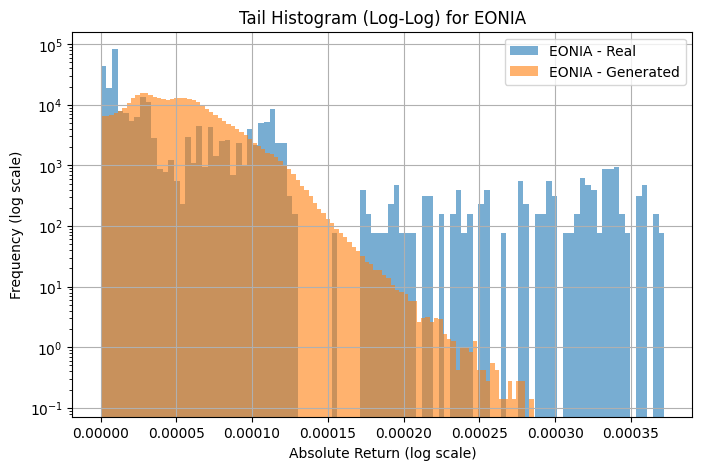

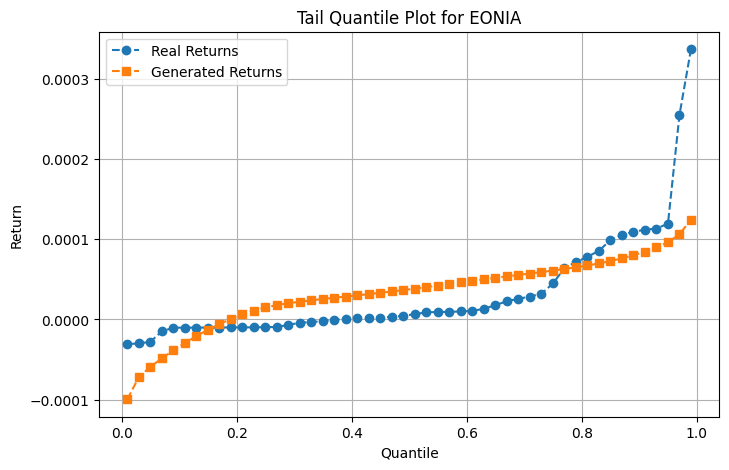

In [8]:
try:
    extreme_value_analysis(returns_df)
except:
    print("YOYOYOYO")


Statistical Summary for EONIA - Real Data:
Mean: 0.000032
Std Dev: 0.000069
Skewness: 2.682698
Kurtosis: 8.158064

Statistical Summary for EONIA - Generated Data:
Mean: 0.000032
Std Dev: 0.000045
Skewness: -0.750786
Kurtosis: 1.057184


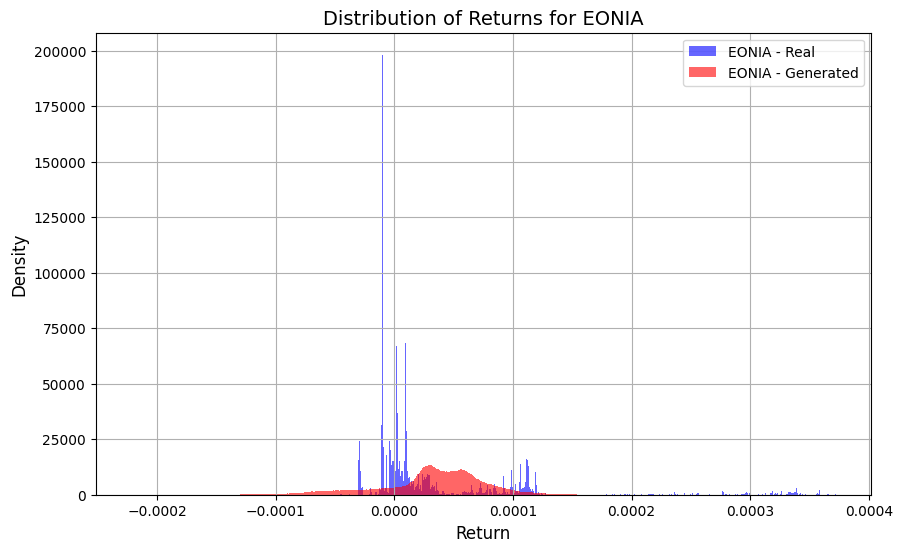

In [9]:
try:
    plot_histogram_distributions(returns_df)
except:
    print("YO")

Variance of Real Data: 0.000000
Variance of Generated Data: 0.000000
⚠️ Warning: Possible Mode Collapse - Low Variance in Generated Data


Mean Pairwise Distance (Real): 0.001171
Mean Pairwise Distance (Generated): 0.000852
✅ Generated samples are reasonably diverse


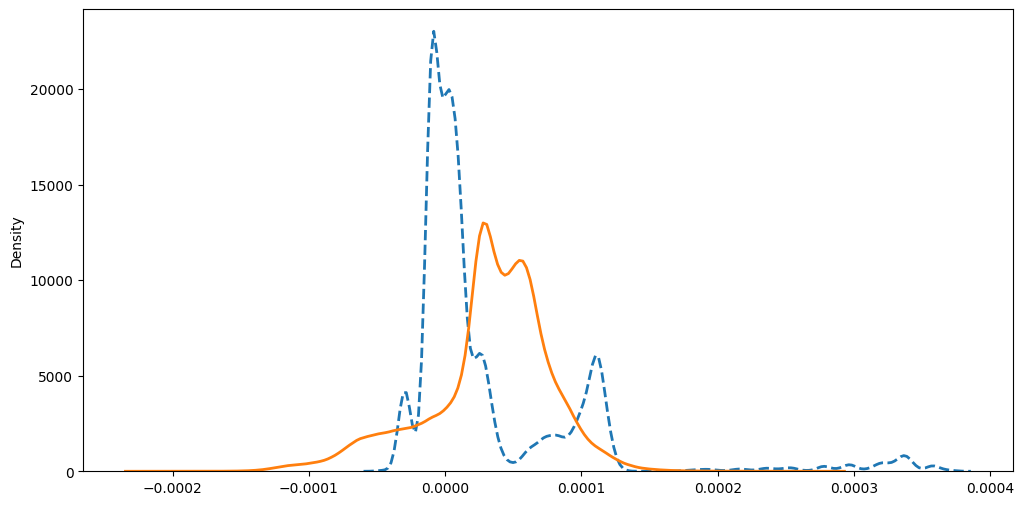

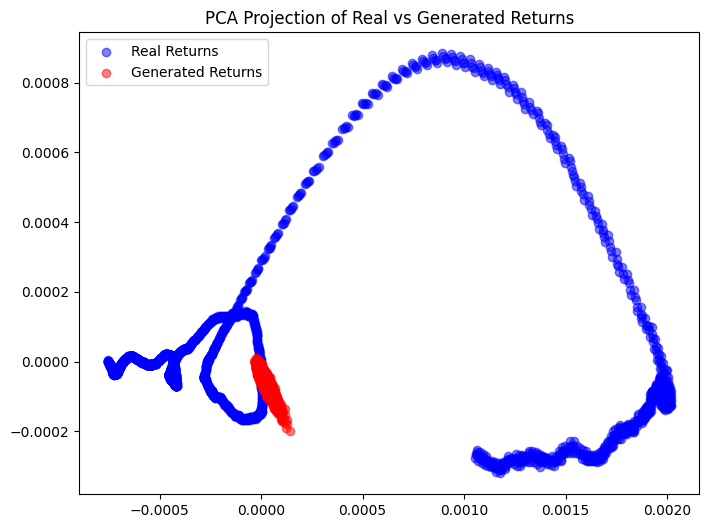

C:\Users\nicka\AppData\Local\Temp\ipykernel_10784\1396322960.py:81: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Assets', fontsize=12)


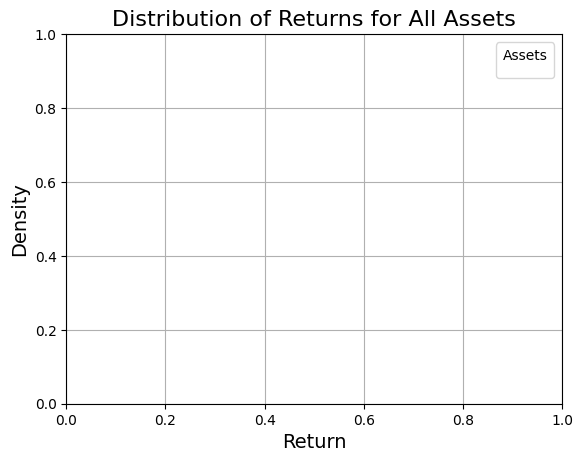

In [10]:
try:
    plot_distributions_with_mode_collapse_check(returns_df)
except:
    print("YO")